In [1]:
# IMPORTS 
import pandas as pd
import numpy as np
import shutil
import os
import time
import subprocess
import sys
import datetime
import matplotlib.pyplot as plt
# from os.path import exists as file_exists
import matplotlib.dates as mdates
import math

# Constants
labelfont = {'fontname':'Calibri'}
ticksize = 10
labelsize = 12
subtitlesize = 14
titlesize = 18
y_min_t = 15
y_max_t = 45

In [2]:
# FILE PATHS
data_file_path = r"C:\Users\govertsen.k\Desktop\trial\output"
data_file_path = data_file_path.replace(os.sep, '/')

In [3]:
# CONSTANTS
study = ["baseline","outage"]

# Identify all the models
models = [os.path.splitext(filename)[0] for filename in os.listdir(data_file_path + '/baseline/')]

# Outage 
otg_date = "July 24"
otg_hour = "12"
otg_lengths = os.listdir(data_file_path+ "/outage/")
otg_lengths.sort(key=int)

In [4]:
otg_lengths

['2', '4', '6', '8', '10', '12', '24', '48']

In [5]:
otg_start =  datetime.datetime.strptime(otg_date + " " + str(otg_hour) + ':00:00','%B %d %H:%M:%S')
otg_start = pd.to_datetime(otg_start)

In [6]:
# Load Everything
# Metadata
metadata = pd.read_csv(data_file_path + "/summary/Models_Worcester_Metadata.csv")
# add leading 0s to ID
metadata['bldg_id'] = metadata['bldg_id'].values.astype('str')
metadata['bldg_id'] = metadata['bldg_id'].str.zfill(7)

# Baseline
baseline_temperature = pd.read_csv(data_file_path + "/summary/baseline_temperature.csv")
baseline_temperature['Date/Time'] = pd.to_datetime(baseline_temperature['Date/Time'])
baseline_electricity = pd.read_csv(data_file_path + "/summary/baseline_electricity.csv")
baseline_electricity['Date/Time'] = pd.to_datetime(baseline_electricity['Date/Time'])
baseline_gas = pd.read_csv(data_file_path + "/summary/baseline_gas.csv")
baseline_gas['Date/Time'] = pd.to_datetime(baseline_gas['Date/Time'])

# Outdoor
outdoor = pd.read_csv(data_file_path + "/summary/outdoor.csv")
outdoor['Date/Time'] = pd.to_datetime(outdoor['Date/Time'])

Text(0.5, 1.0, 'Outdoor Temperature')

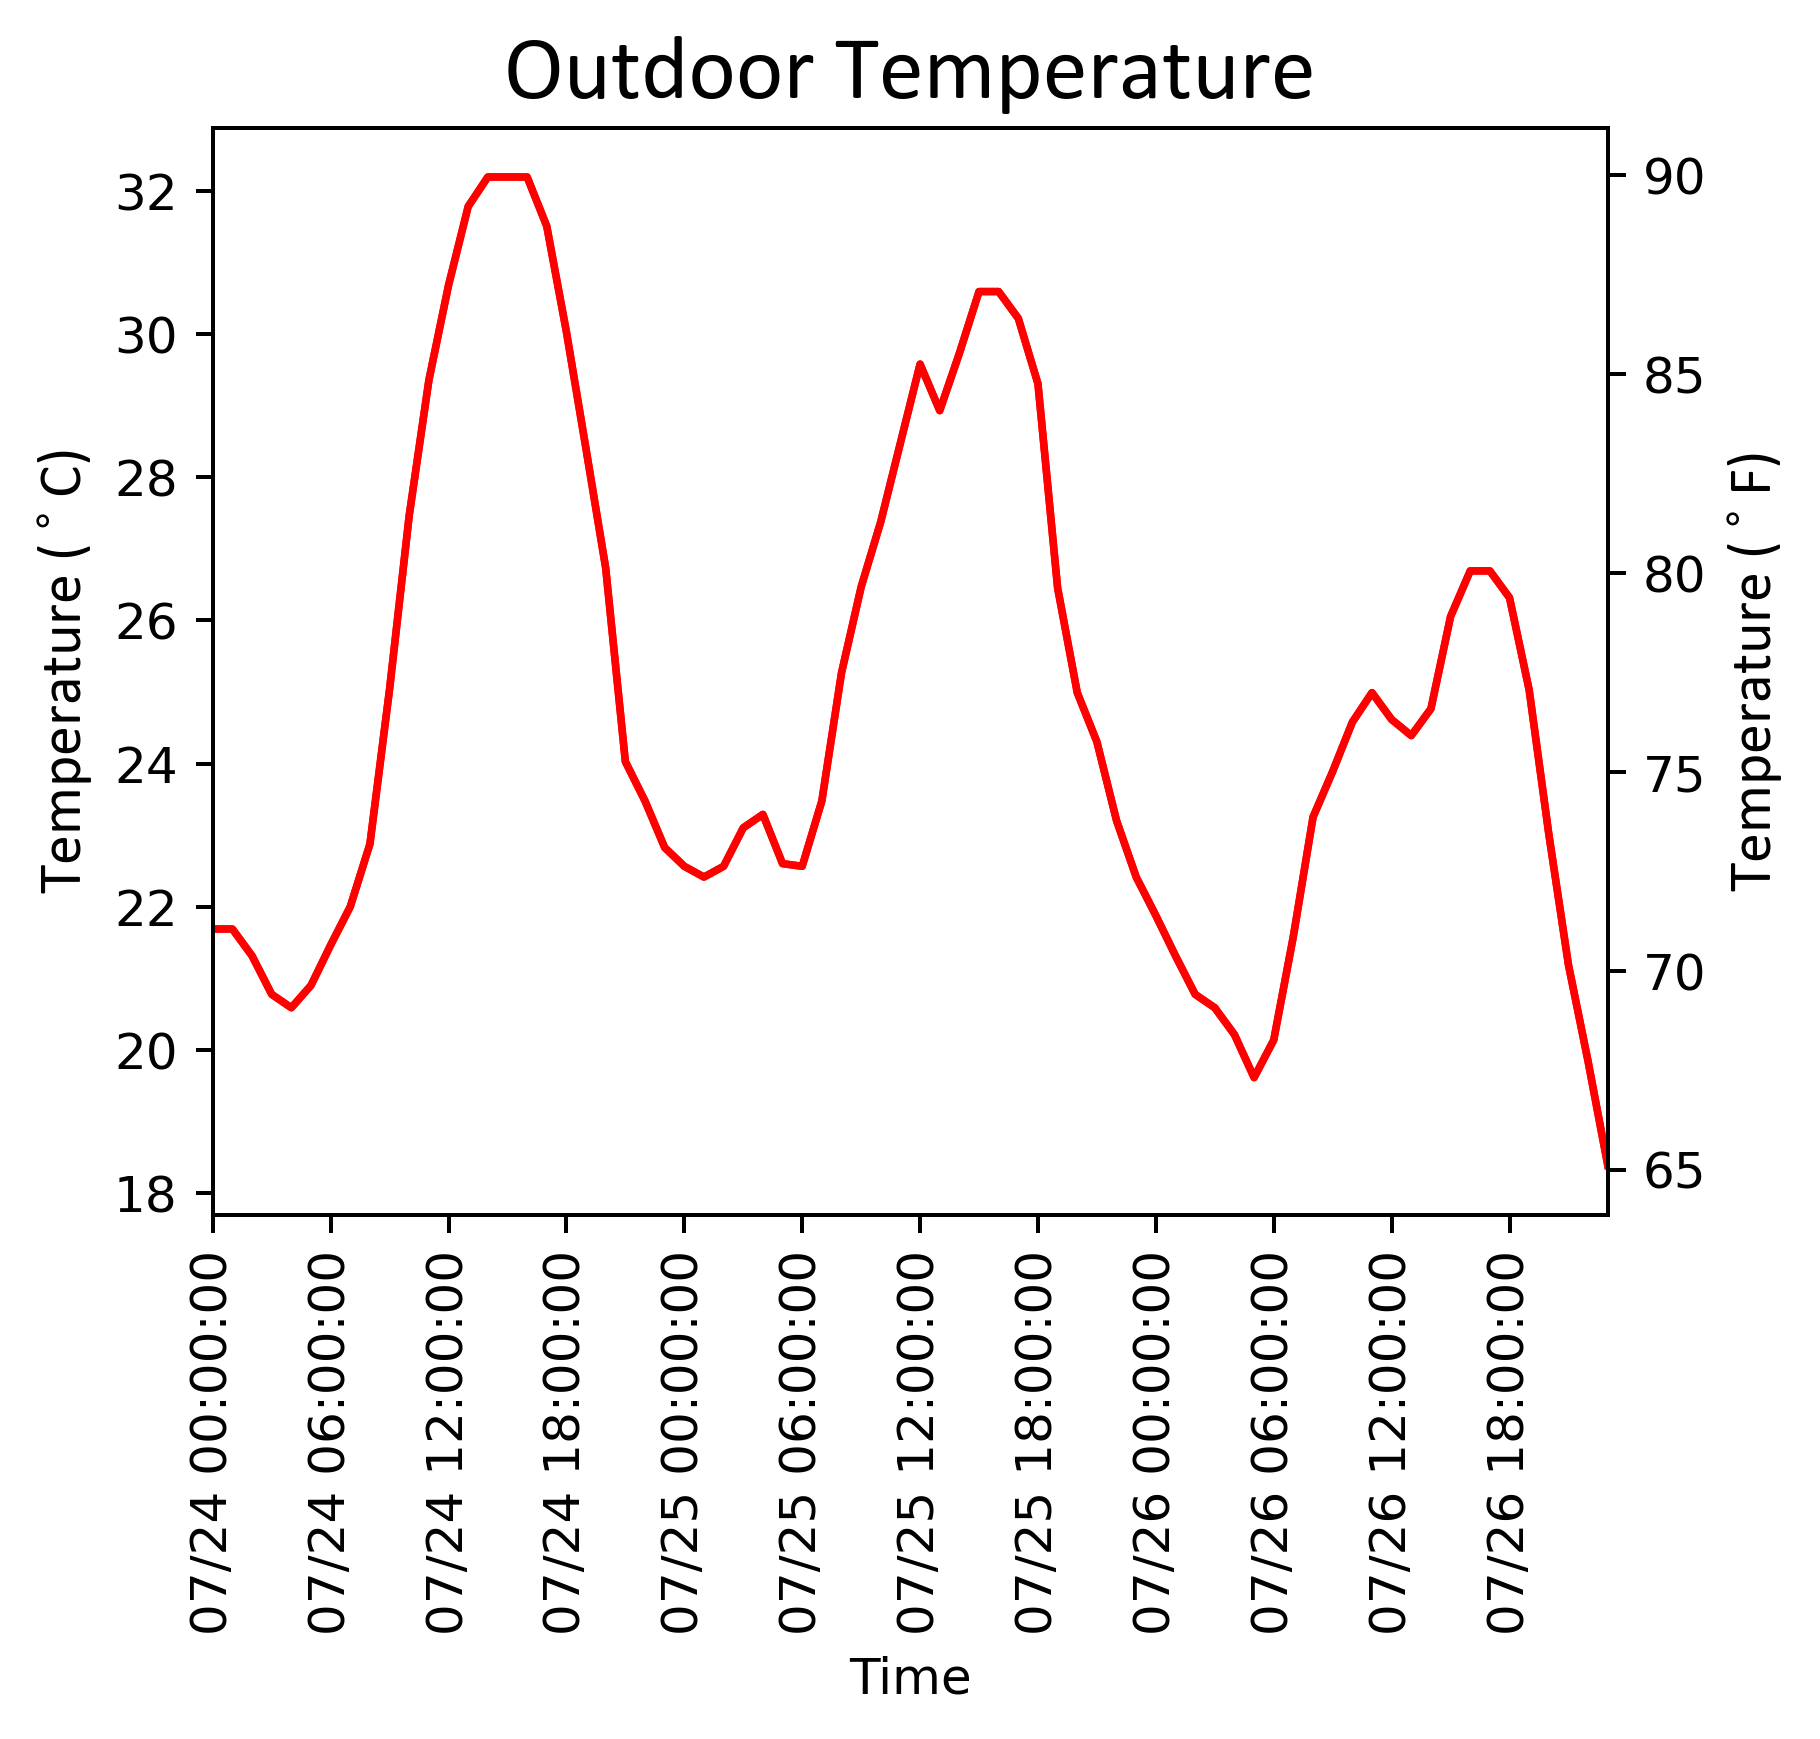

In [7]:
fig1, ax1 = plt.subplots(figsize=(5,4),dpi=360)
ax1.plot(outdoor['Date/Time'],outdoor['Outdoor Temp'],label='Outdoor Temperature',color='r')
x_ticks = pd.date_range(start =min(outdoor['Date/Time']), end =max(outdoor['Date/Time']),freq ='6H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M:%S')
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature ($^\circ$C)',fontsize=labelsize,**labelfont)
ax1b = ax1.twinx()
ax1b.plot(outdoor['Date/Time'],32+(9/5)*outdoor['Outdoor Temp'],label='Outdoor Temperature',color='r')
ax1b.set_ylabel('Temperature ($^\circ$F)',fontsize=labelsize,**labelfont)
ax1.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax1.set_xlim(min(outdoor['Date/Time']),max(outdoor['Date/Time']))
#ax1.legend()
ax1.set_title('Outdoor Temperature',fontsize=titlesize,**labelfont)

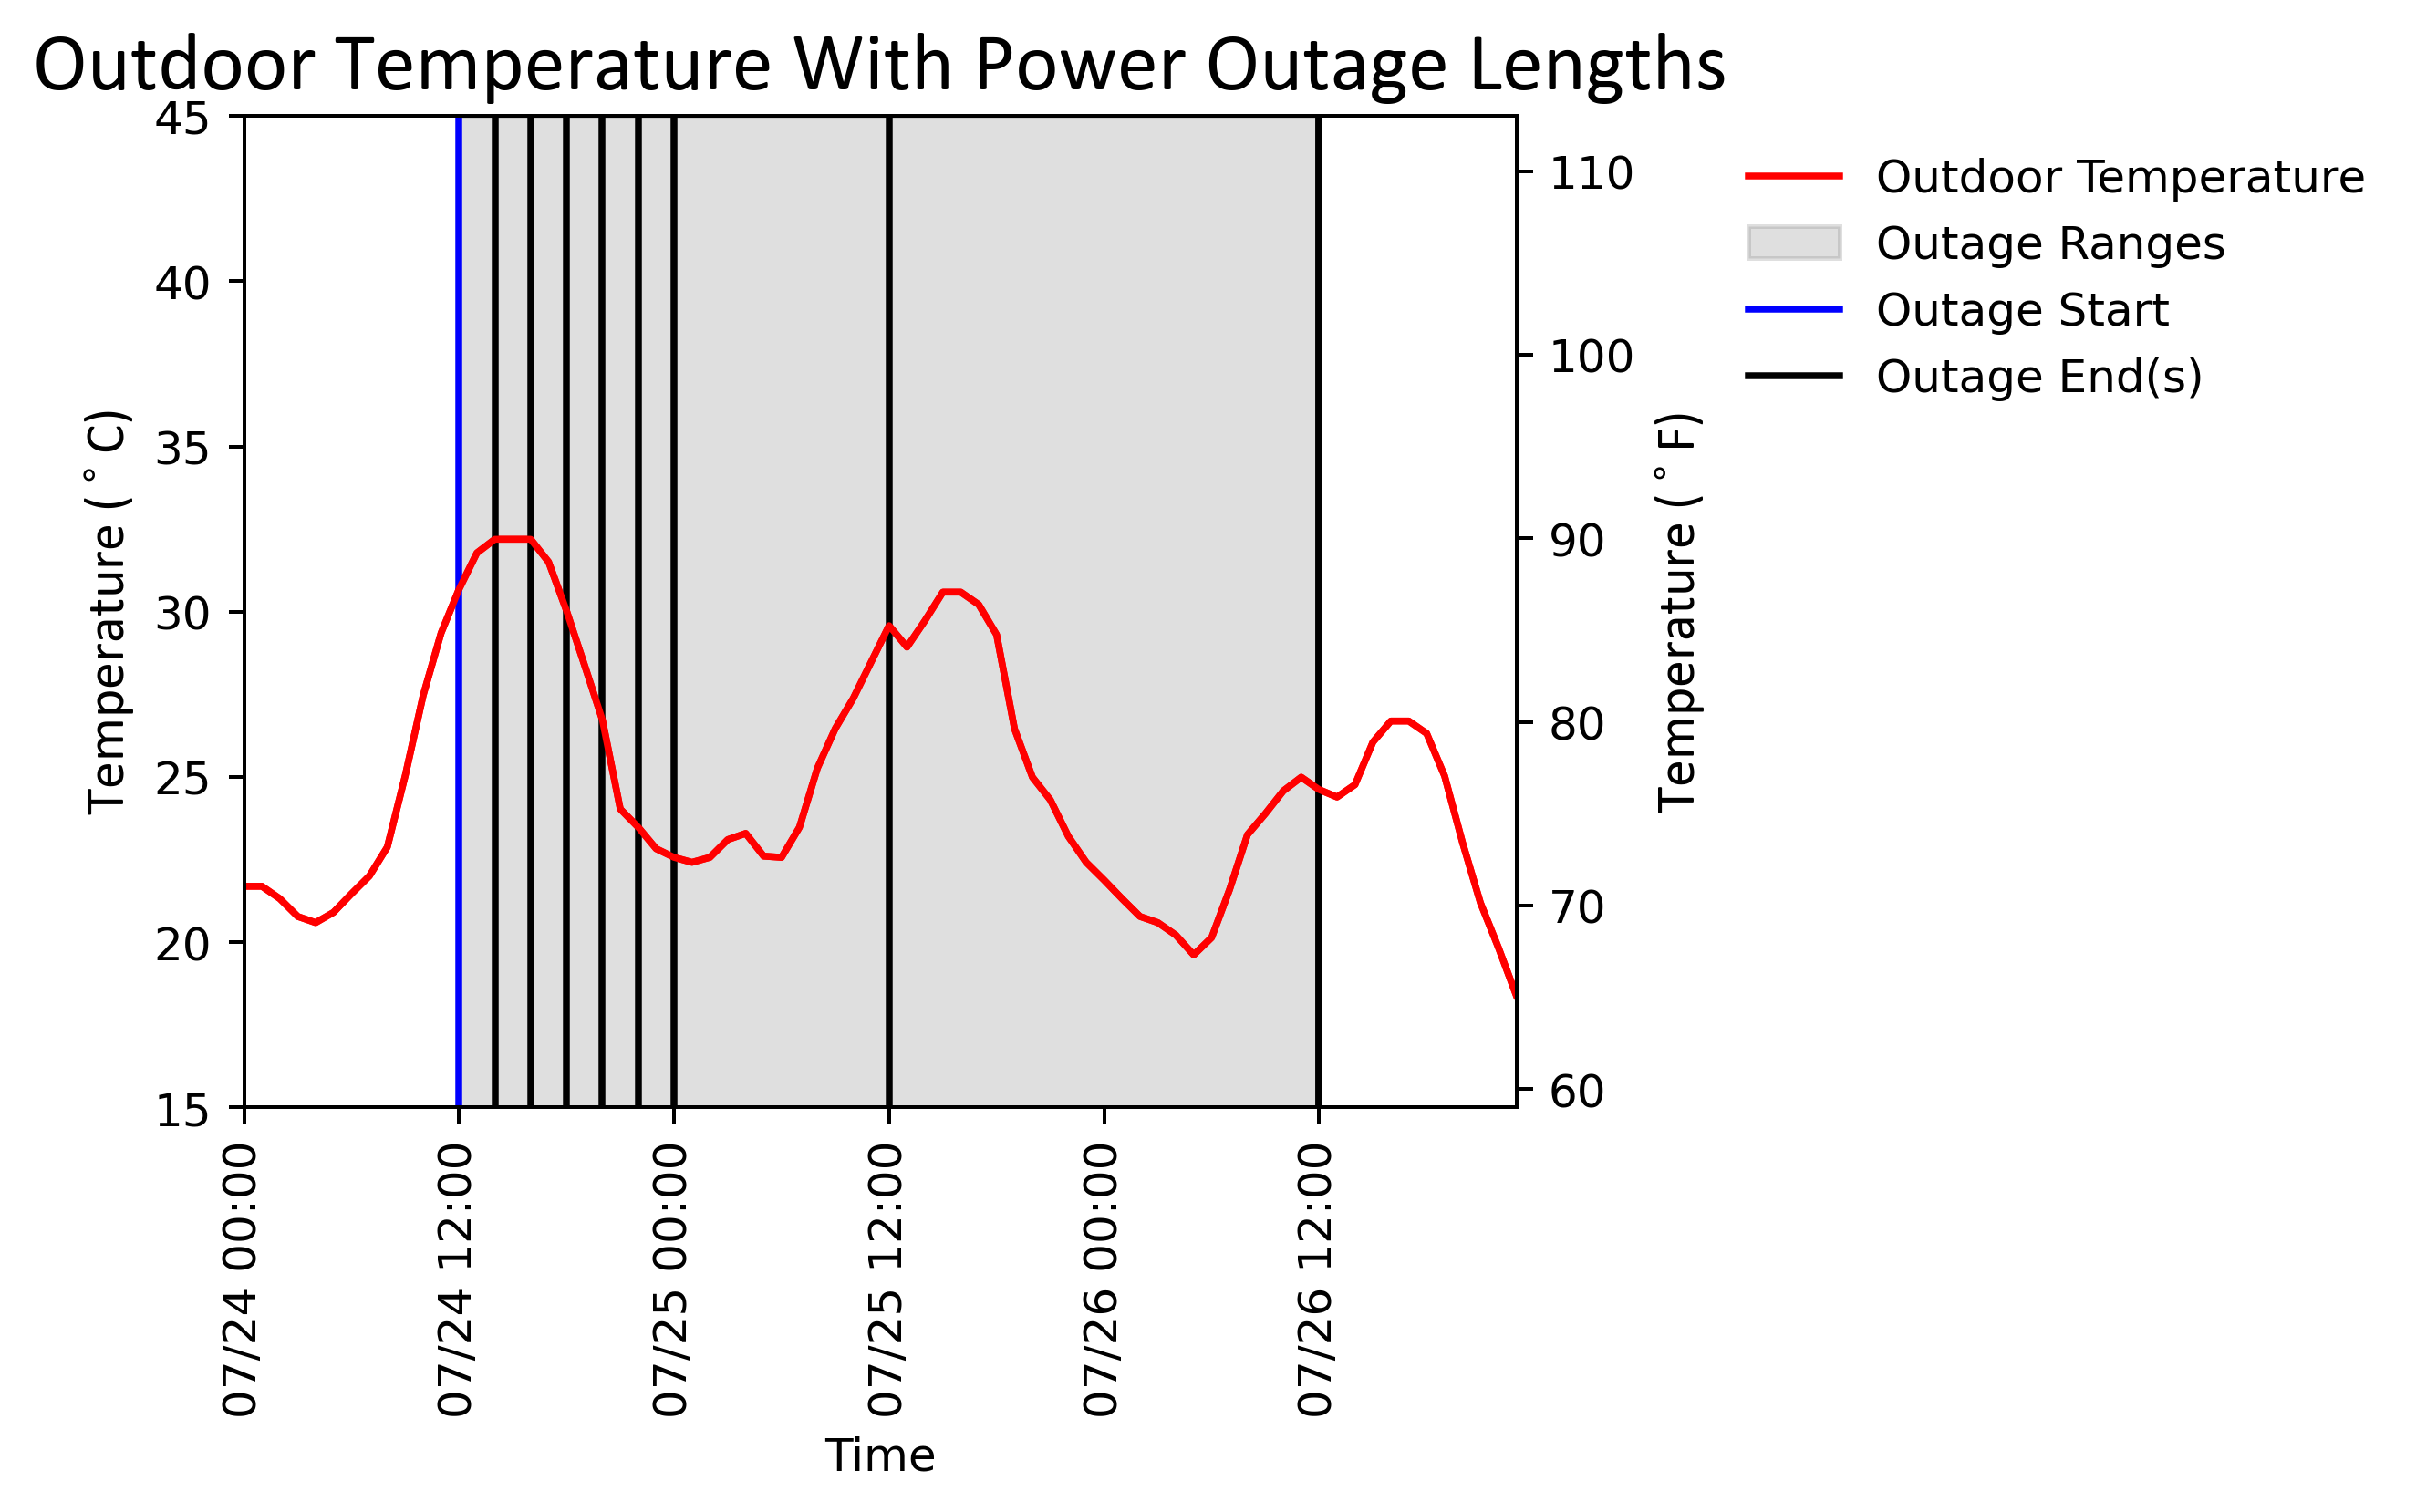

In [8]:
fig1, ax1 = plt.subplots(figsize=(5,4),dpi=360)
# y_min = 15
# y_max = 35
ax1.plot(outdoor['Date/Time'],outdoor['Outdoor Temp'],label='Outdoor Temperature',color='r')
x_ticks = pd.date_range(start =min(outdoor['Date/Time']), end =max(outdoor['Date/Time']),freq ='12H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M')
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature ($^\circ$C)',fontsize=labelsize,**labelfont)
ax1b = ax1.twinx()
ax1b.plot(outdoor['Date/Time'],32+(9/5)*outdoor['Outdoor Temp'],label='Outdoor Temperature',color='r')
ax1b.set_ylabel('Temperature ($^\circ$F)',fontsize=labelsize,**labelfont)
ax1.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax1.set_xlim(min(outdoor['Date/Time']),max(outdoor['Date/Time']))
ax1.set_ylim([y_min_t,y_max_t])
ax1b.set_ylim([32+(9/5)*y_min_t,32+(9/5)*y_max_t])
ax1.fill_between([otg_start,otg_start + pd.Timedelta(int(otg_lengths[-1]),"H")],[y_max_t,y_max_t],alpha=.25,color='grey',label="Outage Ranges")
for each_outage in otg_lengths:
    this_otg_end = otg_start + pd.Timedelta(int(each_outage),"H")
    ax1.axvline(x = this_otg_end, color = 'k')
ax1.axvline(x = otg_start, color = 'b', label = 'Outage Start')
ax1.axvline(x = this_otg_end, color = 'k', label = 'Outage End(s)')
ax1.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left',frameon=False)
ax1.set_title('Outdoor Temperature With Power Outage Lengths',fontsize=titlesize,**labelfont)
# fig1.tight_layout()
fig1.savefig(data_file_path + "/figures/"+"poweroutagelengths.svg",bbox_inches = "tight")

In [9]:
# NExt Steps:
# Swimmer plot of categorial data in python 
# X: housing type
# Y: Vingage
# Compare the swim lanes of the EULP dataset and the tax parcel data set 


Text(0.5, 1.0, 'Baseline Indoor Temperatures')

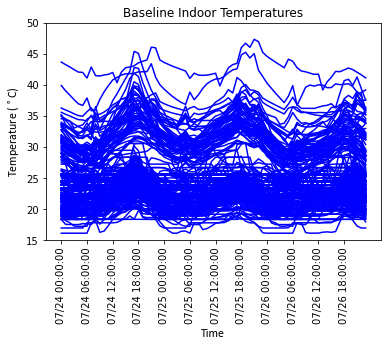

In [10]:
for each_model in models:
    plt.plot(baseline_temperature['Date/Time'],baseline_temperature[each_model], color = 'b')
x_ticks = pd.date_range(start =min(baseline_temperature['Date/Time']), end =max(baseline_temperature['Date/Time']),freq ='6H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M:%S')
plt.xticks(x_ticks,x_tick_labels,rotation=90)
plt.ylim((15,50))
plt.xlabel('Time',fontsize=labelsize,**labelfont)
plt.ylabel('Temperature ($^\circ$C)',fontsize=labelsize,**labelfont)
plt.title('Baseline Indoor Temperatures')

Text(0.5, 1.0, 'Baseline Indoor Temperatures')

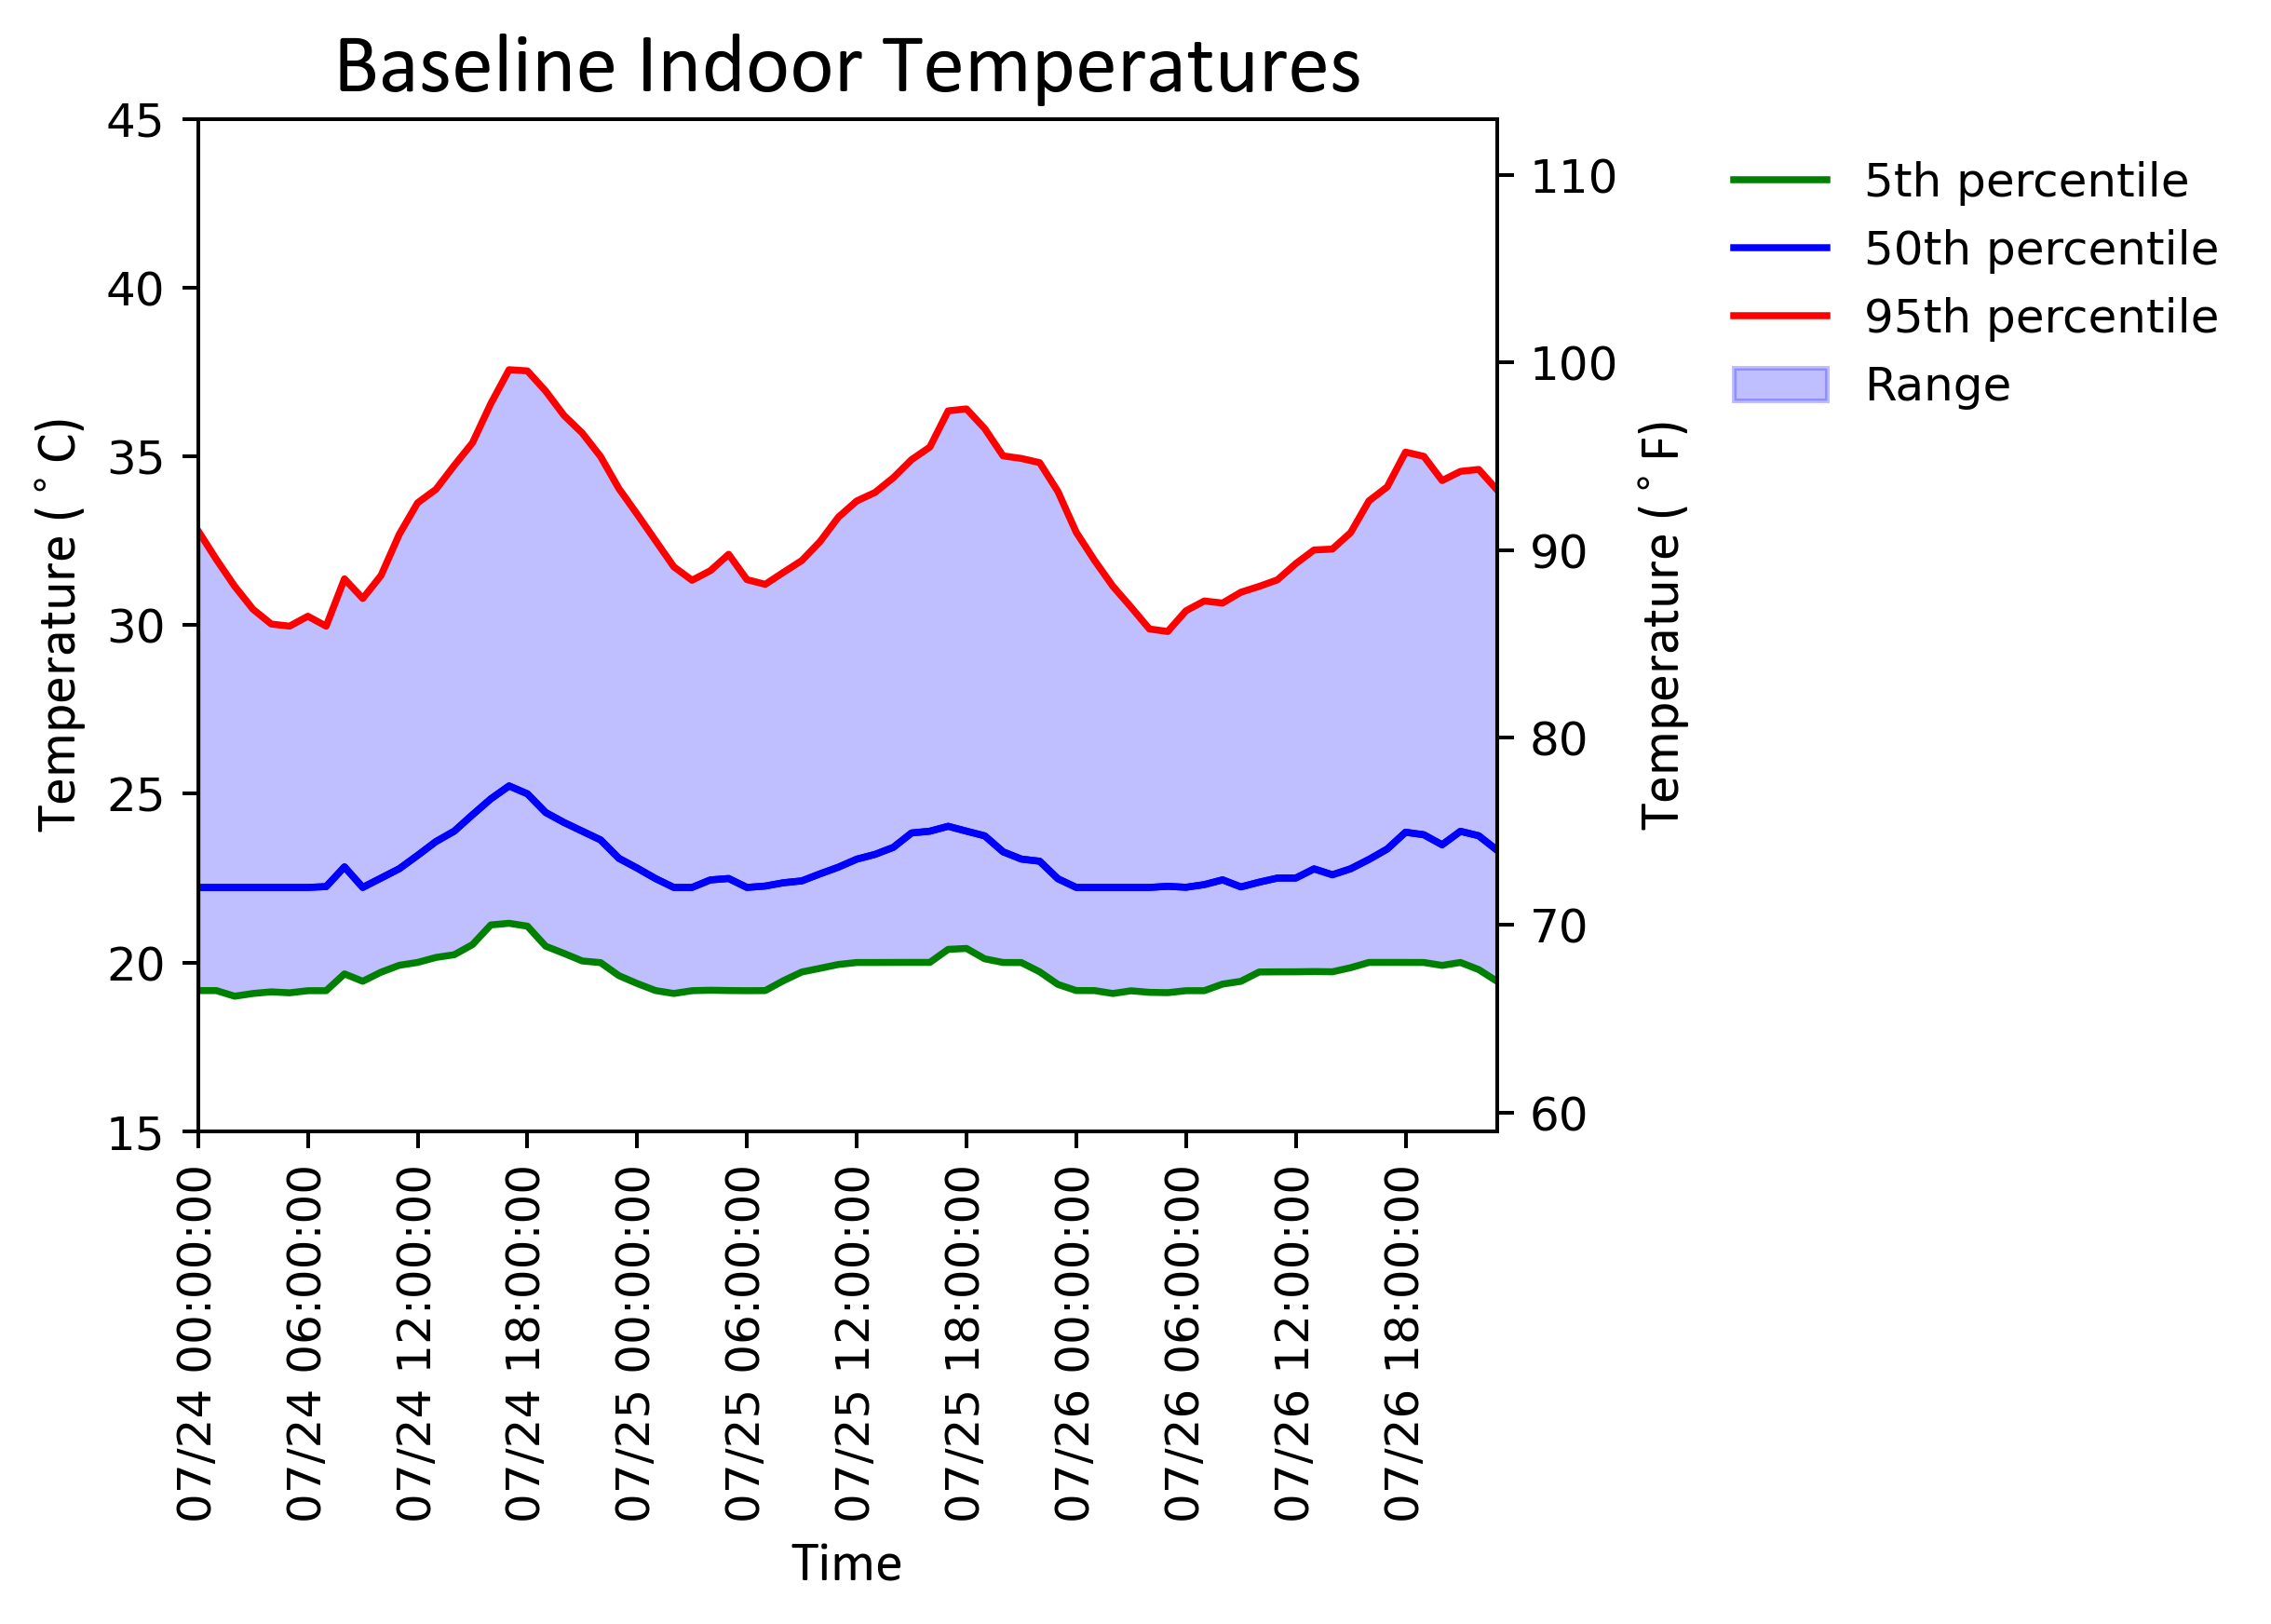

In [11]:
baseline_summary = pd.DataFrame()
baseline_summary['Date/Time'] = baseline_temperature['Date/Time']
baseline_summary['T - 5%'] = baseline_temperature.quantile(q=.05,axis=1)
baseline_summary['T - 50%'] = baseline_temperature.quantile(q=.5,axis=1)
baseline_summary['T - 95%'] = baseline_temperature.quantile(q=.95,axis=1)
# y_min = 5*math.floor(baseline_summary['T - 5%'].min()/5)
# y_max = 5*math.ceil(baseline_summary['T - 95%'].max()/5)
f2, ax2 = plt.subplots(figsize=(5,4),dpi=360)
ax2.plot(baseline_summary['Date/Time'],baseline_summary['T - 5%'],color='g',label="5th percentile")
ax2.plot(baseline_summary['Date/Time'],baseline_summary['T - 50%'],color = 'b',label="50th percentile")
ax2.plot(baseline_summary['Date/Time'],baseline_summary['T - 95%'],color='r',label="95th percentile")
ax2.fill_between(baseline_summary['Date/Time'], baseline_summary['T - 5%'], baseline_summary['T - 95%'],alpha=.25,color='b',label="Range")
ax2b = ax2.twinx()
ax2b.plot(baseline_summary['Date/Time'],32+(9/5)*baseline_summary['T - 50%'],color = 'b',label="50th percentile")
ax2b.set_ylabel('Temperature ($^\circ$F)',fontsize=labelsize,**labelfont)
x_ticks = pd.date_range(start =min(baseline_temperature['Date/Time']), end =max(baseline_temperature['Date/Time']),freq ='6H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M:%S')
ax2.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax2.set_xlim(min(baseline_summary['Date/Time']),max(baseline_summary['Date/Time']))
ax2.set_ylim((y_min_t,y_max_t))
ax2b.set_ylim((32+(9/5)*y_min_t,32+(9/5)*y_max_t))
ax2.set_xlabel('Time',fontsize=labelsize,**labelfont)
ax2.set_ylabel('Temperature ($^\circ$C)',fontsize=labelsize,**labelfont)
ax2.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left',frameon=False)
ax2.set_title('Baseline Indoor Temperatures',fontsize=titlesize,**labelfont)

Text(0.5, 1.0, 'Baseline Indoor Temperatures')

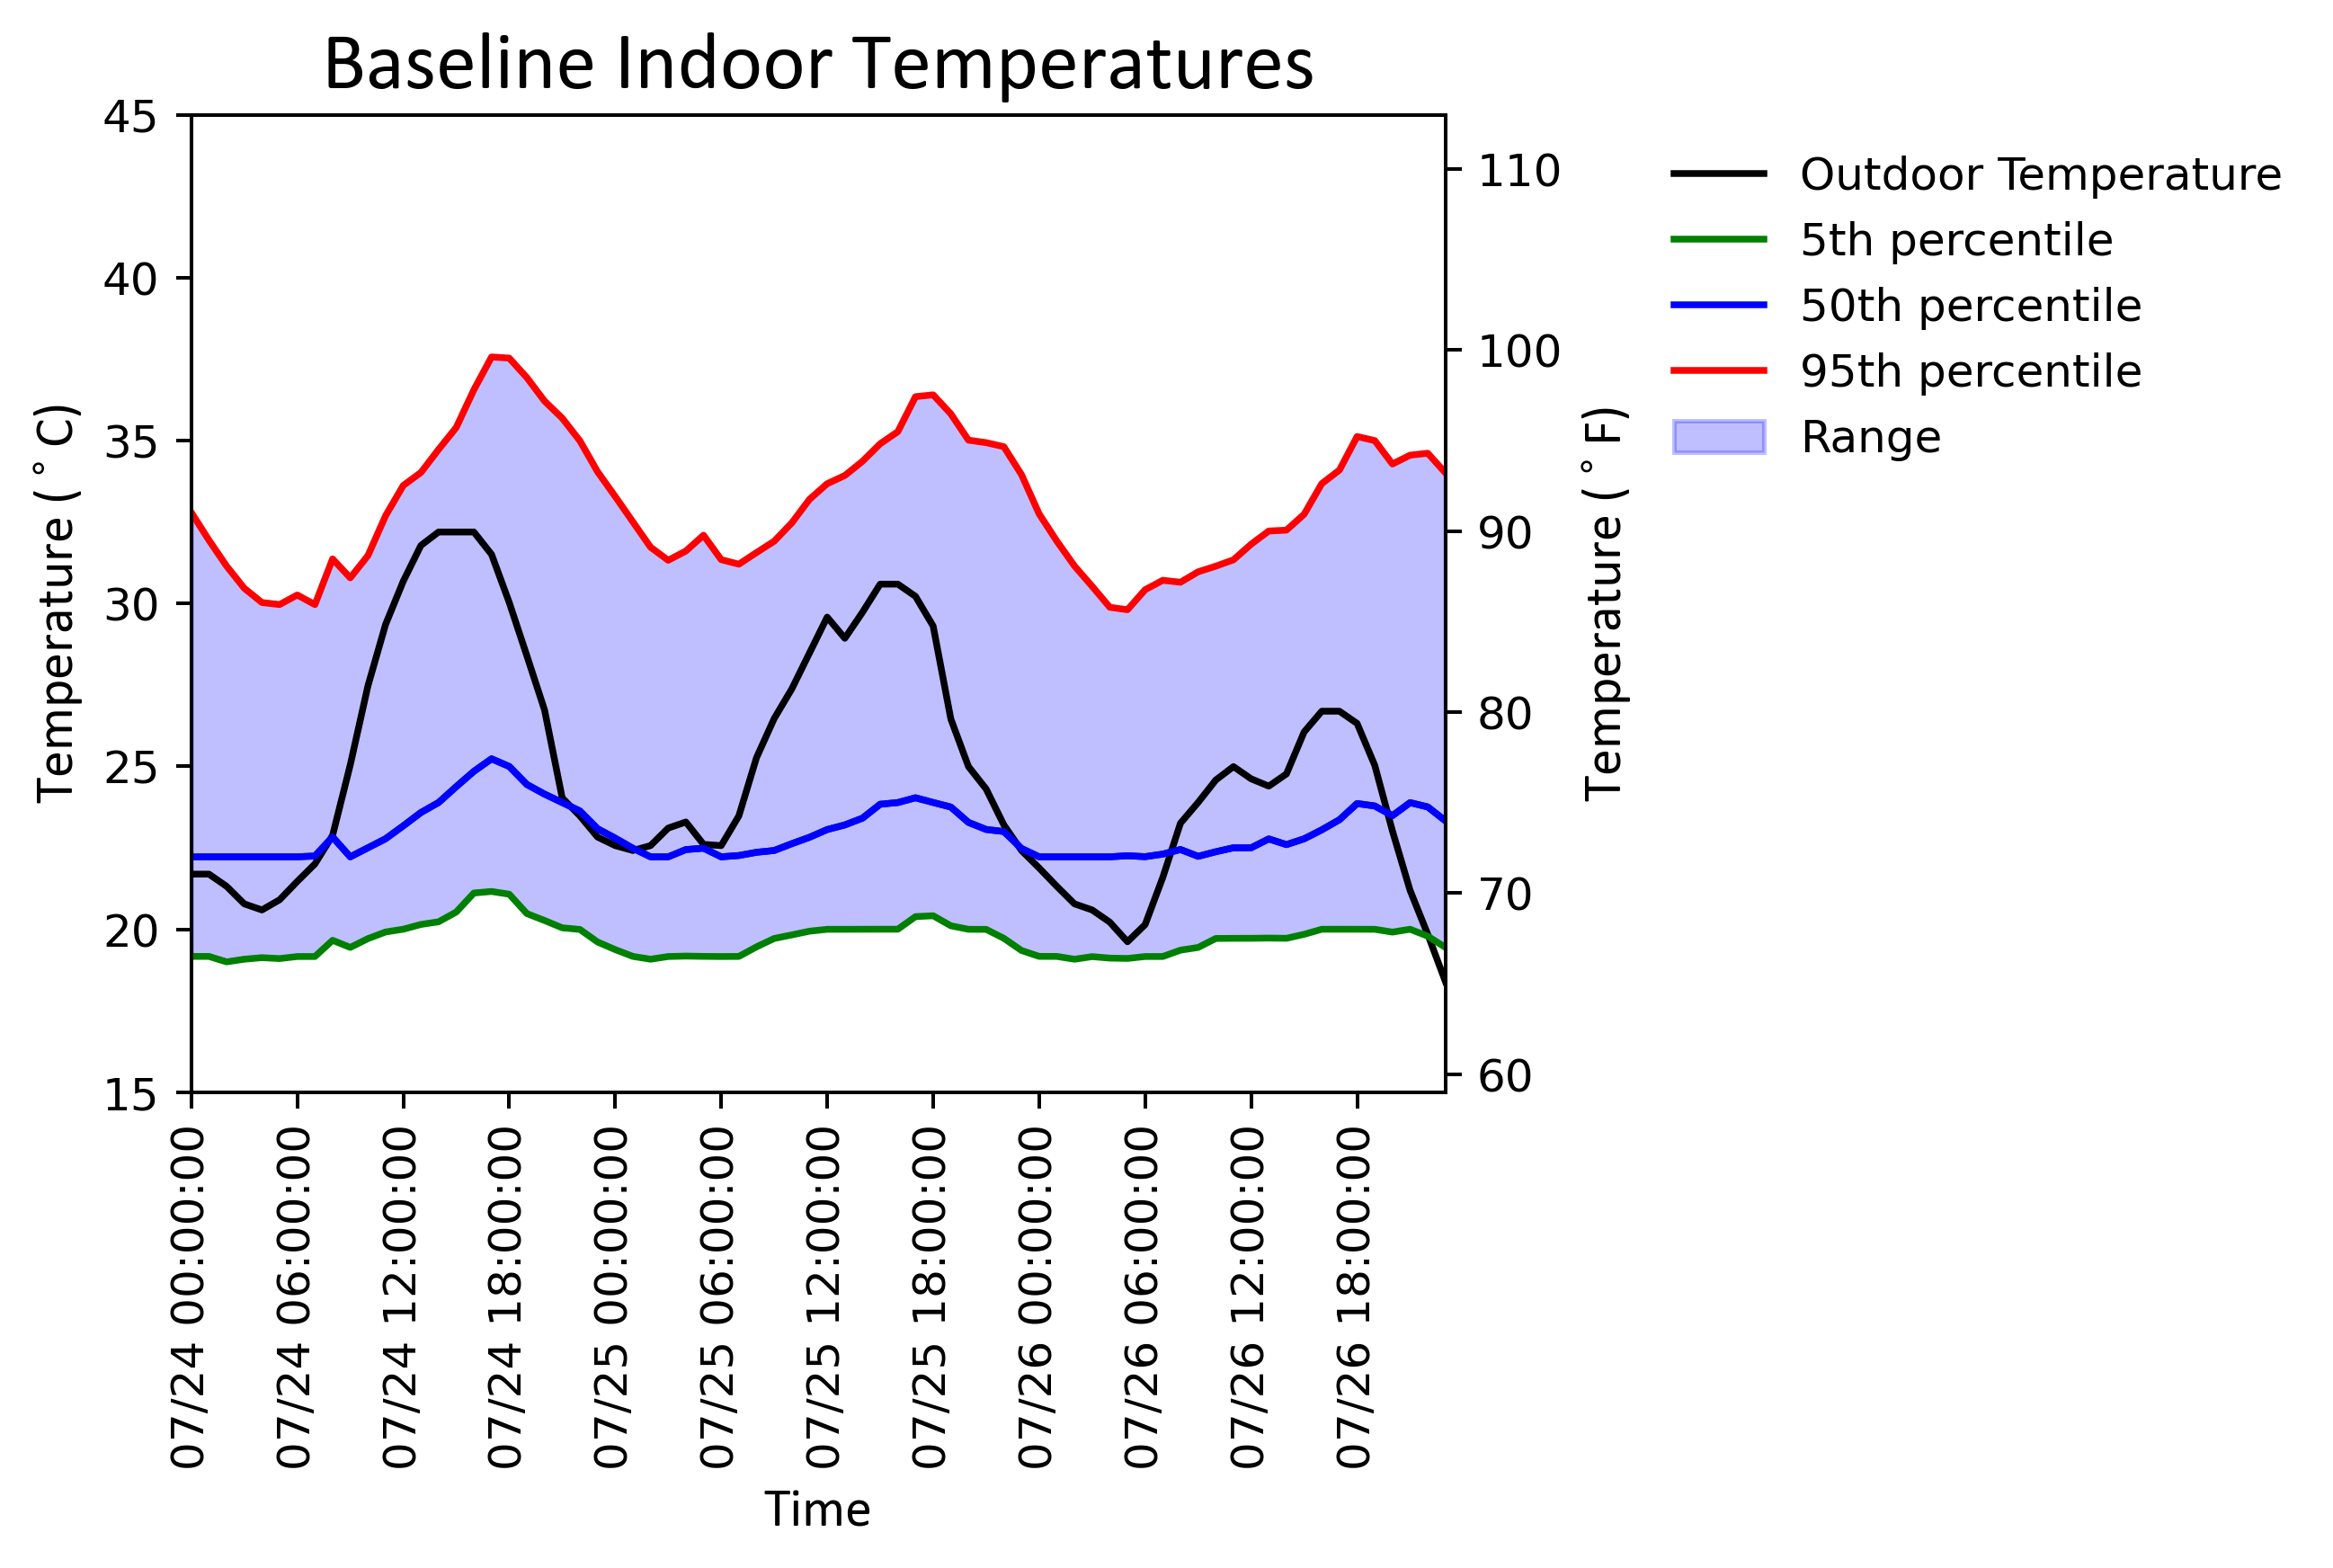

In [12]:
baseline_summary = pd.DataFrame()
baseline_summary['Date/Time'] = baseline_temperature['Date/Time']
baseline_summary['T - 5%'] = baseline_temperature.quantile(q=.05,axis=1)
baseline_summary['T - 50%'] = baseline_temperature.quantile(q=.5,axis=1)
baseline_summary['T - 95%'] = baseline_temperature.quantile(q=.95,axis=1)
# y_min = 5*math.floor(baseline_summary['T - 5%'].min()/5)
# y_max = 5*math.ceil(baseline_summary['T - 95%'].max()/5)
f2, ax2 = plt.subplots(figsize=(5,4),dpi=360)
ax2.plot(outdoor['Date/Time'],outdoor['Outdoor Temp'],color='k',label="Outdoor Temperature")
ax2.plot(baseline_summary['Date/Time'],baseline_summary['T - 5%'],color='g',label="5th percentile")
ax2.plot(baseline_summary['Date/Time'],baseline_summary['T - 50%'],color = 'b',label="50th percentile")
ax2.plot(baseline_summary['Date/Time'],baseline_summary['T - 95%'],color='r',label="95th percentile")
ax2.fill_between(baseline_summary['Date/Time'], baseline_summary['T - 5%'], baseline_summary['T - 95%'],alpha=.25,color='b',label="Range")
ax2b = ax2.twinx()
ax2b.plot(baseline_summary['Date/Time'],32+(9/5)*baseline_summary['T - 50%'],color = 'b',label="50th percentile")
ax2b.set_ylabel('Temperature ($^\circ$F)',fontsize=labelsize,**labelfont)
x_ticks = pd.date_range(start =min(baseline_temperature['Date/Time']), end =max(baseline_temperature['Date/Time']),freq ='6H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M:%S')
ax2.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax2.set_xlim(min(baseline_summary['Date/Time']),max(baseline_summary['Date/Time']))
ax2.set_ylim((y_min_t,y_max_t))
ax2b.set_ylim((32+(9/5)*y_min_t,32+(9/5)*y_max_t))
ax2.set_xlabel('Time',fontsize=labelsize,**labelfont)
ax2.set_ylabel('Temperature ($^\circ$C)',fontsize=labelsize,**labelfont)
ax2.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left',frameon=False)
ax2.set_title('Baseline Indoor Temperatures',fontsize=titlesize,**labelfont)

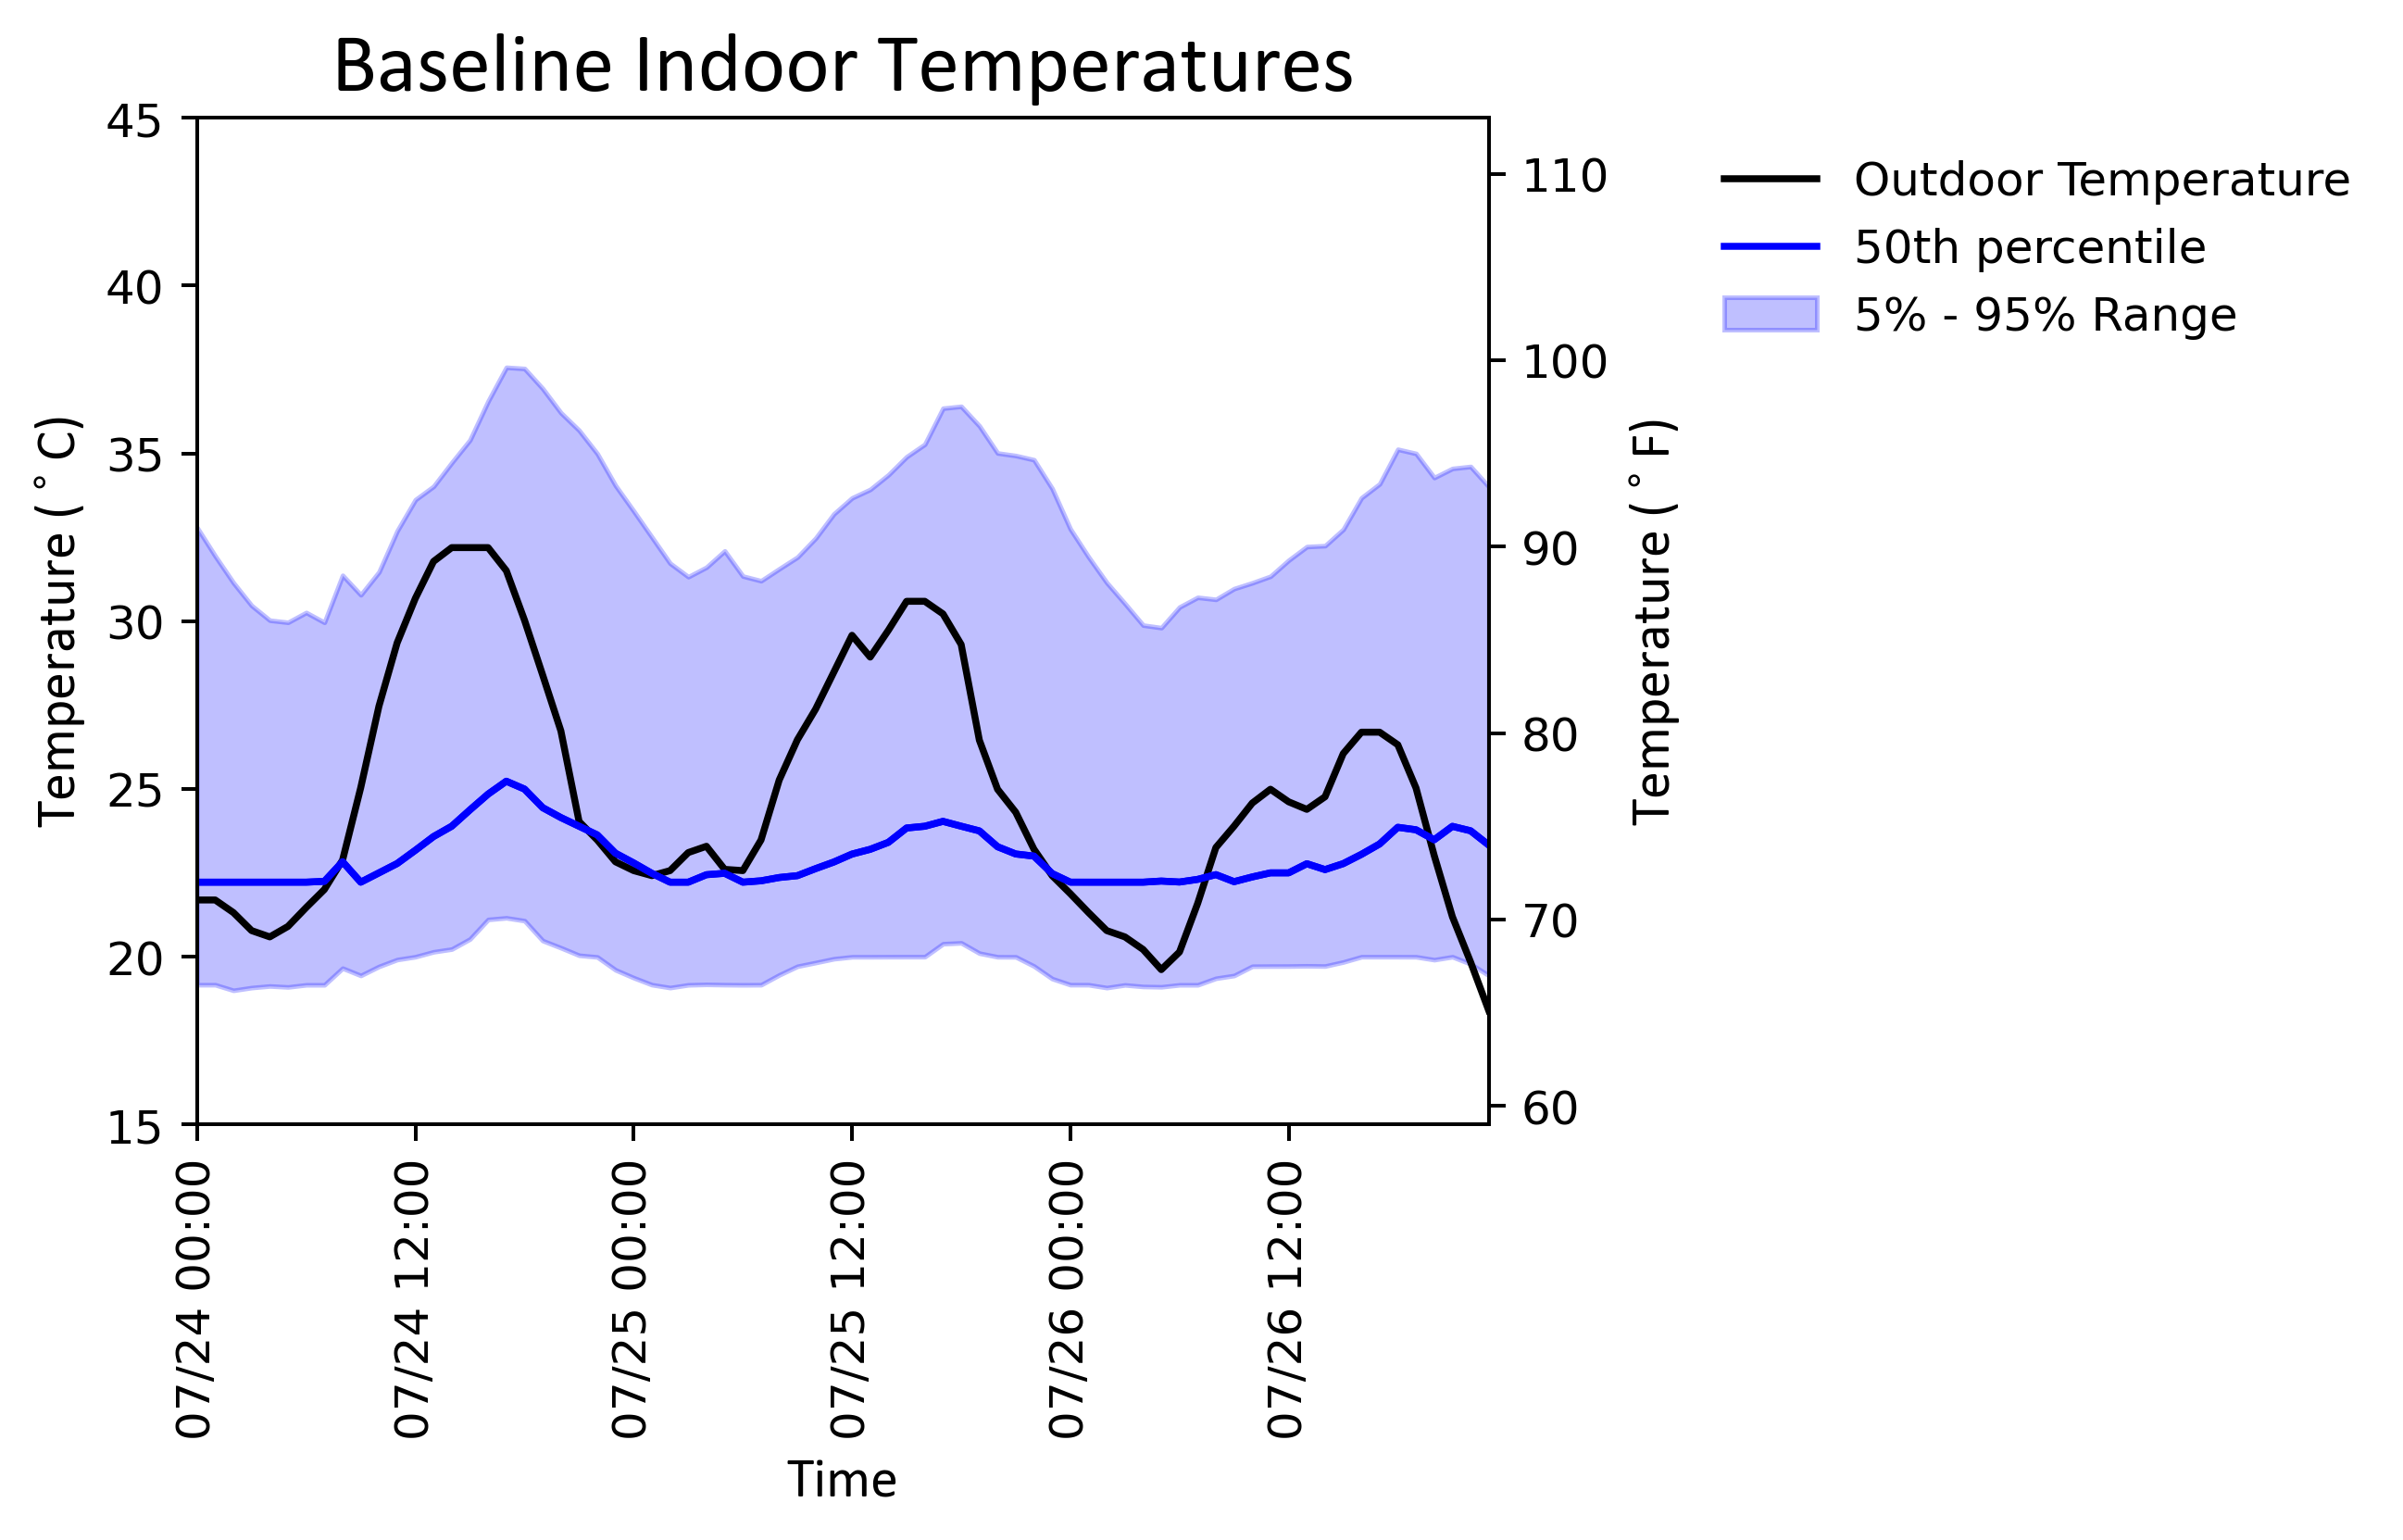

In [13]:
f3, ax3 = plt.subplots(figsize=(5,4),dpi=360)
ax3.plot(outdoor['Date/Time'],outdoor['Outdoor Temp'],color='k',label='Outdoor Temperature')
ax3.plot(baseline_summary['Date/Time'],baseline_summary['T - 50%'],color = 'b',label="50th percentile")
ax3.fill_between(baseline_summary['Date/Time'], baseline_summary['T - 5%'], baseline_summary['T - 95%'],alpha=.25,color='b',label="5% - 95% Range")
ax3b = ax3.twinx()
ax3b.plot(baseline_summary['Date/Time'],32+(9/5)*baseline_summary['T - 50%'],color = 'b',label="50th percentile")
ax3b.set_ylabel('Temperature ($^\circ$F)',fontsize=labelsize,**labelfont)
x_ticks = pd.date_range(start =min(baseline_temperature['Date/Time']), end =max(baseline_temperature['Date/Time']),freq ='12H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M')
ax3.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax3.set_xlim(min(baseline_summary['Date/Time']),max(baseline_summary['Date/Time']))
ax3.set_ylim((y_min_t,y_max_t))
ax3b.set_ylim((32+(9/5)*y_min_t,32+(9/5)*y_max_t))
ax3.set_xlabel('Time',fontsize=labelsize,**labelfont)
ax3.set_ylabel('Temperature ($^\circ$C)',fontsize=labelsize,**labelfont)
ax3.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left',frameon=False)
ax3.set_title('Baseline Indoor Temperatures',fontsize=titlesize,**labelfont)
f3.savefig(data_file_path + "/figures/"+"baselinetemp.svg",bbox_inches = "tight")

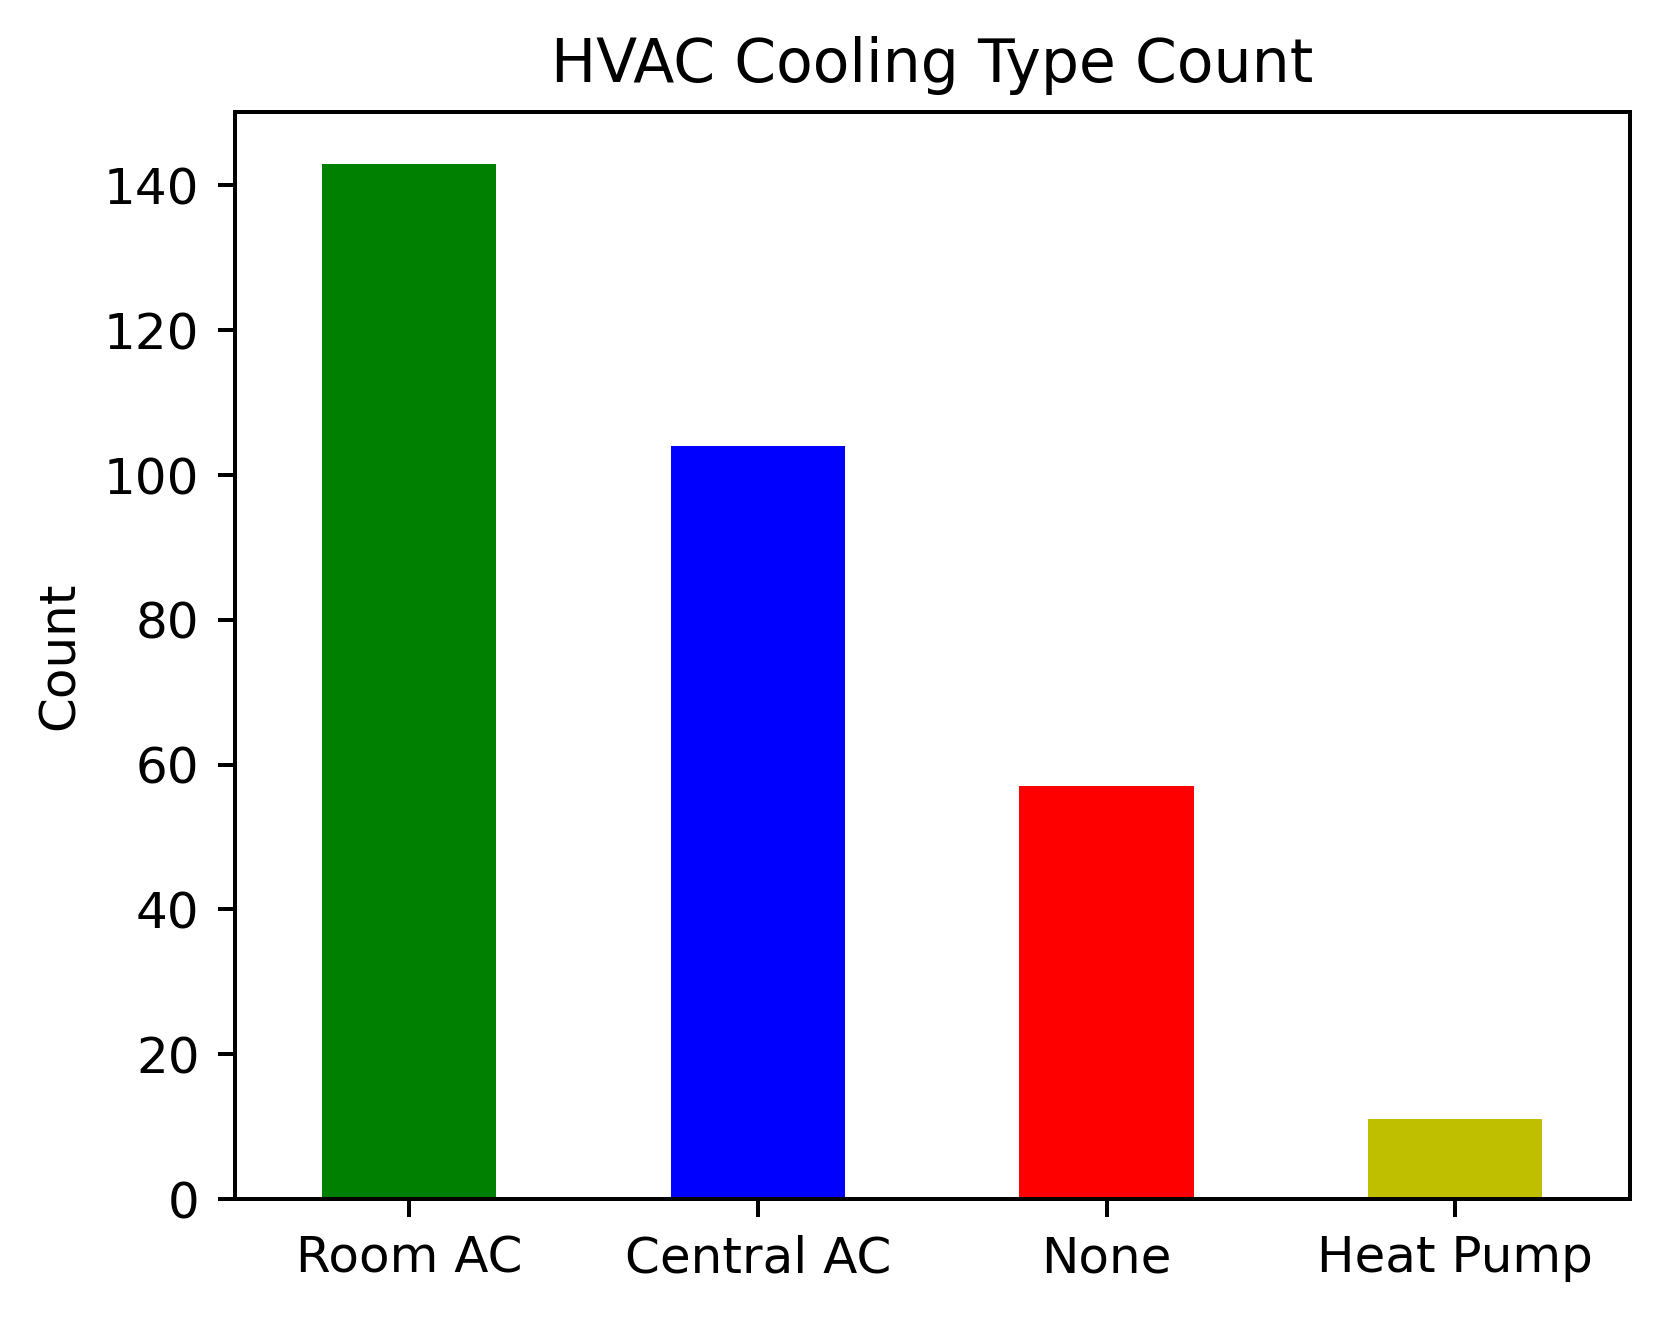

In [14]:
#if each_'Central AC', 'Room AC', 'None', 'Heat Pump'
plt.figure(figsize=(5,4),dpi=360)
metadata['in.hvac_cooling_type'].value_counts().plot(kind='bar', color = ['g','b','r','y'])
plt.title('HVAC Cooling Type Count')
plt.ylabel('Count')
plt.xticks(rotation = 'horizontal')
plt.savefig(data_file_path + "/figures/"+"hvactypecount.svg",bbox_inches = "tight")

Text(0.5, 1.0, 'Baseline Indoor Temperatures with AC Type')

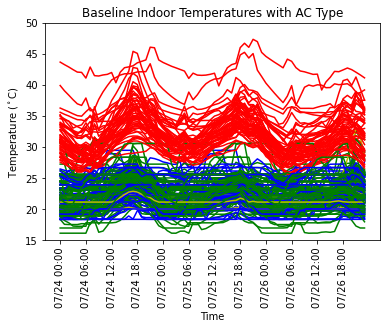

In [15]:
for each_model in models:
    hvac_type = metadata.loc[metadata['bldg_id'] == each_model[4:]]['in.hvac_cooling_type']
    if (hvac_type == 'Central AC').any():
        hvac_color = 'b'
    elif (hvac_type == 'Room AC').any():
        hvac_color = 'g'
    elif (hvac_type == 'None').any():
        hvac_color = 'r'
    else:
        hvac_color = 'y'
    plt.plot(baseline_temperature['Date/Time'],baseline_temperature[each_model], color = hvac_color)
plt.ylim((15,50))
plt.xlabel('Time')
x_ticks = pd.date_range(start =min(baseline_temperature['Date/Time']), end =max(baseline_temperature['Date/Time']),freq ='6H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M')
plt.xticks(x_ticks,x_tick_labels,rotation=90)
plt.ylabel('Temperature ($^\circ$C)')
plt.title('Baseline Indoor Temperatures with AC Type')
#plt.legend(handles = ["Central AC", "Room AC", "None", "Heat Pump"])

Text(0.5, 1.0, 'Baseline Indoor Temperatures by AC Type')

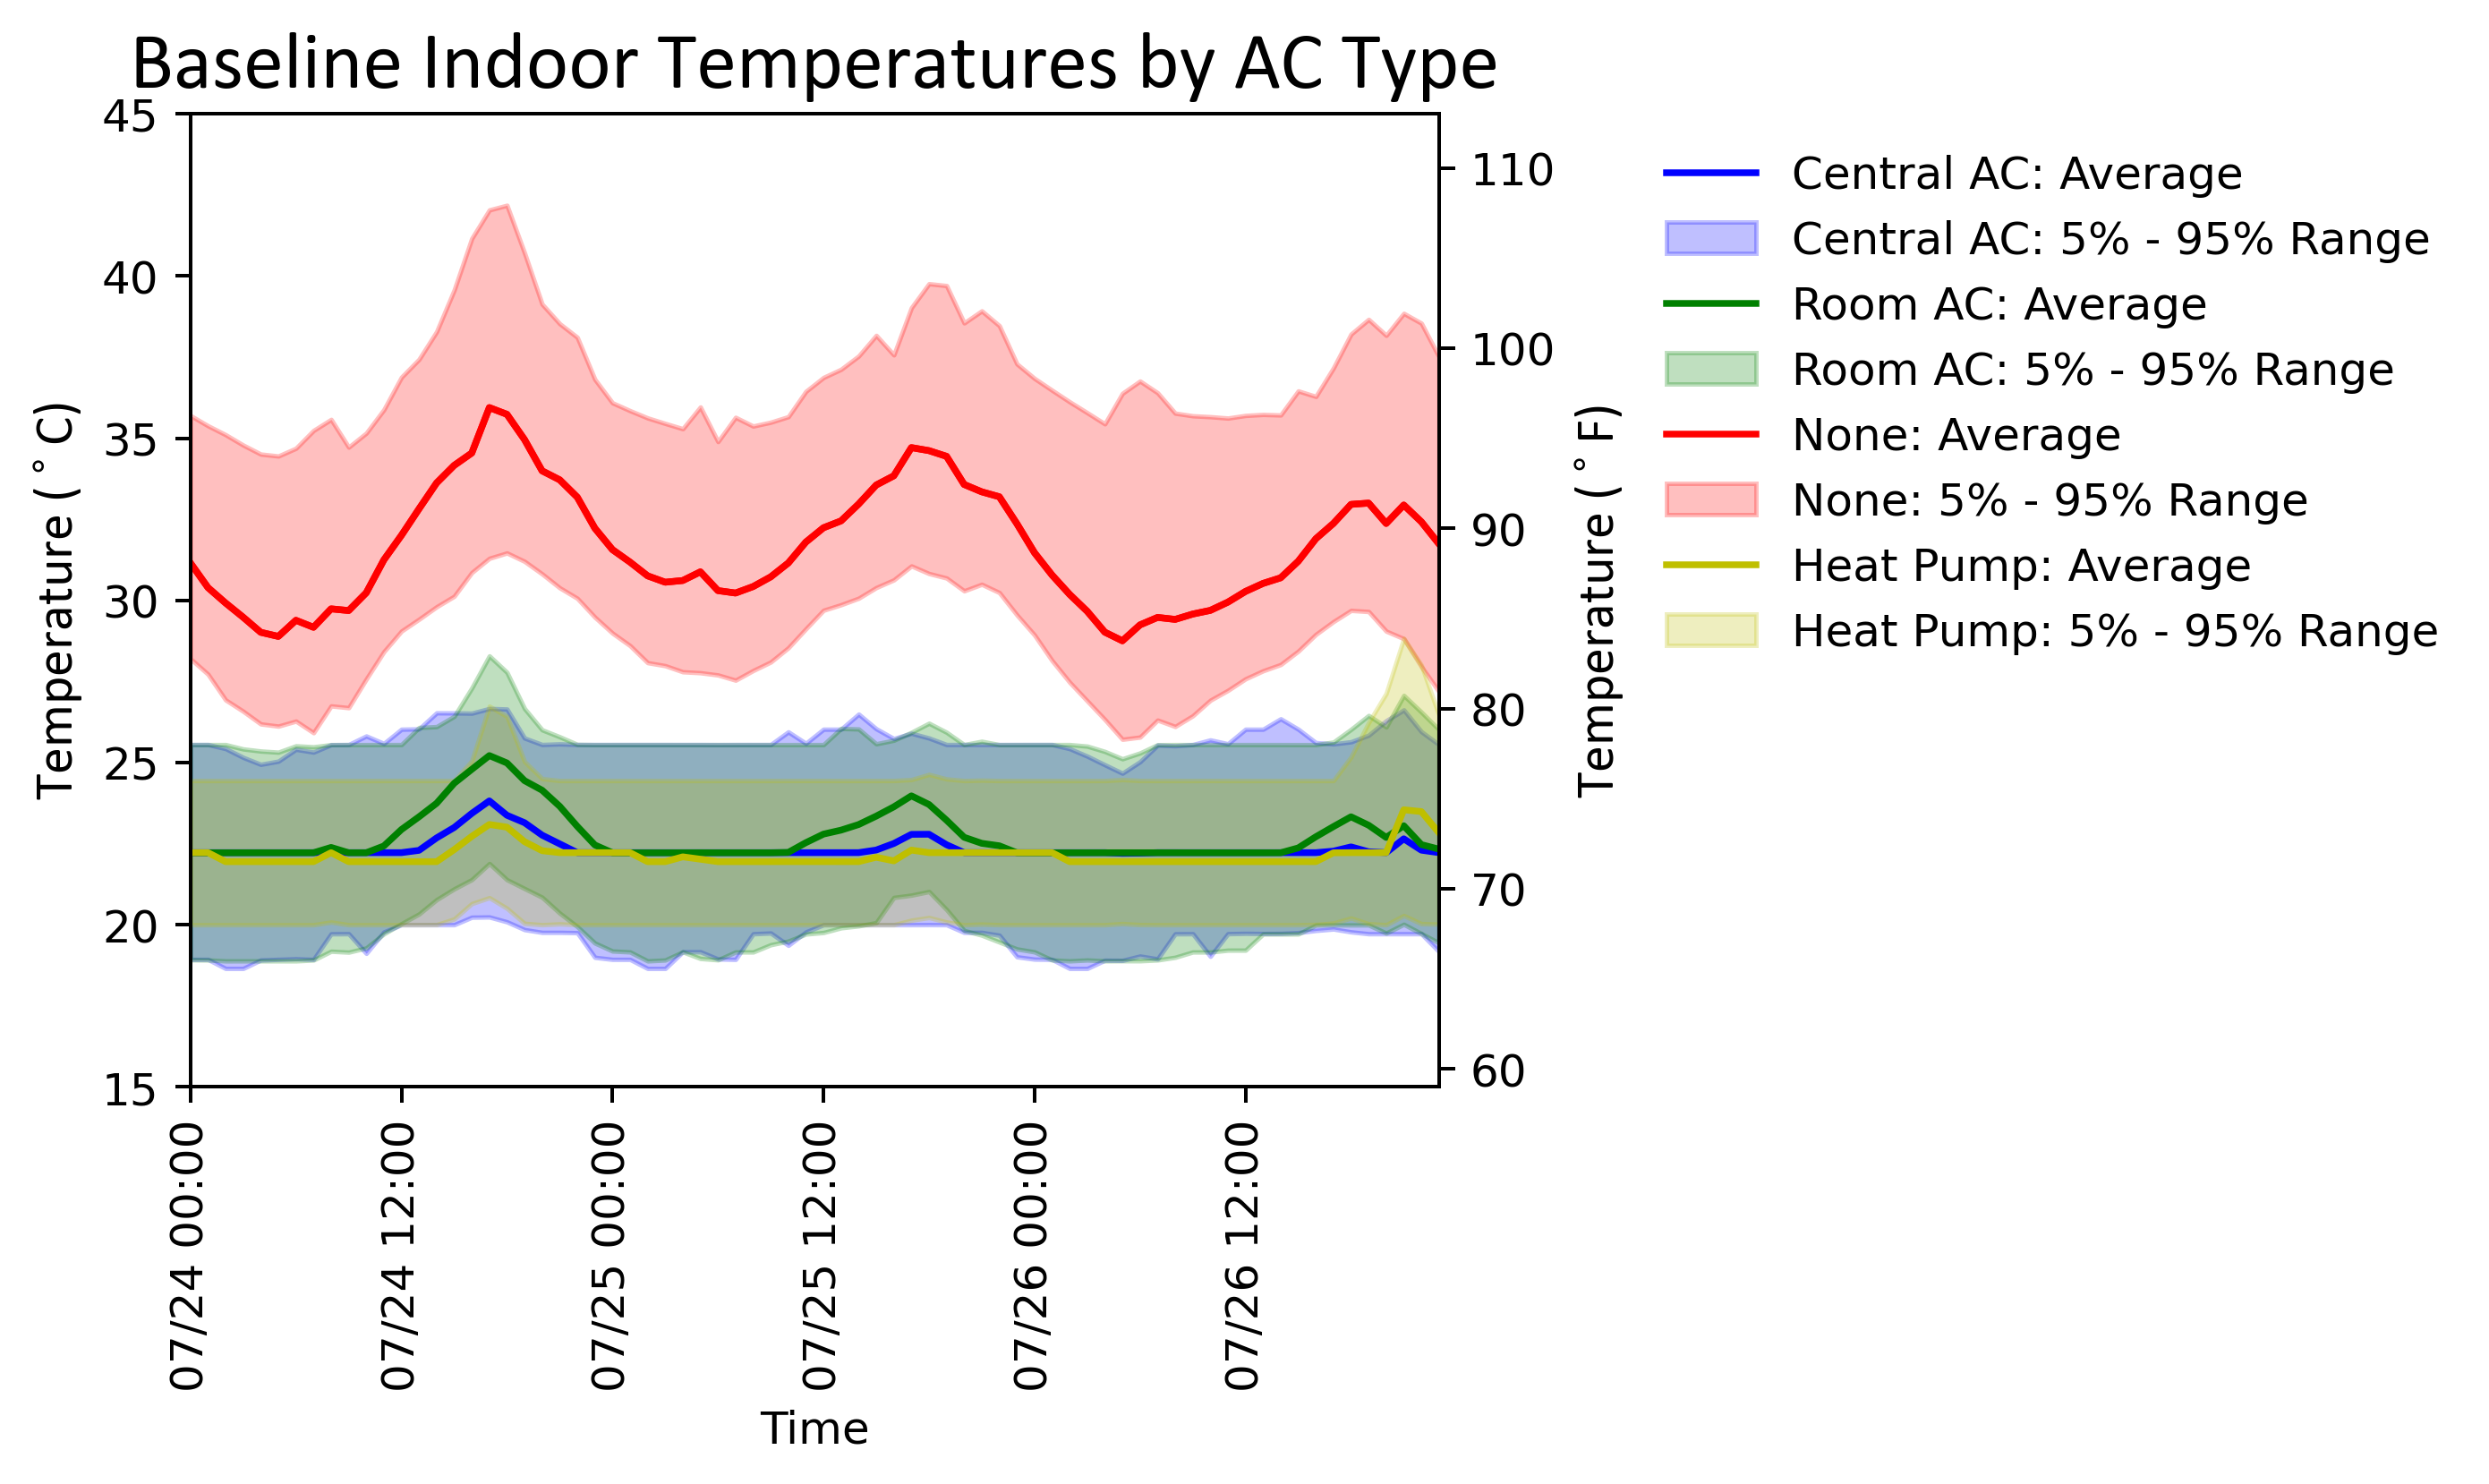

In [16]:
baseline_summary = pd.DataFrame()
baseline_summary['Date/Time'] = baseline_temperature['Date/Time']
f4, ax4=plt.subplots(figsize=(5,4),dpi=360)

for hvac_type in pd.unique(metadata['in.hvac_cooling_type']):
    cols = 'bldg' + metadata.loc[metadata['in.hvac_cooling_type']== hvac_type]['bldg_id'].astype(str)
    subset = pd.DataFrame(baseline_temperature, columns=cols)
    baseline_summary[hvac_type + ' - T - 5%'] = subset.quantile(q=.05,axis=1)
    baseline_summary[hvac_type + ' - T - 50%'] =subset.quantile(q=.5,axis=1)
    baseline_summary[hvac_type + ' - T - 95%'] = subset.quantile(q=.95,axis=1)
    if hvac_type == 'Central AC':
        hvac_color = 'b'
    elif hvac_type == 'Room AC':
        hvac_color = 'g'
    elif hvac_type == 'None':
        hvac_color = 'r'
    else:
        hvac_color = 'y'
    ax4.plot(baseline_summary['Date/Time'],baseline_summary[hvac_type + ' - T - 50%'],color = hvac_color,label= str(hvac_type + ": Average"))
    ax4.fill_between(baseline_summary['Date/Time'], baseline_summary[hvac_type + ' - T - 5%'], baseline_summary[hvac_type + ' - T - 95%'],alpha=.25,color=hvac_color,label= str(hvac_type + ": 5% - 95% Range"))

x_ticks = pd.date_range(start =min(baseline_temperature['Date/Time']), end =max(baseline_temperature['Date/Time']),freq ='12H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M')
ax4.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax4b=ax4.twinx()
ax4b.plot(baseline_summary['Date/Time'],32+(9/5)*baseline_summary['None - T - 50%'],color = 'r')
ax4.set_xlim(min(baseline_summary['Date/Time']),max(baseline_summary['Date/Time']))
# y_min = 2*math.floor(baseline_summary['Central AC - T - 5%'].min()/2)
# y_max = 2*math.ceil(baseline_summary['None - T - 95%'].max()/2)
ax4.set_ylim((y_min_t,y_max_t))
ax4b.set_ylim((32+(9/5)*y_min_t,32+(9/5)*y_max_t))
ax4b.set_ylabel('Temperature ($^\circ$F)',fontsize=labelsize,**labelfont)
ax4.set_xlabel('Time')
ax4.set_ylabel('Temperature ($^\circ$C)',fontsize=labelsize,**labelfont)
ax4.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left',frameon=False)
ax4.set_title('Baseline Indoor Temperatures by AC Type',fontsize=titlesize,**labelfont)

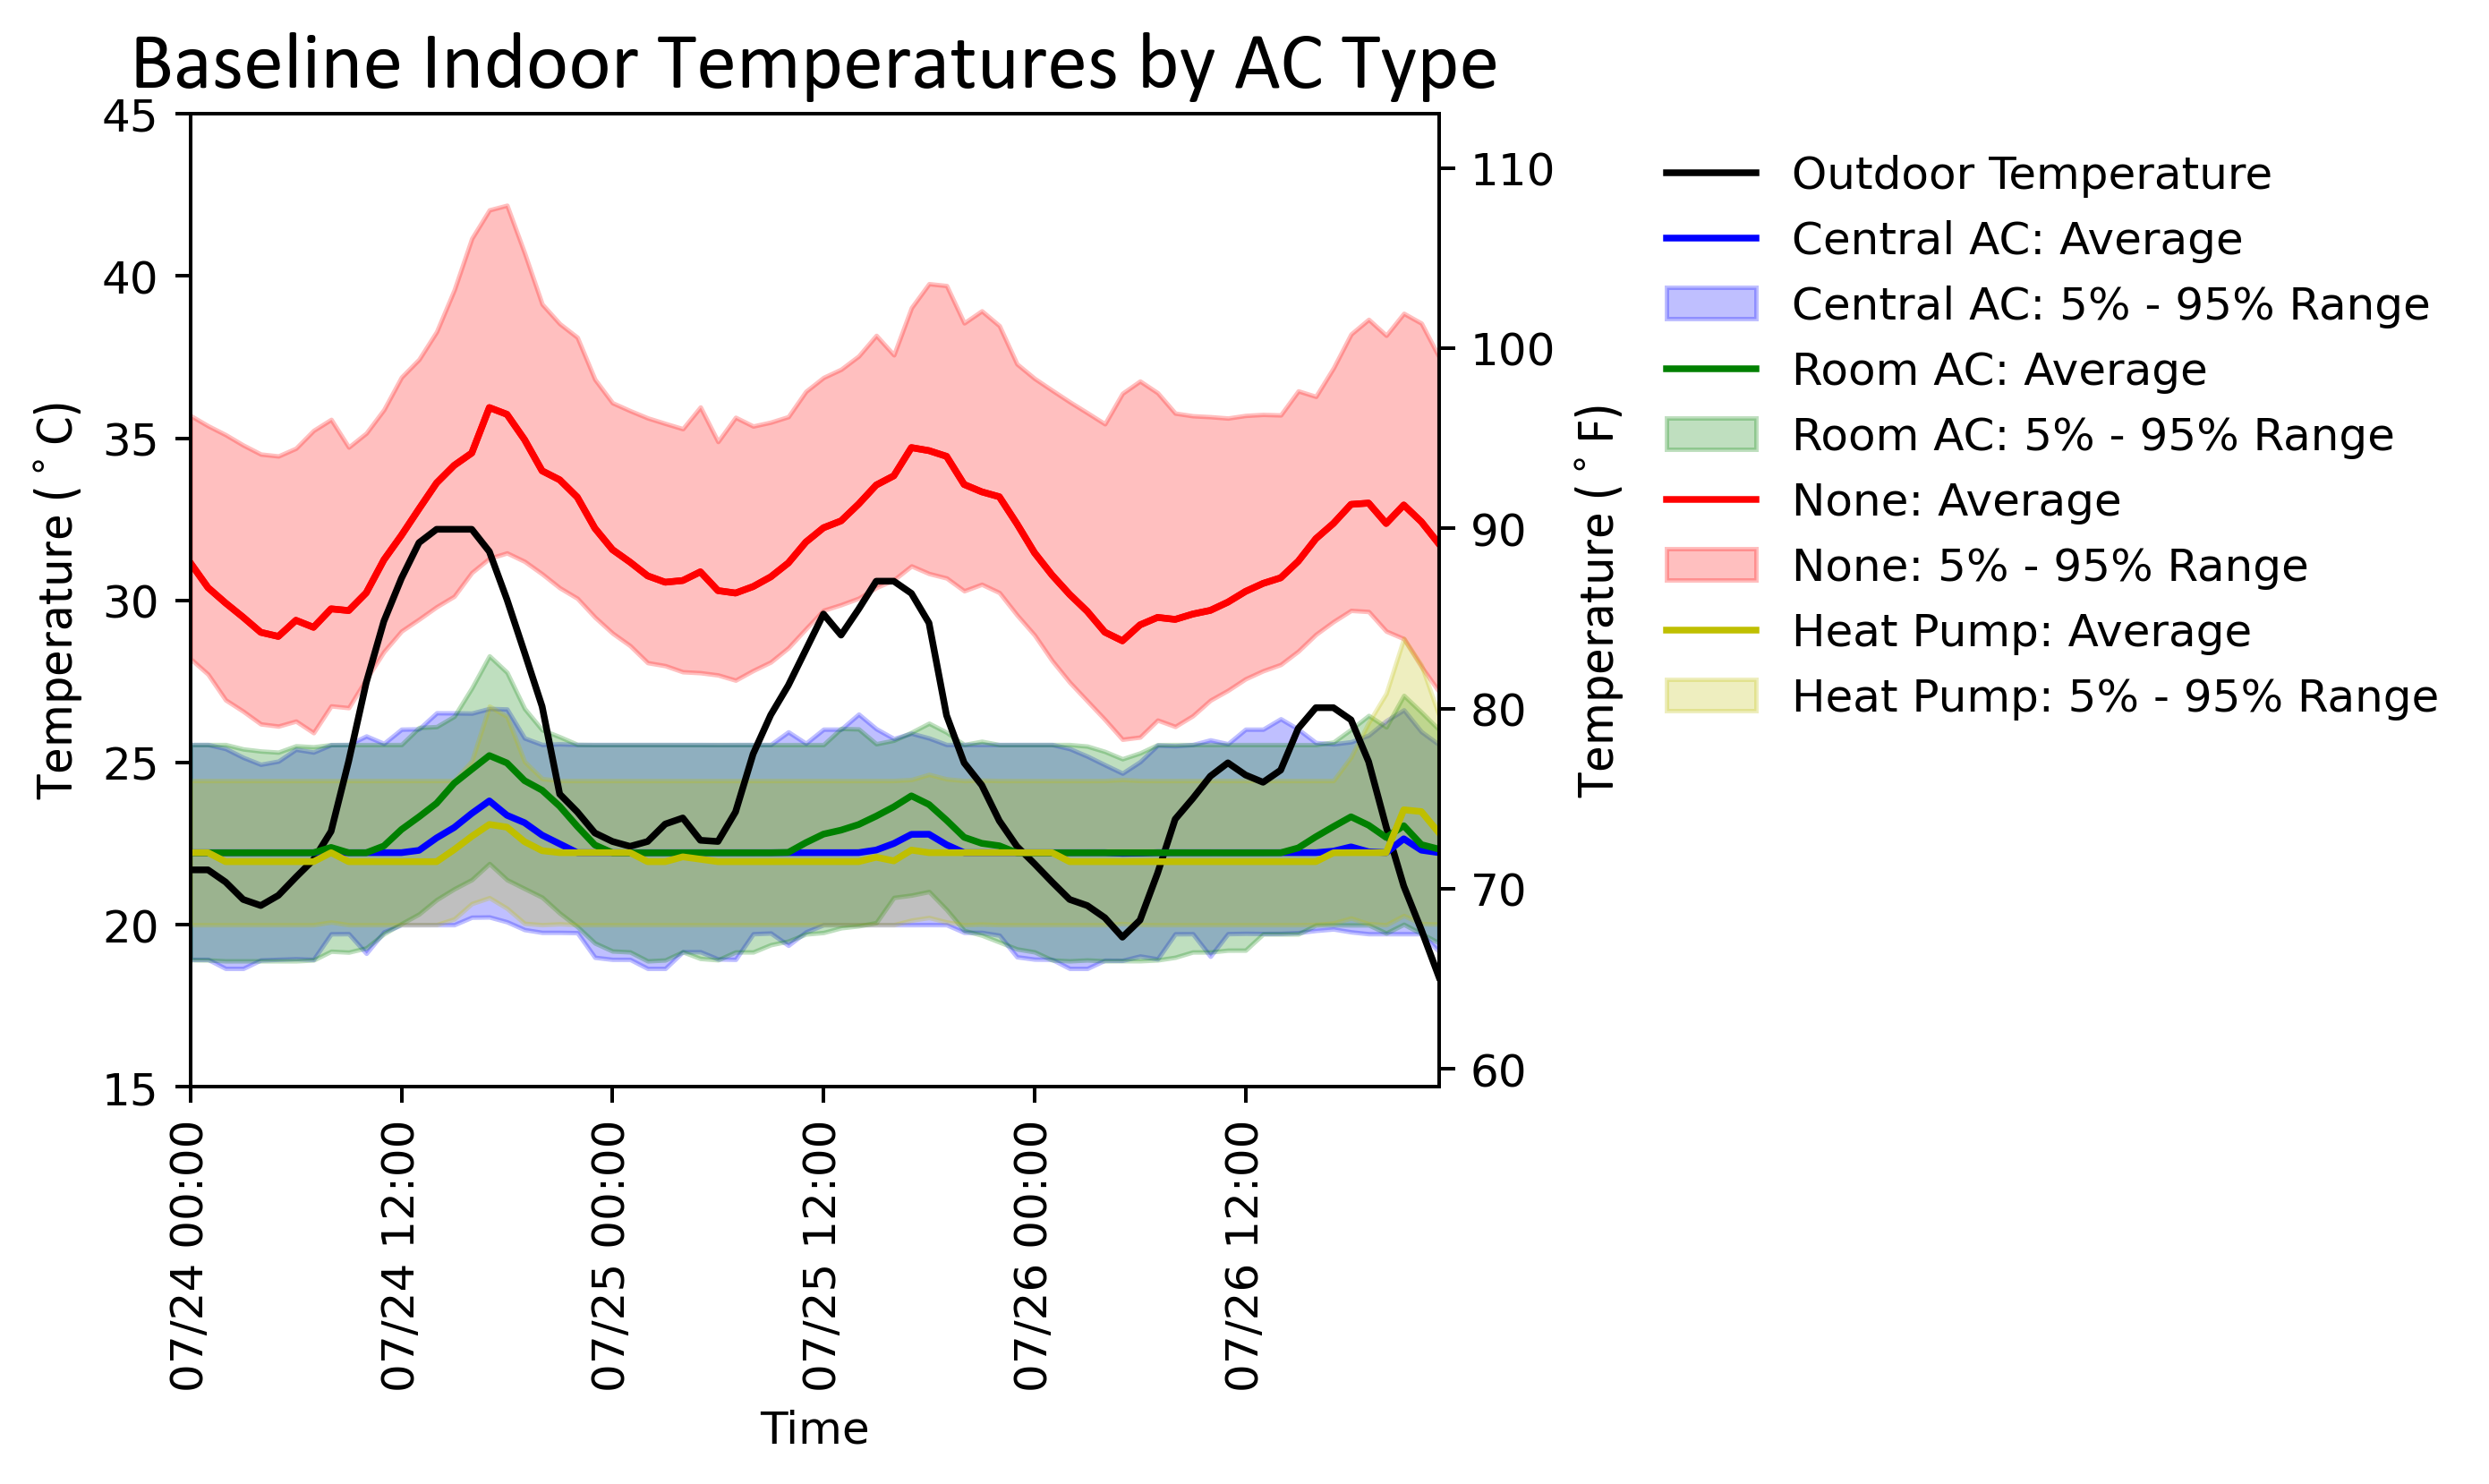

In [17]:
baseline_summary = pd.DataFrame()
baseline_summary['Date/Time'] = baseline_temperature['Date/Time']
f4, ax4=plt.subplots(figsize=(5,4),dpi=360)
ax4.plot(outdoor['Date/Time'],outdoor['Outdoor Temp'],color='k',label='Outdoor Temperature')
for hvac_type in pd.unique(metadata['in.hvac_cooling_type']):
    cols = 'bldg' + metadata.loc[metadata['in.hvac_cooling_type']== hvac_type]['bldg_id'].astype(str)
    subset = pd.DataFrame(baseline_temperature, columns=cols)
    baseline_summary[hvac_type + ' - T - 5%'] = subset.quantile(q=.05,axis=1)
    baseline_summary[hvac_type + ' - T - 50%'] =subset.quantile(q=.5,axis=1)
    baseline_summary[hvac_type + ' - T - 95%'] = subset.quantile(q=.95,axis=1)
    if hvac_type == 'Central AC':
        hvac_color = 'b'
    elif hvac_type == 'Room AC':
        hvac_color = 'g'
    elif hvac_type == 'None':
        hvac_color = 'r'
    else:
        hvac_color = 'y'
    ax4.plot(baseline_summary['Date/Time'],baseline_summary[hvac_type + ' - T - 50%'],color = hvac_color,label= str(hvac_type + ": Average"))
    ax4.fill_between(baseline_summary['Date/Time'], baseline_summary[hvac_type + ' - T - 5%'], baseline_summary[hvac_type + ' - T - 95%'],alpha=.25,color=hvac_color,label= str(hvac_type + ": 5% - 95% Range"))
x_ticks = pd.date_range(start =min(baseline_temperature['Date/Time']), end =max(baseline_temperature['Date/Time']),freq ='12H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M')
ax4.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax4b=ax4.twinx()
ax4b.plot(baseline_summary['Date/Time'],32+(9/5)*baseline_summary['None - T - 50%'],color = 'r')
ax4.set_xlim(min(baseline_summary['Date/Time']),max(baseline_summary['Date/Time']))
# y_min = 2*math.floor(baseline_summary['Central AC - T - 5%'].min()/2)
# y_max = 2*math.ceil(baseline_summary['None - T - 95%'].max()/2)
ax4.set_ylim((y_min_t,y_max_t))
ax4b.set_ylim((32+(9/5)*y_min_t,32+(9/5)*y_max_t))
ax4b.set_ylabel('Temperature ($^\circ$F)',fontsize=labelsize,**labelfont)
ax4.set_xlabel('Time')
ax4.set_ylabel('Temperature ($^\circ$C)',fontsize=labelsize,**labelfont)
ax4.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left',frameon=False)
ax4.set_title('Baseline Indoor Temperatures by AC Type',fontsize=titlesize,**labelfont)
f4.savefig(data_file_path + "/figures/"+"BaselineTempByAcType.svg",bbox_inches = "tight")

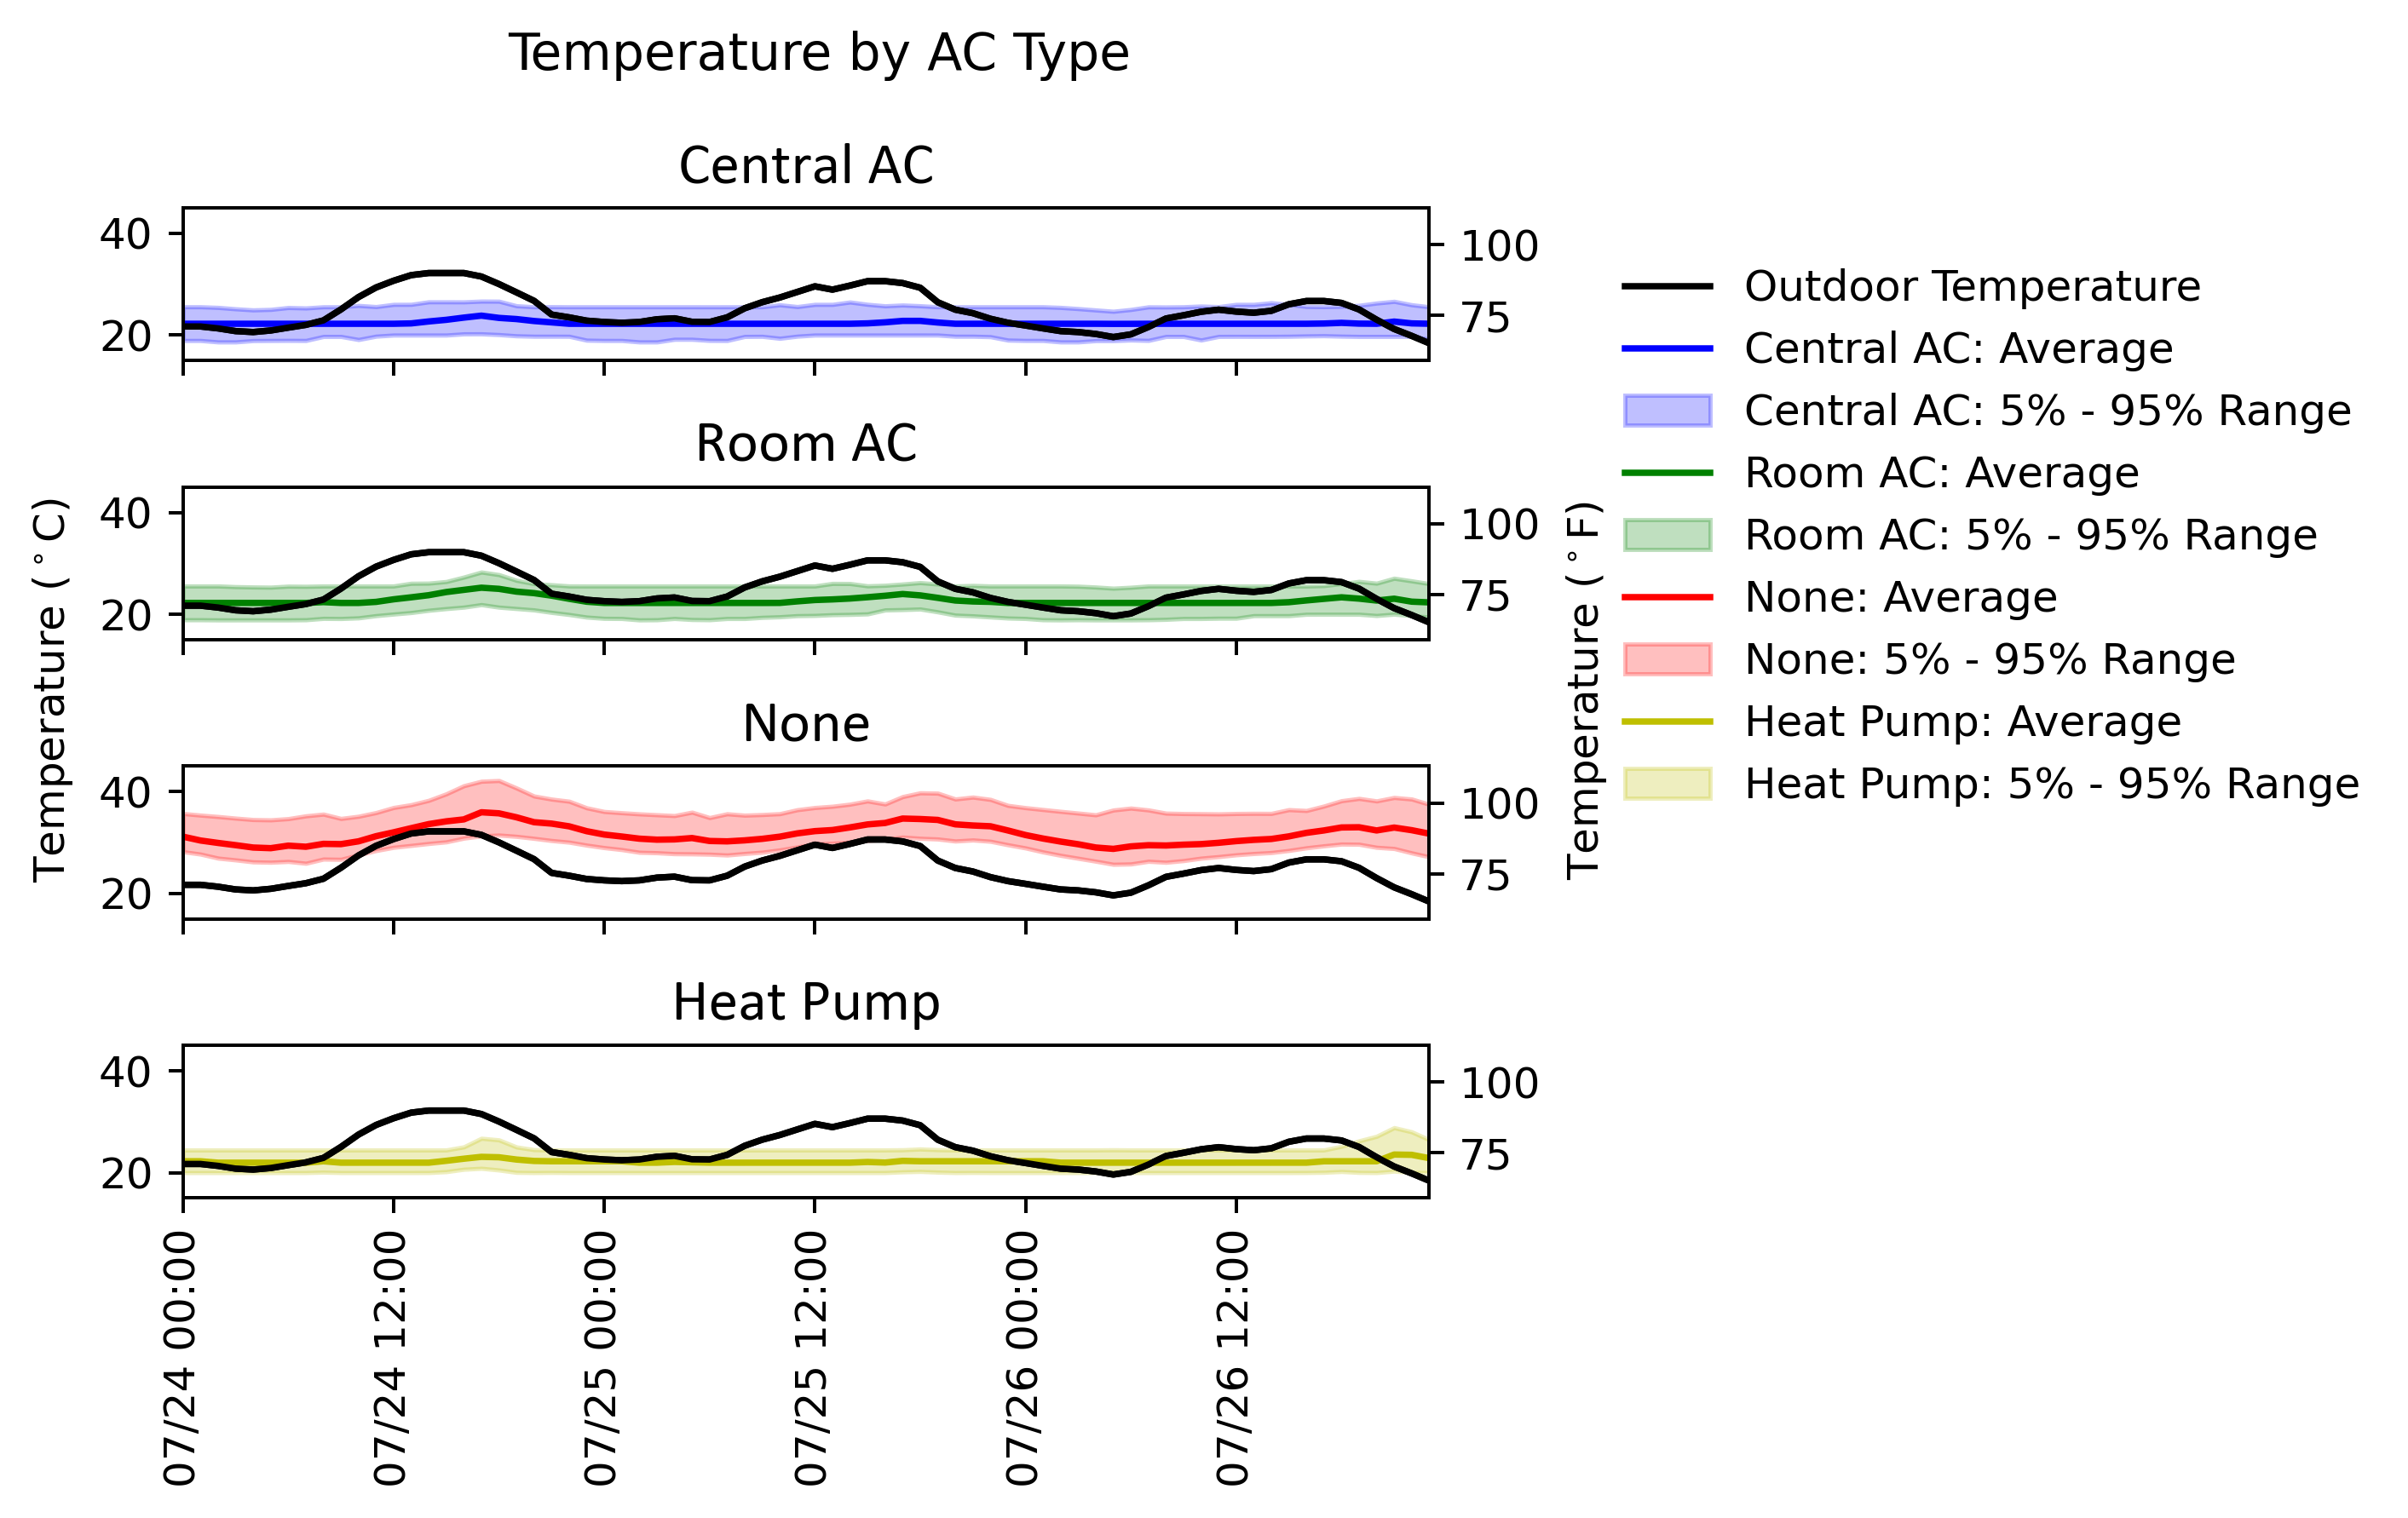

In [18]:
fig, axs = plt.subplots(4,figsize=(5,5),dpi=360)
# y_min = 15
# y_max = 45
# fig.suptitle('Vertically stacked subplots')
ax_id = 0 
for hvac_type in pd.unique(metadata['in.hvac_cooling_type']):
    if hvac_type == 'Central AC':
        hvac_color = 'b'
    elif hvac_type == 'Room AC':
        hvac_color = 'g'
    elif hvac_type == 'None':
        hvac_color = 'r'
    else:
        hvac_color = 'y'
    if ax_id == 0: 
        axs[ax_id].plot(outdoor['Date/Time'],outdoor['Outdoor Temp'],color='k',label='Outdoor Temperature')
    else:
        axs[ax_id].plot(outdoor['Date/Time'],outdoor['Outdoor Temp'],color='k')
    axs[ax_id].set_title(hvac_type,fontsize=subtitlesize,**labelfont)    
    axs[ax_id].plot(baseline_summary['Date/Time'],baseline_summary[hvac_type + ' - T - 50%'],color = hvac_color,label= str(hvac_type + ": Average"))
    axs[ax_id].fill_between(baseline_summary['Date/Time'], baseline_summary[hvac_type + ' - T - 5%'], baseline_summary[hvac_type + ' - T - 95%'],alpha=.25,color=hvac_color,label= str(hvac_type + ": 5% - 95% Range"))
    axs[ax_id].set_ylim([y_min_t,y_max_t])
    axs[ax_id].set_xlim(min(baseline_summary['Date/Time']),max(baseline_summary['Date/Time']))
    axb=axs[ax_id].twinx()
    axb.set_ylim((32+(9/5)*y_min_t,32+(9/5)*y_max_t))
    axb.plot(outdoor['Date/Time'],outdoor['Outdoor Temp']*(9/5) + 32,color='k')
    
    ax_id = ax_id + 1
    
for ax in axs:
    ax.label_outer()
    
# plt.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left')
lines = []
labels = []
  
for ax in fig.axes:
    Line, Label = ax.get_legend_handles_labels()
    # print(Label)
    lines.extend(Line)
    labels.extend(Label)
x_ticks = pd.date_range(start =min(baseline_temperature['Date/Time']), end =max(baseline_temperature['Date/Time']),freq ='12H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M')
axs[ax_id - 1].set_xticks(x_ticks,x_tick_labels,rotation='vertical')
fig.tight_layout()
fig.legend(lines, labels, bbox_to_anchor=(1, .85), loc='upper left',frameon=False)
fig.text(0, 0.55, 'Temperature ($^\circ$C)', ha='center', va='center', rotation='vertical')
fig.text(1, 0.55, 'Temperature ($^\circ$F)', ha='center', va='center', rotation='vertical')
fig.suptitle('Temperature by AC Type')
fig.tight_layout()
fig.savefig(data_file_path + "/figures/"+"BaselineTempByAcTypeSplit.svg",bbox_inches = "tight")

In [19]:
# Area plots for each outage
# pick a color for temp, temp_diff, electricity, gas 

In [20]:
# Outage
otg = '2'
# for each outage
outage_temperature = pd.read_csv(data_file_path + "/summary/outage_temperature_" + otg + "_hr.csv")
outage_temperature['Date/Time'] = pd.to_datetime(outage_temperature['Date/Time'])
# outage_temp_diff = pd.read_csv(data_file_path + "/summary/outage_temp_diff_" + otg + "_hr.csv")
# outage_temp_diff['Date/Time'] = pd.to_datetime(outage_temp_diff['Date/Time'])
outage_electricity = pd.read_csv(data_file_path + "/summary/outage_electricity_" + otg + "_hr.csv")
outage_electricity['Date/Time'] = pd.to_datetime(outage_electricity['Date/Time'])
outage_gas = pd.read_csv(data_file_path + "/summary/outage_gas_" + otg + "_hr.csv")
outage_gas['Date/Time'] = pd.to_datetime(outage_gas['Date/Time'])

window_start = otg_start - pd.Timedelta(6,"H")
window_end = otg_start + pd.Timedelta(6,"H")
otg_end = otg_start + pd.Timedelta(int(otg),"H")

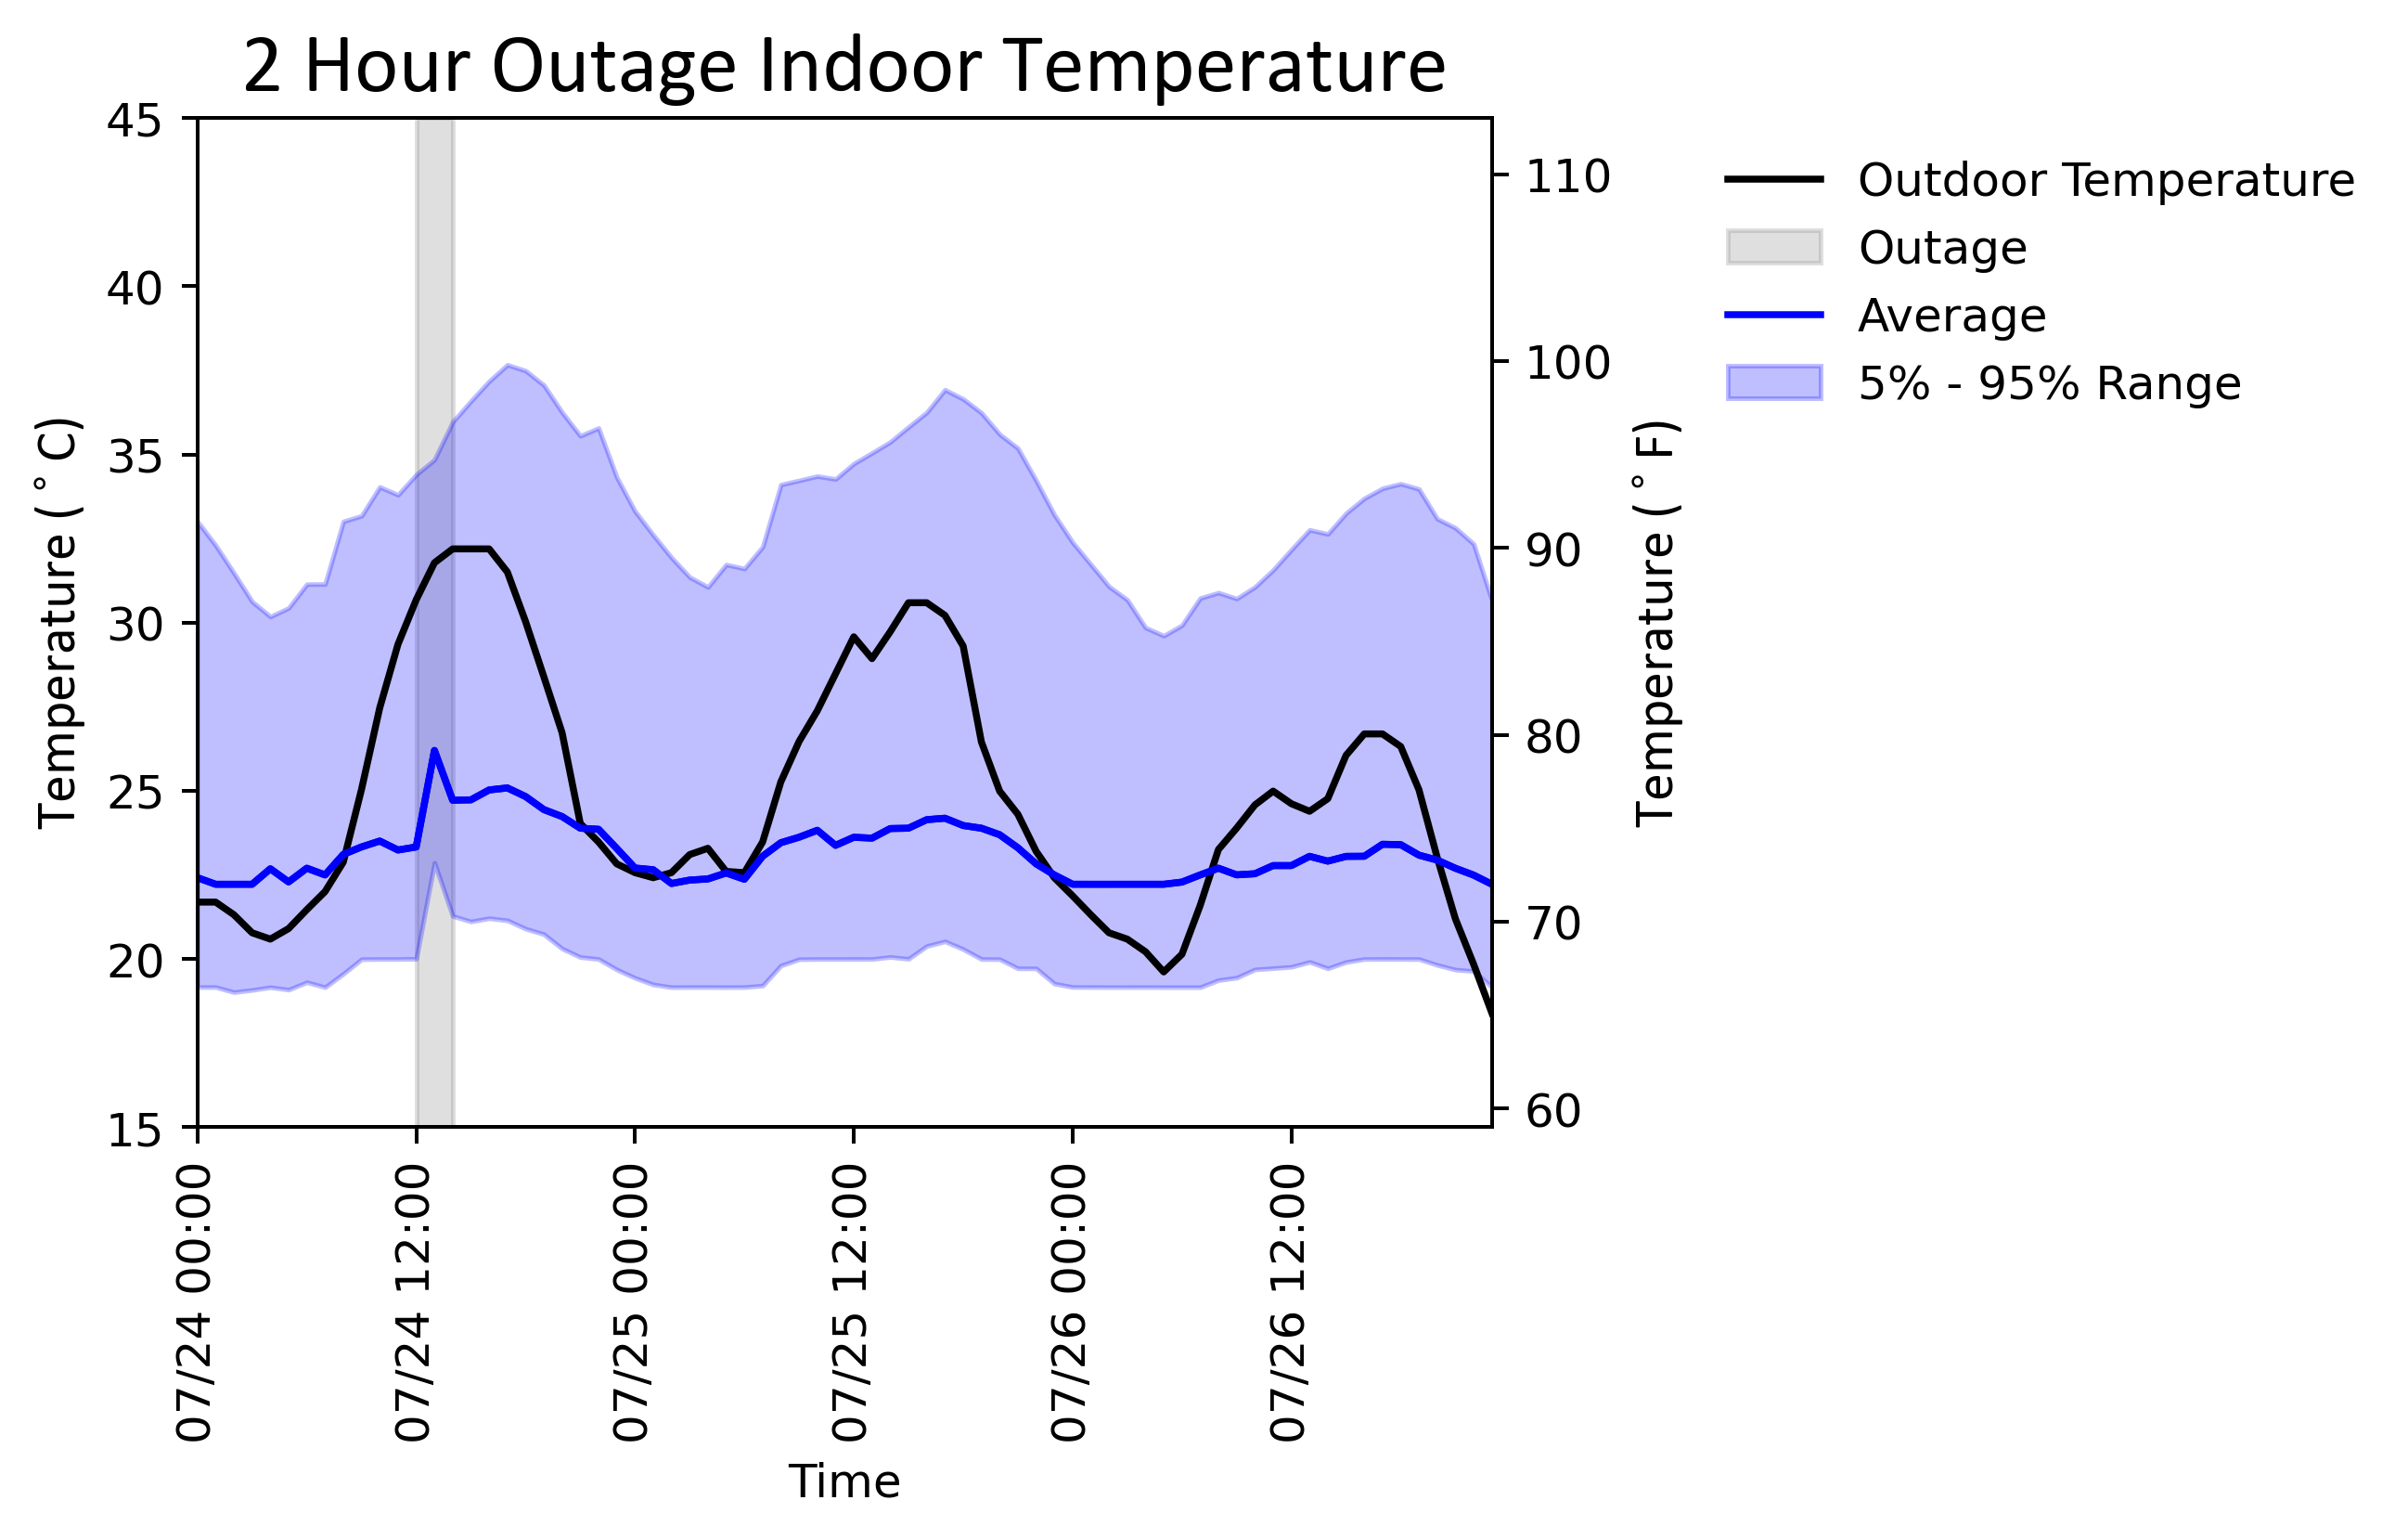

In [21]:
outage_summary = pd.DataFrame()
outage_summary['Date/Time'] = outage_temperature['Date/Time']
scale = 2
f5,ax5=plt.subplots(figsize=(5,4),dpi=360)
ax5.plot(outdoor['Date/Time'],outdoor['Outdoor Temp'],color='k',label='Outdoor Temperature')
ax5.fill_between([otg_start, otg_end],[y_max_t,y_max_t],alpha=.25,color='grey',label= "Outage")
outage_summary['T - 5%'] = outage_temperature.quantile(q=.05,axis=1)
outage_summary['T - 50%'] =outage_temperature.quantile(q=.5,axis=1)
outage_summary['T - 95%'] = outage_temperature.quantile(q=.95,axis=1)
ax5.plot(outage_summary['Date/Time'],outage_summary['T - 50%'],color = 'b',label= str("Average"))
ax5.fill_between(outage_summary['Date/Time'], outage_summary['T - 5%'], outage_summary['T - 95%'],alpha=.25,color='b',label= str("5% - 95% Range"))
x_ticks = pd.date_range(start =min(outage_summary['Date/Time']), end =max(outage_summary['Date/Time']),freq ='12H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M')
ax5.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax5.set_xlabel('Time')
ax5.set_ylabel('Temperature ($^\circ$C)',fontsize=labelsize,**labelfont)
ax5.set_xlim(min(outage_summary['Date/Time']),max(outage_summary['Date/Time']))
# y_min = 15# scale*math.floor(outdoor['Outdoor Temp'].min()/scale) - scale
# y_max = 40#scale*math.ceil(outdoor['Outdoor Temp'].max()/scale)
ax5.set_ylim((y_min_t,y_max_t))
ax5b = ax5.twinx()
ax5b.plot(outage_summary['Date/Time'],32+(9/5)*outage_summary['T - 50%'],color = 'b',label= str("Average"))
ax5b.set_ylim((32+(9/5)*y_min_t,32+(9/5)*y_max_t))
ax5b.set_ylabel('Temperature ($^\circ$F)',fontsize=labelsize,**labelfont)
ax5.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left',frameon=False)
ax5.set_title(otg + ' Hour Outage Indoor Temperature',fontsize=titlesize,**labelfont)
f5.savefig(data_file_path + "/figures/"+ otg + "HrOutageTemp.svg",bbox_inches = "tight")

Text(0.5, 1.0, '2Hour Outage Indoor Temperatures by AC Type')

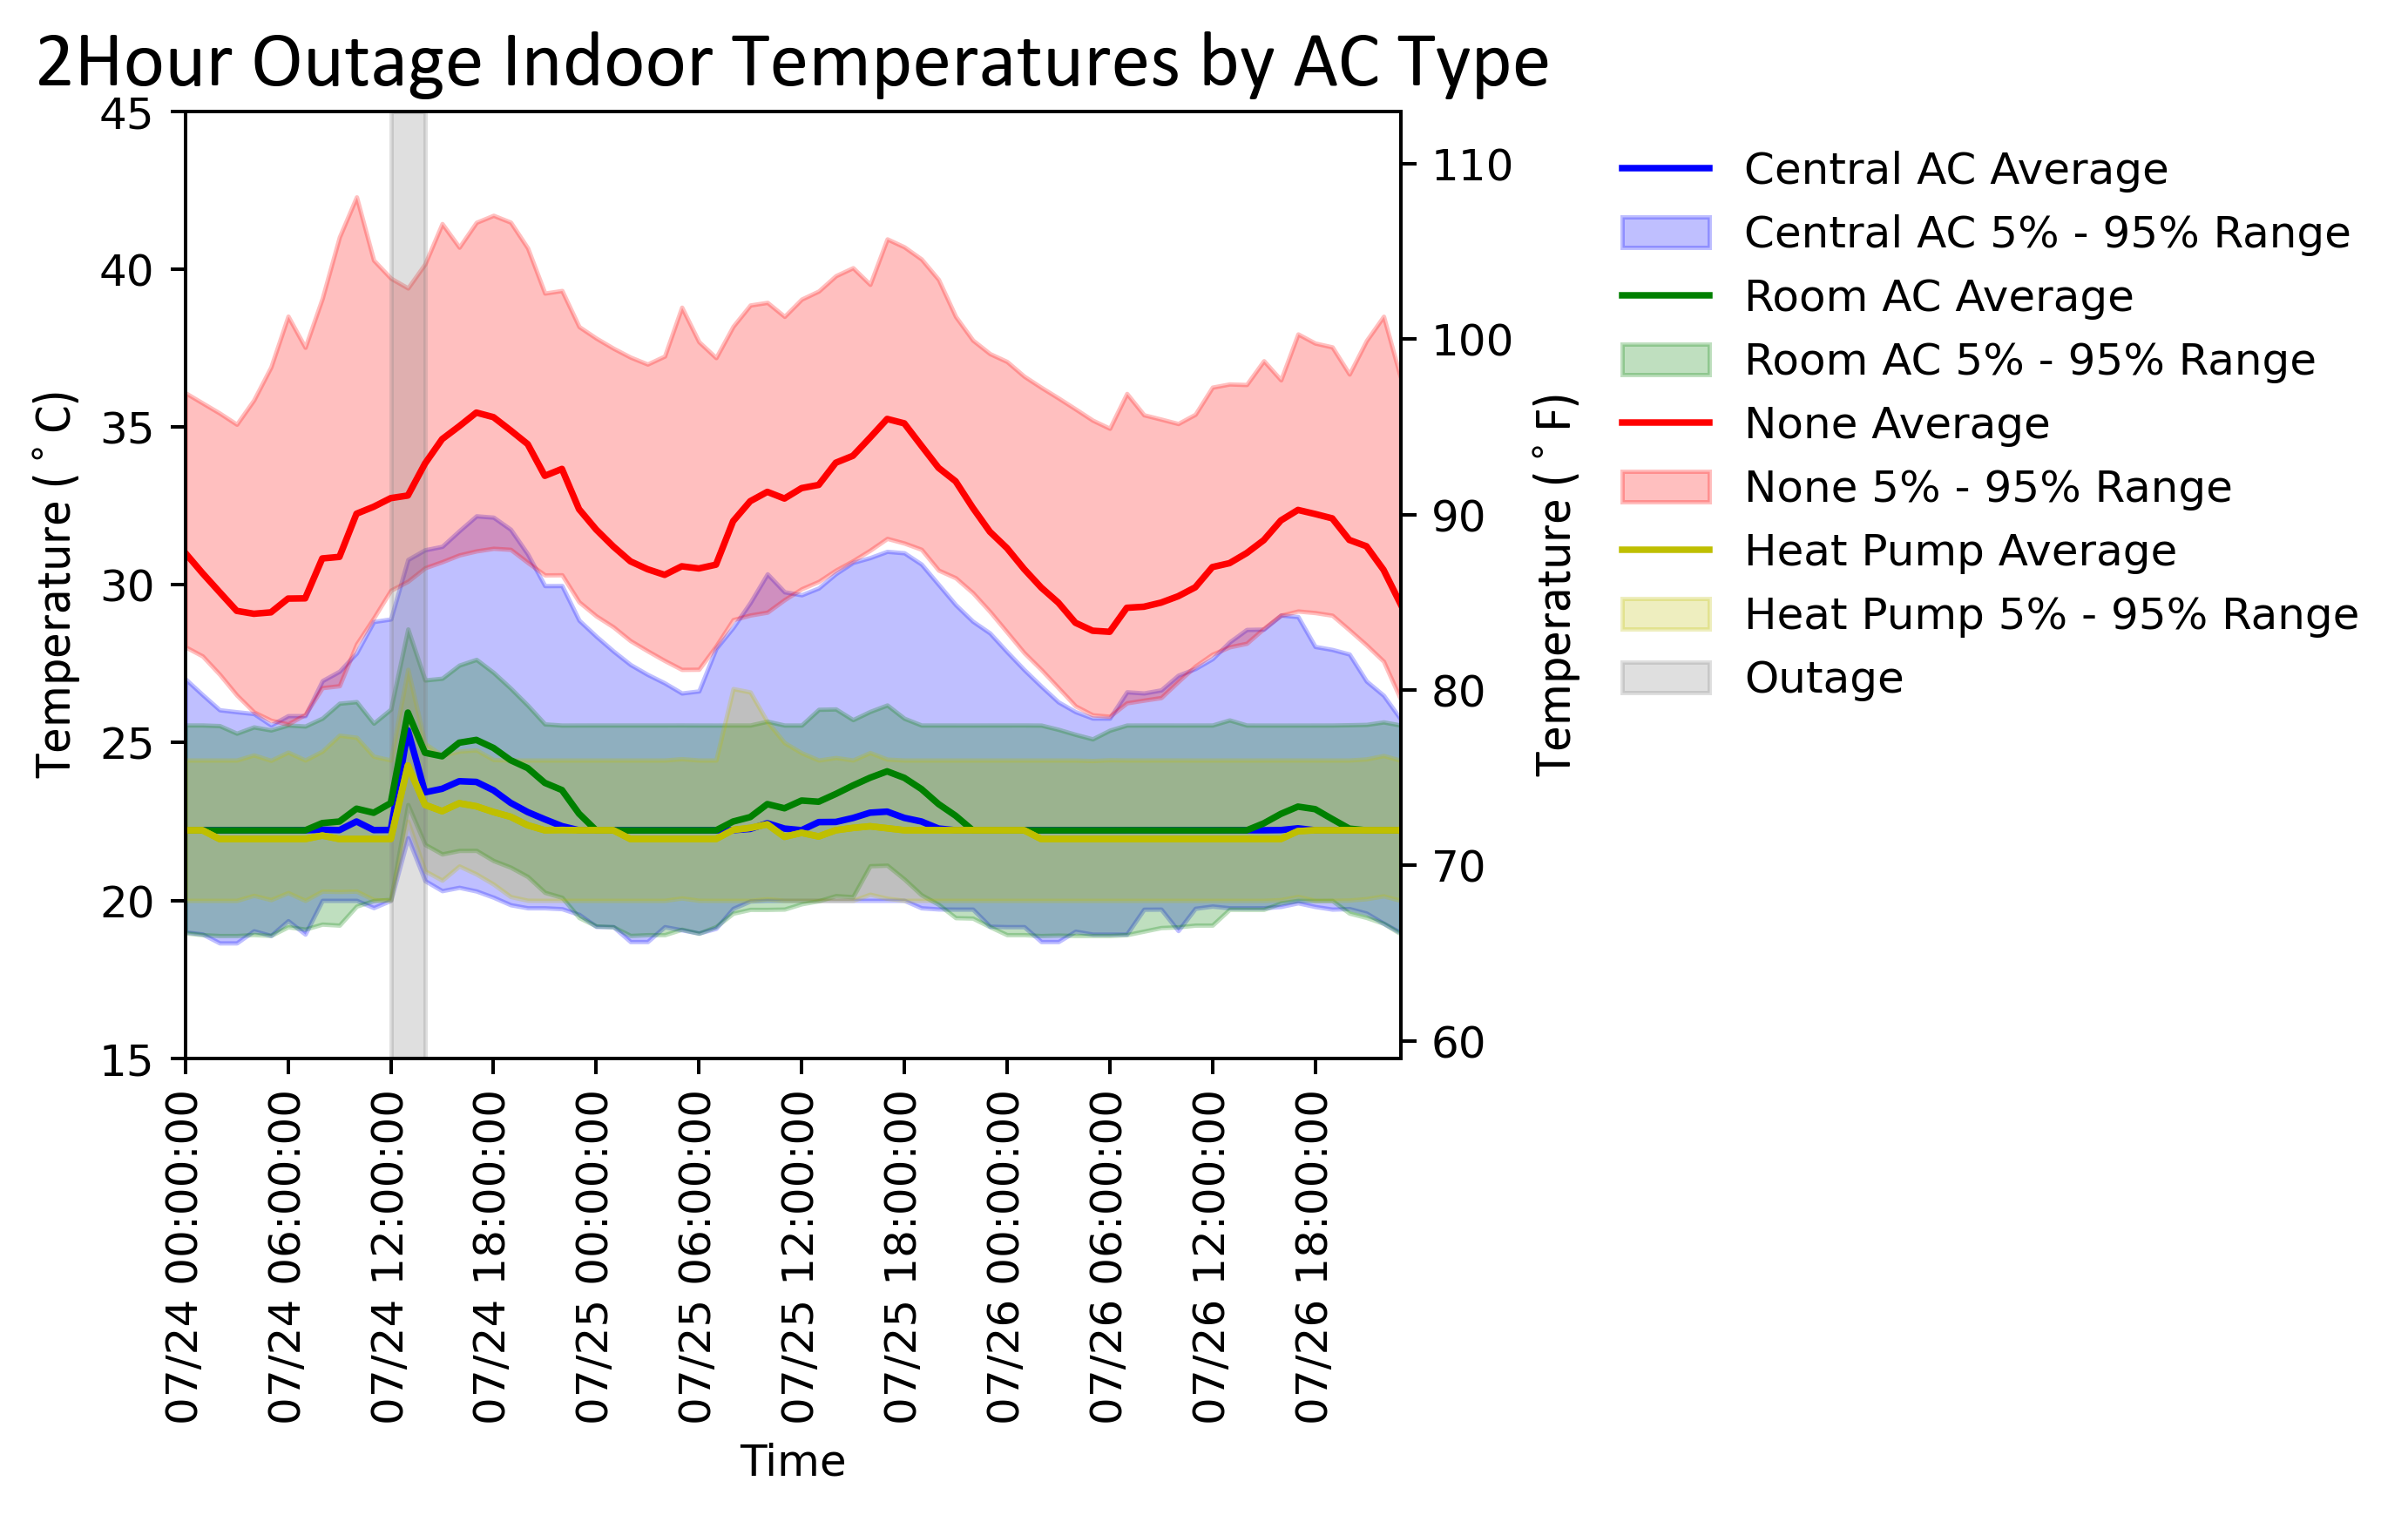

In [22]:
outage_summary = pd.DataFrame()
outage_summary['Date/Time'] = outage_temperature['Date/Time']

f5,ax5=plt.subplots(figsize=(5,4),dpi=360)
for hvac_type in pd.unique(metadata['in.hvac_cooling_type']):
    cols = 'bldg' + metadata.loc[metadata['in.hvac_cooling_type']== hvac_type]['bldg_id'].astype(str)
    subset = pd.DataFrame(outage_temperature, columns=cols)
    outage_summary[hvac_type + ' - T - 5%'] = subset.quantile(q=.05,axis=1)
    outage_summary[hvac_type + ' - T - 50%'] =subset.quantile(q=.5,axis=1)
    outage_summary[hvac_type + ' - T - 95%'] = subset.quantile(q=.95,axis=1)
    if hvac_type == 'Central AC':
        hvac_color = 'b'
    elif hvac_type == 'Room AC':
        hvac_color = 'g'
    elif hvac_type == 'None':
        hvac_color = 'r'
    else:
        hvac_color = 'y'
    ax5.plot(outage_summary['Date/Time'],outage_summary[hvac_type + ' - T - 50%'],color = hvac_color,label= str(hvac_type + " Average"))
    ax5.fill_between(outage_summary['Date/Time'], outage_summary[hvac_type + ' - T - 5%'], outage_summary[hvac_type + ' - T - 95%'],alpha=.25,color=hvac_color,label= str(hvac_type + " 5% - 95% Range"))
x_ticks = pd.date_range(start =min(outage_summary['Date/Time']), end =max(outage_summary['Date/Time']),freq ='6H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M:%S')
ax5.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax5.set_xlabel('Time')
ax5.set_ylabel('Temperature ($^\circ$C)',fontsize=labelsize,**labelfont)
ax5.set_xlim(min(outage_summary['Date/Time']),max(outage_summary['Date/Time']))
# y_min = 2*math.floor(outage_summary['Central AC - T - 5%'].min()/2)
# y_max = 2*math.ceil(outage_summary['None - T - 95%'].max()/2)
ax5.fill_between([otg_start, otg_end],[y_max_t,y_max_t],alpha=.25,color='grey',label= "Outage")
ax5.set_ylim((y_min_t,y_max_t))
ax5b = ax5.twinx()
ax5b.plot(outage_summary['Date/Time'],32+(9/5)*outage_summary[hvac_type + ' - T - 50%'],color = hvac_color,label= str(hvac_type + " Average"))
ax5b.set_ylim((32+(9/5)*y_min_t,32+(9/5)*y_max_t))
ax5b.set_ylabel('Temperature ($^\circ$F)',fontsize=labelsize,**labelfont)
ax5.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left',frameon=False)
ax5.set_title(otg + 'Hour Outage Indoor Temperatures by AC Type',fontsize=titlesize,**labelfont)

Text(0.5, 1.0, '2 Hour Outage Indoor Temperatures by AC Type')

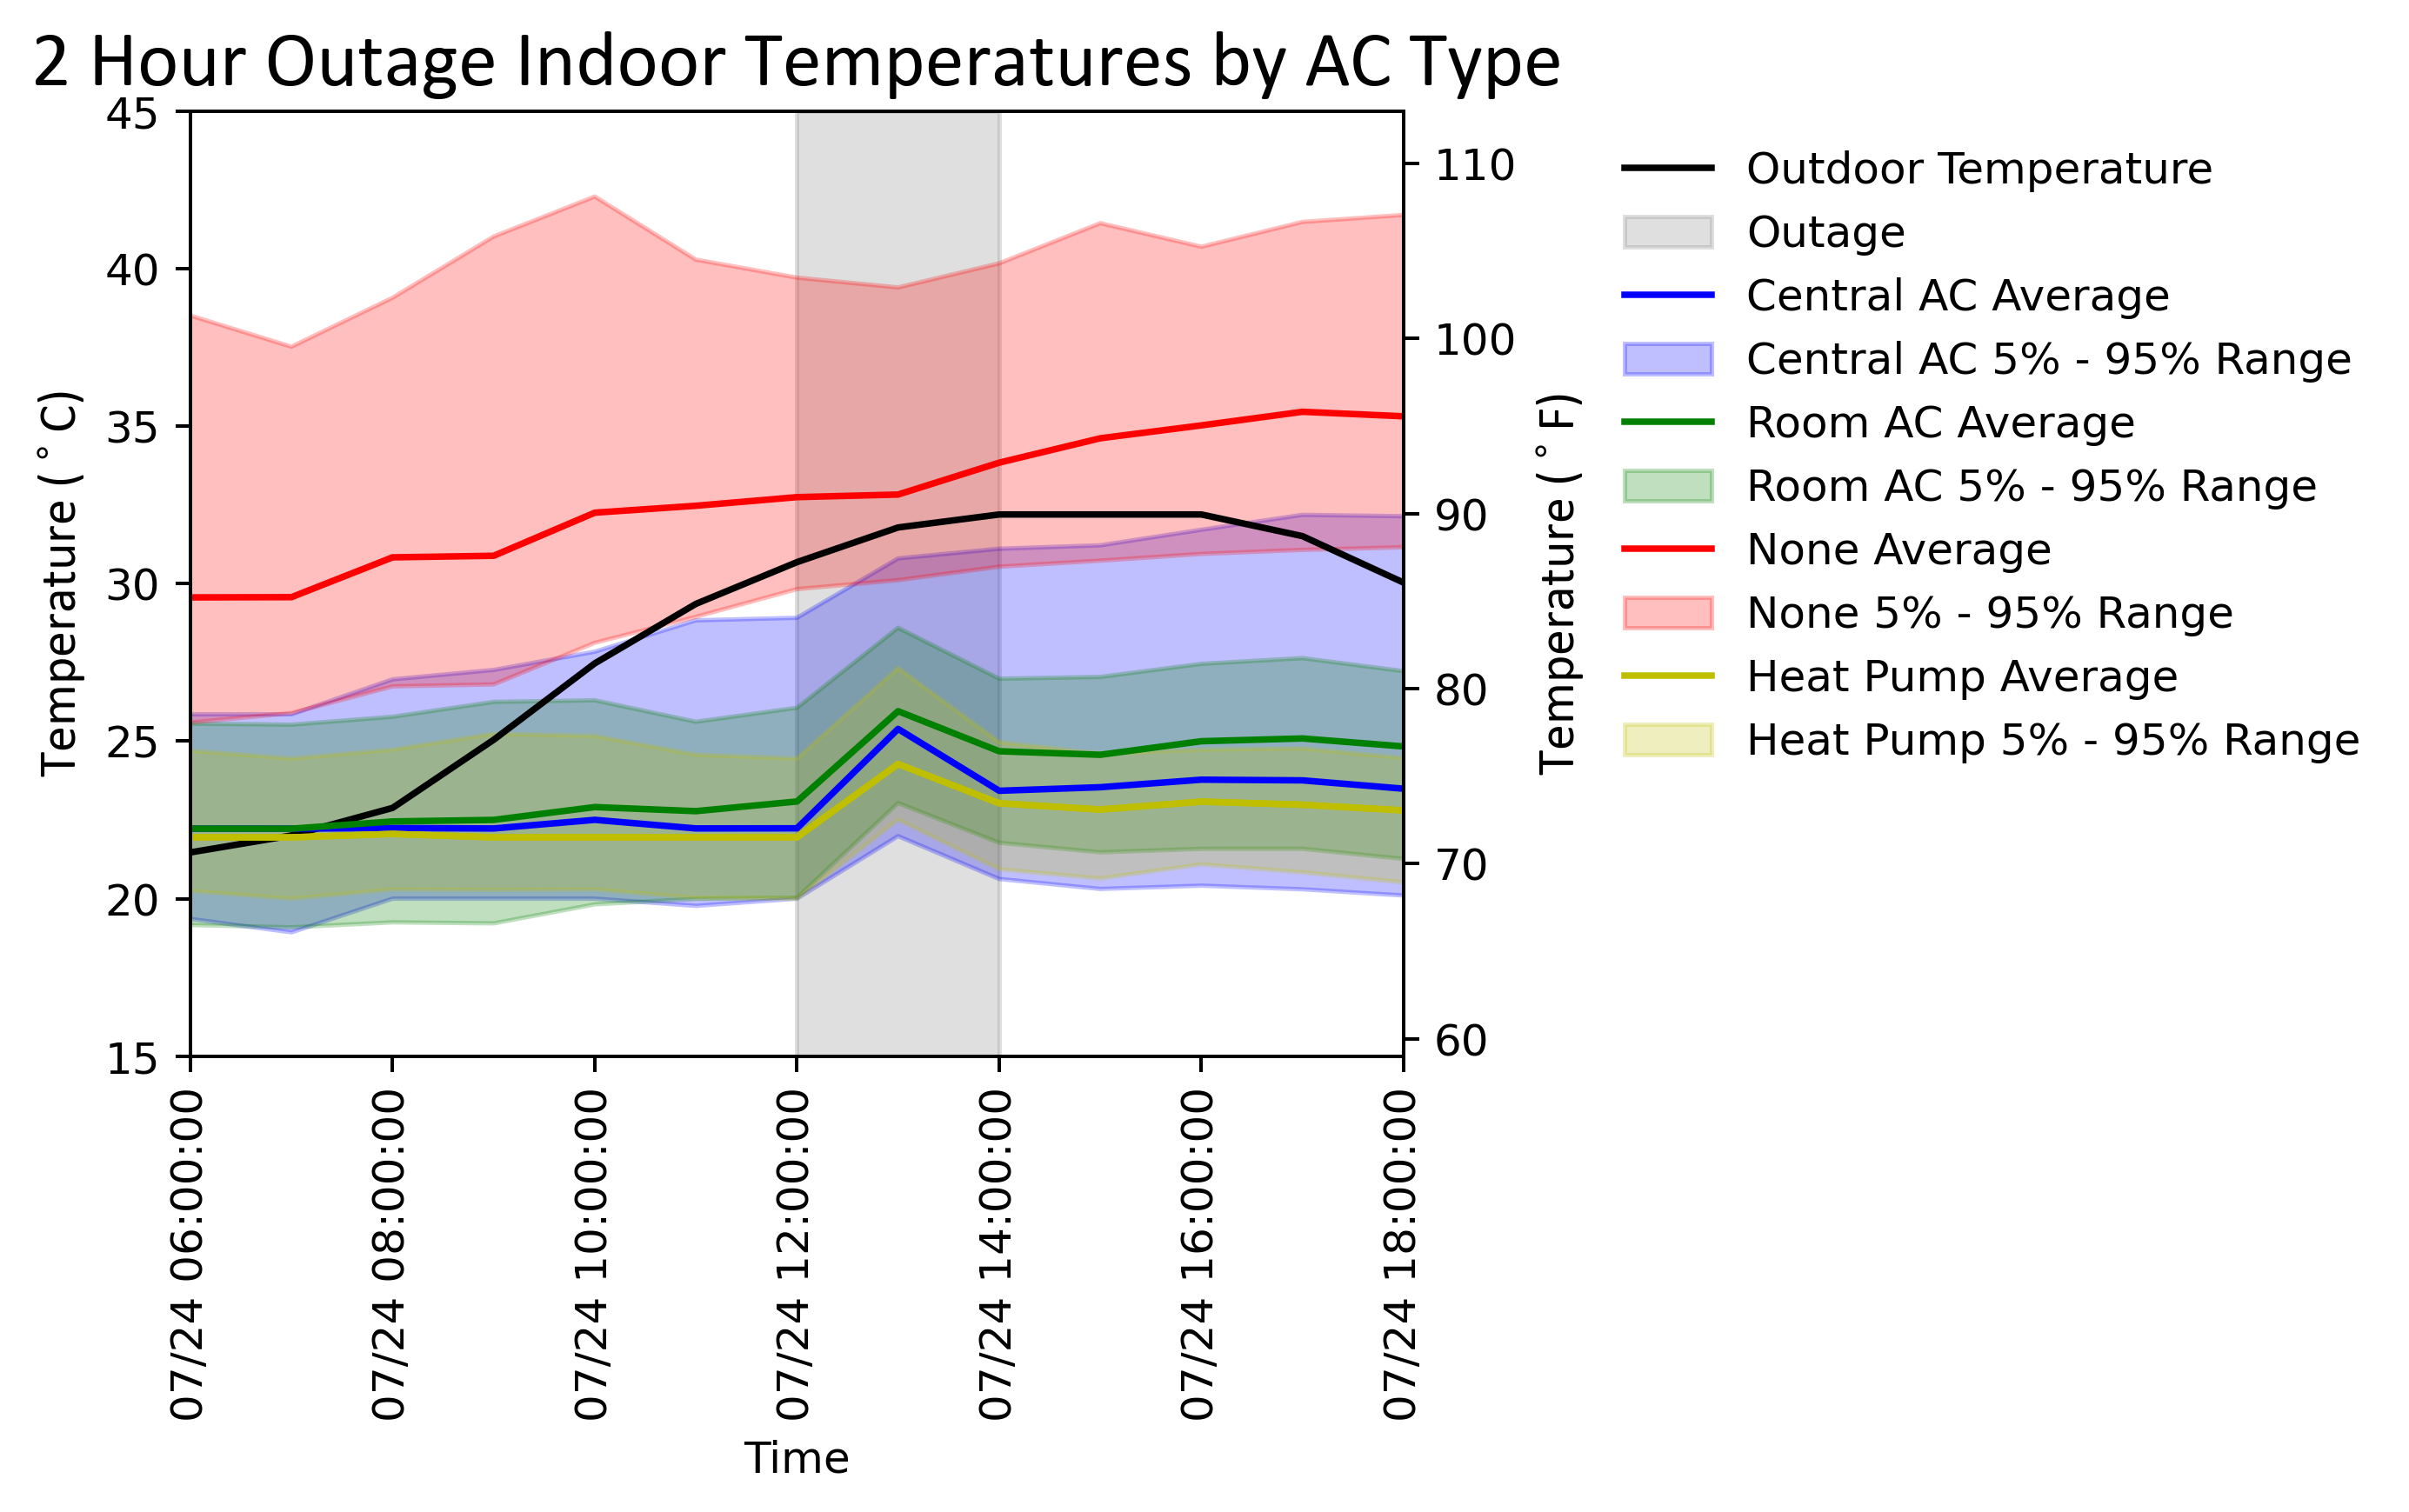

In [23]:
outage_summary = pd.DataFrame()
outage_summary['Date/Time'] = outage_temperature['Date/Time']
f6,ax6=plt.subplots(figsize=(5,4),dpi=360)
ax6.plot(outdoor['Date/Time'],outdoor['Outdoor Temp'],color='k',label='Outdoor Temperature')
ax6.fill_between([otg_start, otg_end],[y_max_t,y_max_t],alpha=.25,color='grey',label= "Outage")

for hvac_type in pd.unique(metadata['in.hvac_cooling_type']):
    cols = 'bldg' + metadata.loc[metadata['in.hvac_cooling_type']== hvac_type]['bldg_id'].astype(str)
    subset = pd.DataFrame(outage_temperature, columns=cols)
    outage_summary[hvac_type + ' - T - 5%'] = subset.quantile(q=.05,axis=1)
    outage_summary[hvac_type + ' - T - 50%'] =subset.quantile(q=.5,axis=1)
    outage_summary[hvac_type + ' - T - 95%'] = subset.quantile(q=.95,axis=1)
    if hvac_type == 'Central AC':
        hvac_color = 'b'
    elif hvac_type == 'Room AC':
        hvac_color = 'g'
    elif hvac_type == 'None':
        hvac_color = 'r'
    else:
        hvac_color = 'y'
    ax6.plot(outage_summary['Date/Time'],outage_summary[hvac_type + ' - T - 50%'],color = hvac_color,label= str(hvac_type + " Average"))
    ax6.fill_between(outage_summary['Date/Time'], outage_summary[hvac_type + ' - T - 5%'], outage_summary[hvac_type + ' - T - 95%'],alpha=.25,color=hvac_color,label= str(hvac_type + " 5% - 95% Range"))

x_ticks = pd.date_range(start =min(outage_summary['Date/Time']), end =max(outage_summary['Date/Time']),freq ='2H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M:%S')
ax6.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax6.set_xlim(window_start,window_end)
ax6.set_xlabel('Time')
ax6.set_ylabel('Temperature ($^\circ$C)',fontsize=labelsize,**labelfont)
# y_min = 2*math.floor(outage_summary['Central AC - T - 5%'].min()/2)
# y_max = 2*math.ceil(outage_summary['None - T - 95%'].max()/2)
ax6.set_ylim((y_min_t,y_max_t))
ax6b = ax6.twinx()
ax6b.plot(outage_summary['Date/Time'],32+(9/5)*outage_summary[hvac_type + ' - T - 50%'],color = hvac_color,label= str(hvac_type + " Average"))
ax6b.set_ylim((32+(9/5)*y_min_t,32+(9/5)*y_max_t))
ax6b.set_ylabel('Temperature ($^\circ$F)',fontsize=labelsize,**labelfont)
ax6.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left',frameon=False)
ax6.set_title(otg + ' Hour Outage Indoor Temperatures by AC Type',fontsize=titlesize,**labelfont)

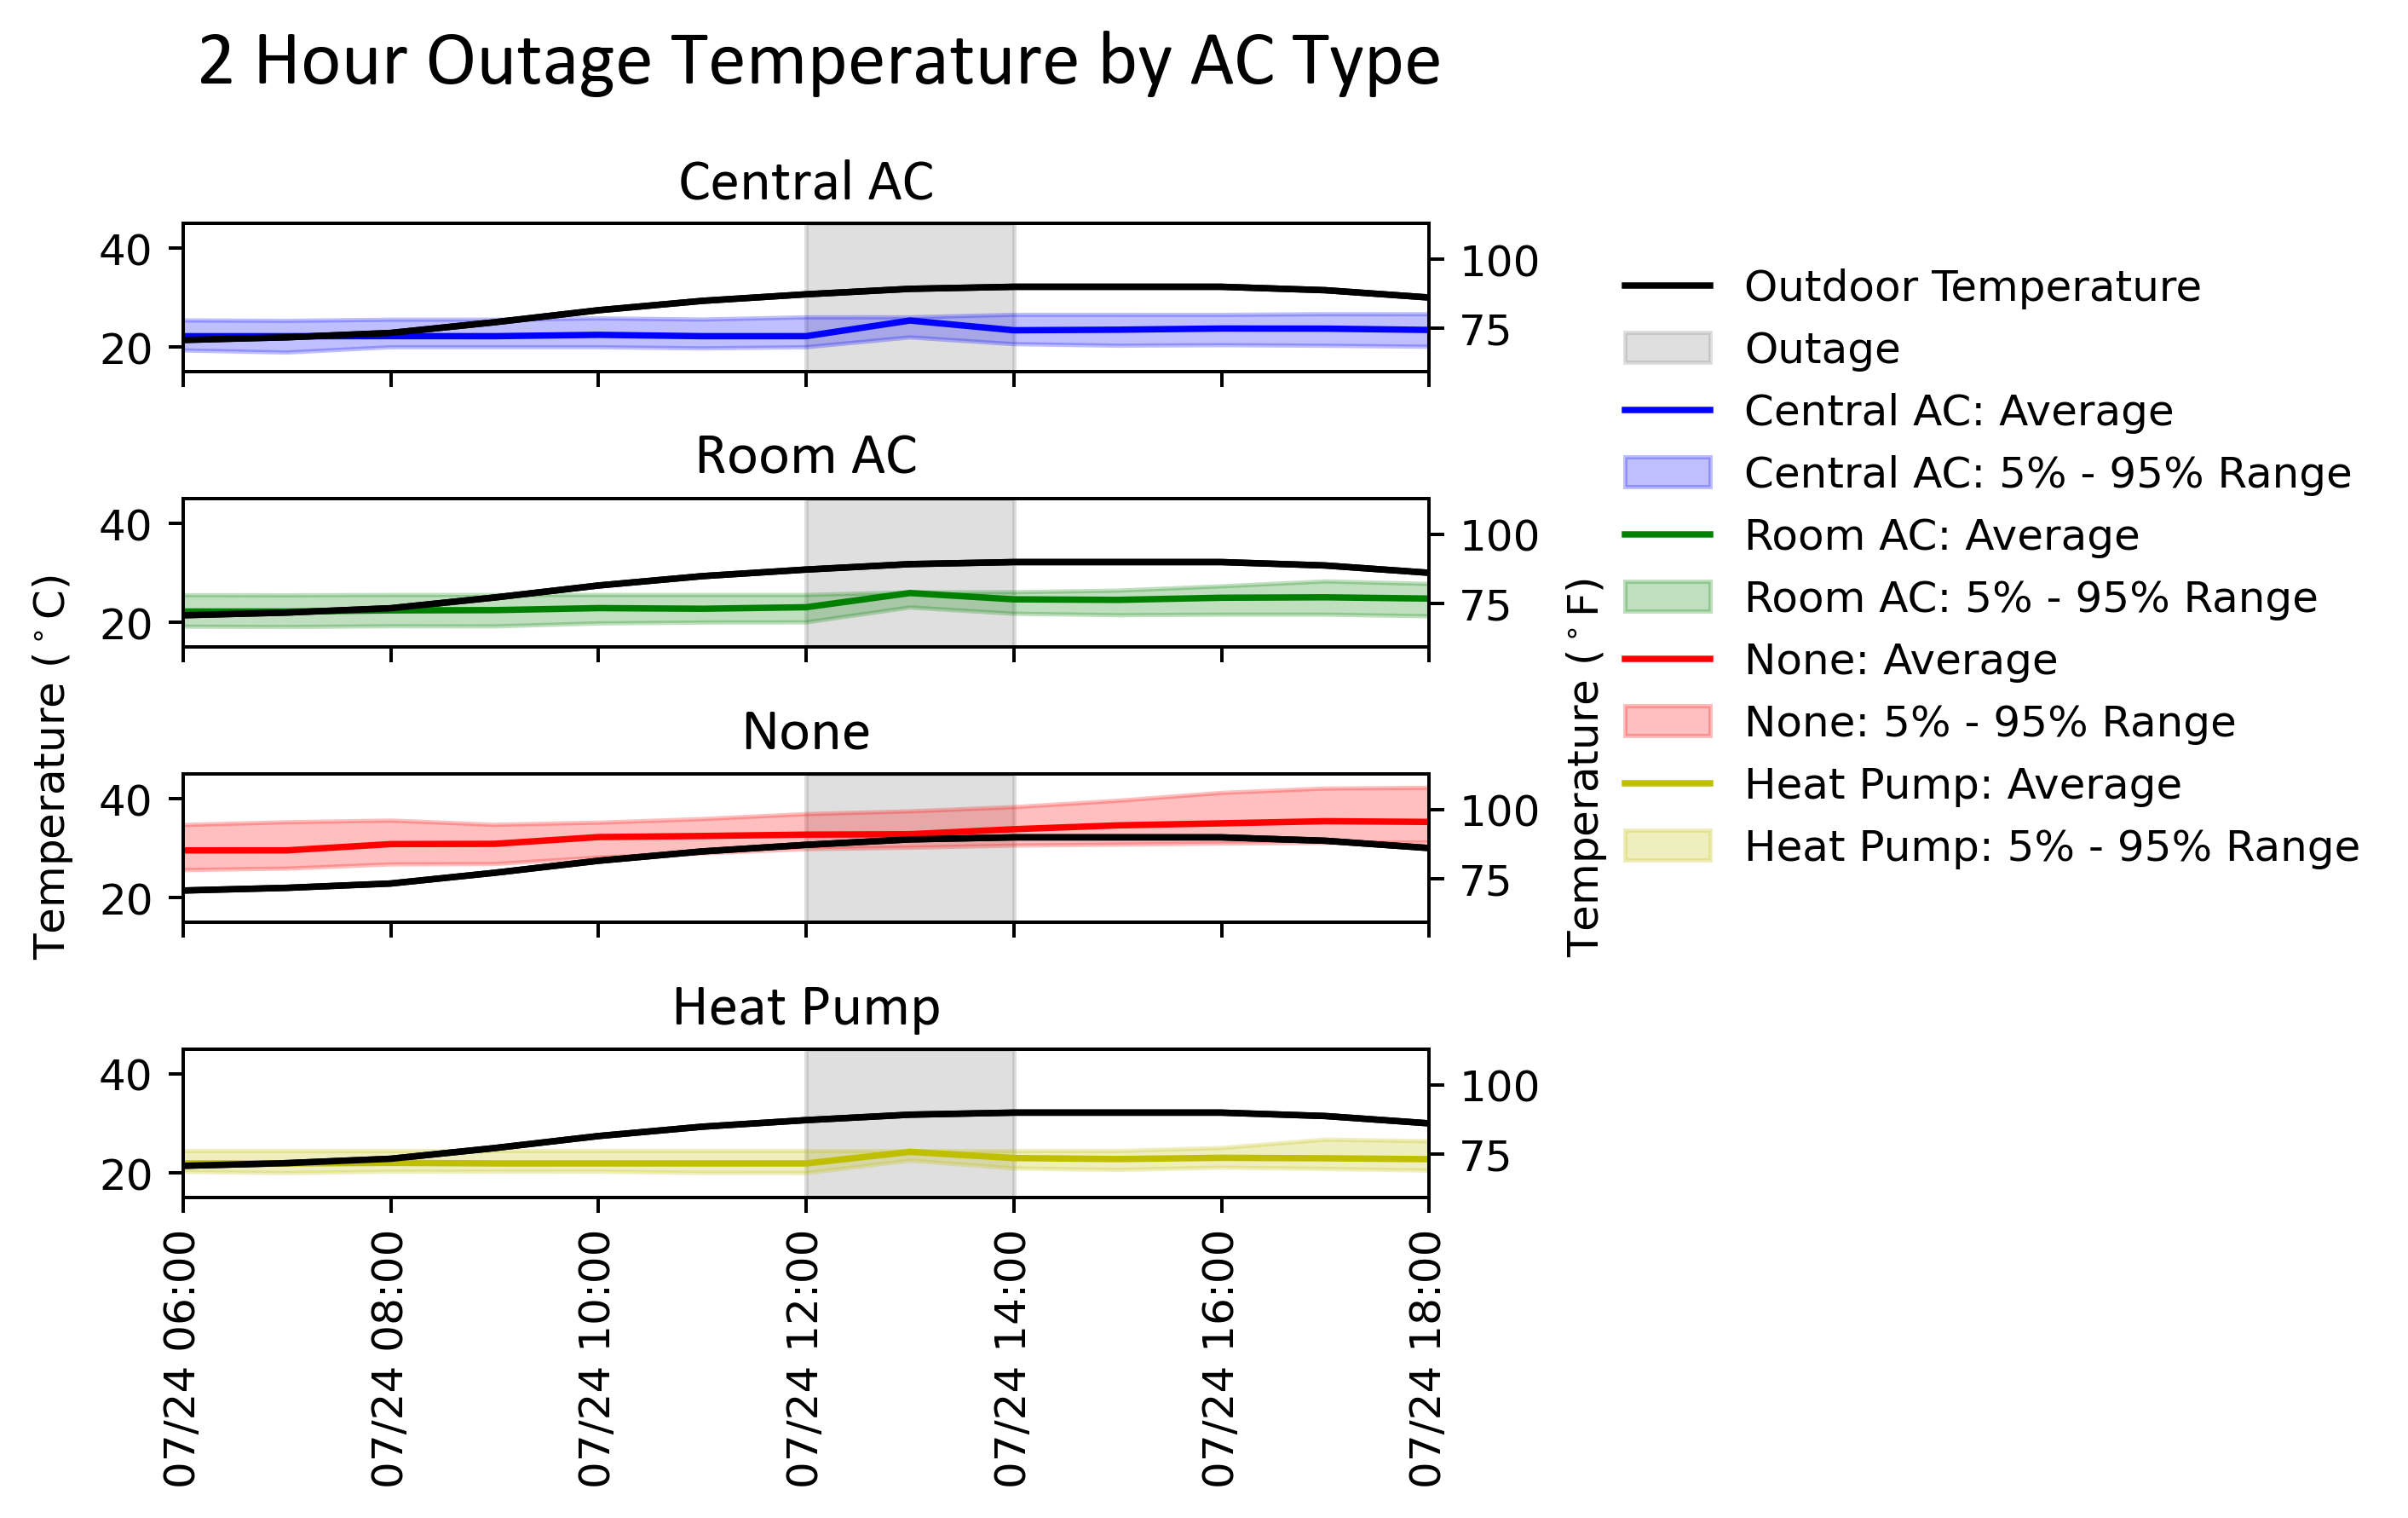

In [24]:
fig, axs = plt.subplots(4,figsize=(5,5),dpi=360)
# fig.suptitle('Vertically stacked subplots')
ax_id = 0 
for hvac_type in pd.unique(metadata['in.hvac_cooling_type']):
    if hvac_type == 'Central AC':
        hvac_color = 'b'
    elif hvac_type == 'Room AC':
        hvac_color = 'g'
    elif hvac_type == 'None':
        hvac_color = 'r'
    else:
        hvac_color = 'y'
    if ax_id == 0:
        axs[ax_id].plot(outdoor['Date/Time'],outdoor['Outdoor Temp'],color='k',label='Outdoor Temperature')
        axs[ax_id].fill_between([otg_start, otg_end],[45,45],alpha=.25,color='grey',label= "Outage")
    else:
        axs[ax_id].plot(outdoor['Date/Time'],outdoor['Outdoor Temp'],color='k')
        axs[ax_id].fill_between([otg_start, otg_end],[45,45],alpha=.25,color='grey')
    axs[ax_id].plot(outage_summary['Date/Time'],outage_summary[hvac_type + ' - T - 50%'],color = hvac_color,label= str(hvac_type + ": Average"))
    axs[ax_id].fill_between(outage_summary['Date/Time'], outage_summary[hvac_type + ' - T - 5%'], baseline_summary[hvac_type + ' - T - 95%'],alpha=.25,color=hvac_color,label= str(hvac_type + ": 5% - 95% Range"))
    axs[ax_id].set_ylim([15,45])
    axs[ax_id].set_xlim(window_start,window_end)
    axs[ax_id].set_title(hvac_type,fontsize=subtitlesize,**labelfont)
    axb=axs[ax_id].twinx()
    axb.set_ylim((32+(9/5)*y_min_t,32+(9/5)*y_max_t))
    axb.plot(outdoor['Date/Time'],outdoor['Outdoor Temp']*(9/5) + 32,color='k')
    

    ax_id = ax_id + 1
    
for ax in axs:
    ax.label_outer()
    
lines = []
labels = []
  
for ax in fig.axes:
    Line, Label = ax.get_legend_handles_labels()
    lines.extend(Line)
    labels.extend(Label)
x_ticks = pd.date_range(start = window_start, end =window_end,freq ='2H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M')
axs[ax_id - 1].set_xticks(x_ticks,x_tick_labels,rotation='vertical')
fig.legend(lines, labels, bbox_to_anchor=(1, .85), loc='upper left',frameon=False)
fig.text(0, 0.5, 'Temperature ($^\circ$C)', ha='center', va='center', rotation='vertical')
fig.text(1, 0.5, 'Temperature ($^\circ$F)', ha='center', va='center', rotation='vertical')

fig.suptitle(otg + ' Hour Outage Temperature by AC Type',fontsize=titlesize,**labelfont)
fig.tight_layout()
fig.savefig(data_file_path + "/figures/"+ otg + "HrOutageTempByAcTypeSplit.svg",bbox_inches = "tight")


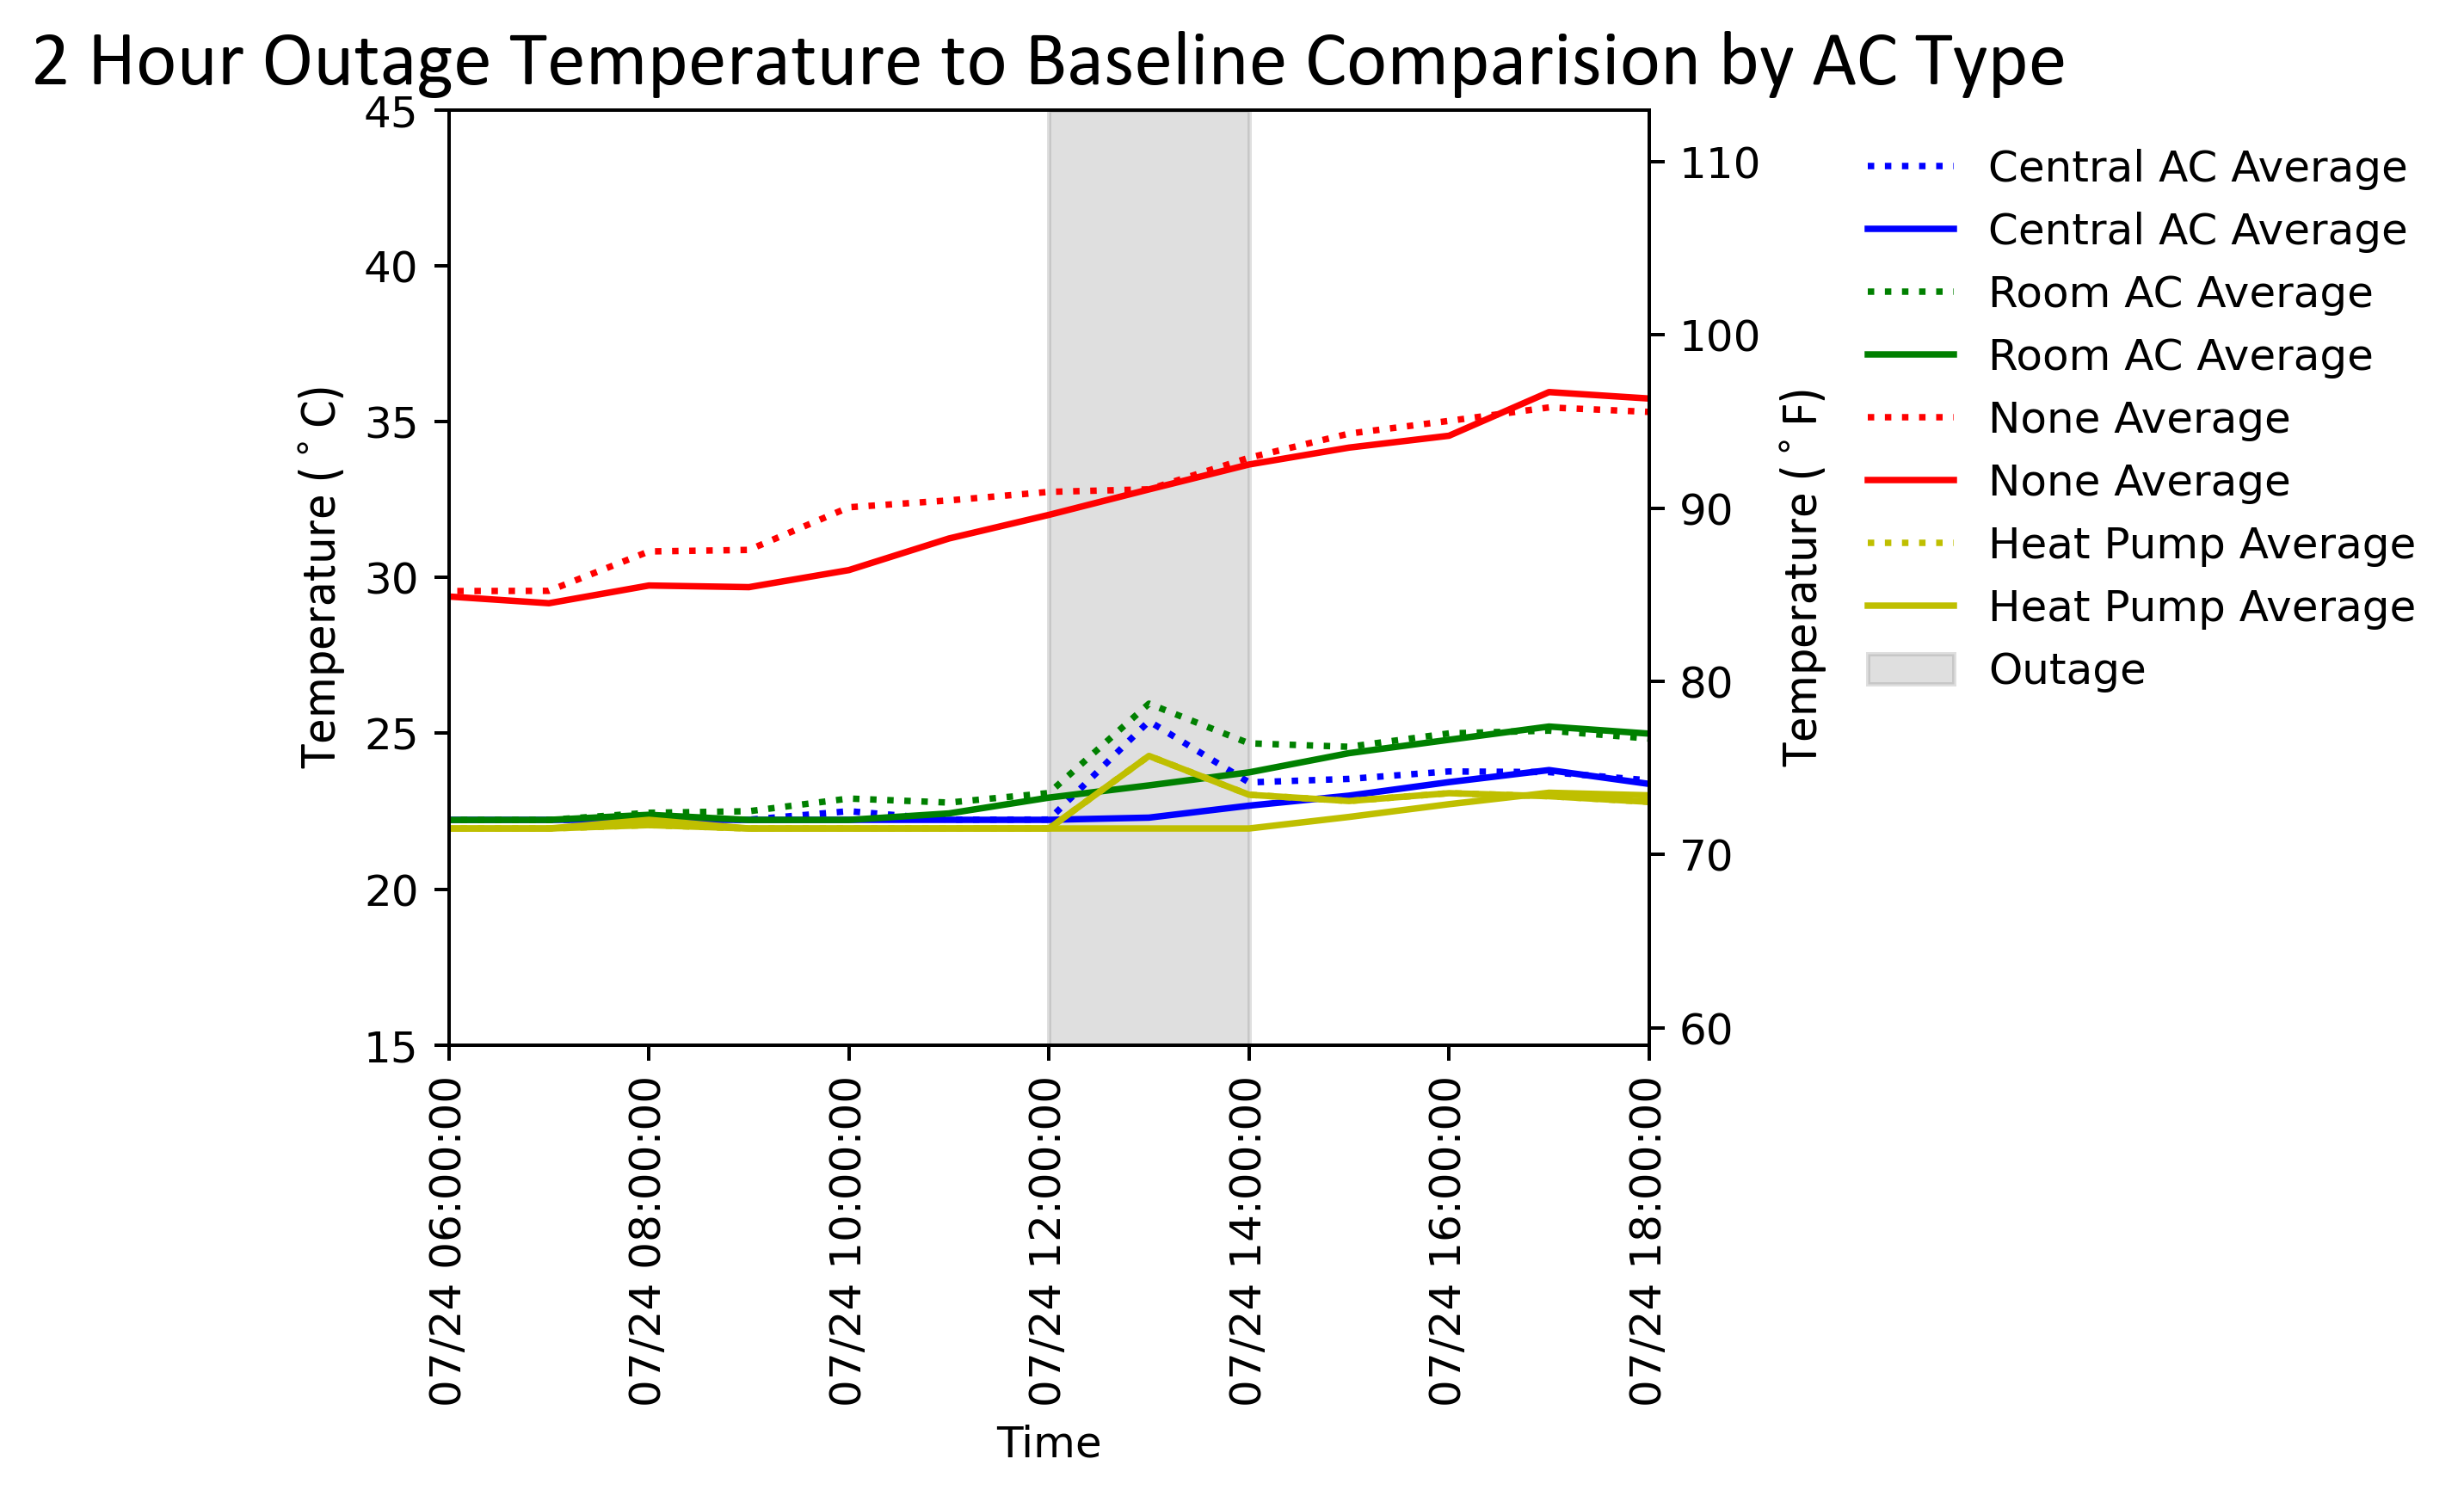

In [25]:
f7,ax7=plt.subplots(figsize=(5,4),dpi=360)
for hvac_type in pd.unique(metadata['in.hvac_cooling_type']):
    if hvac_type == 'Central AC':
        hvac_color = 'b'
    elif hvac_type == 'Room AC':
        hvac_color = 'g'
    elif hvac_type == 'None':
        hvac_color = 'r'
    else:
        hvac_color = 'y'
    ax7.plot(outage_summary['Date/Time'],outage_summary[hvac_type + ' - T - 50%'],color = hvac_color,linestyle='dotted',label= str(hvac_type + " Average"))
    #plt.fill_between(outage_summary['Date/Time'], outage_summary[hvac_type + ' - T - 5%'], outage_summary[hvac_type + ' - T - 95%'],alpha=.25,color=hvac_color,label= str(hvac_type + " 5% - 95% Range"))
    ax7.plot(baseline_summary['Date/Time'],baseline_summary[hvac_type + ' - T - 50%'],color = hvac_color,label= str(hvac_type + " Average"))

x_ticks = pd.date_range(start =min(outage_summary['Date/Time']), end =max(outage_summary['Date/Time']),freq ='2H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M:%S')
ax7.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax7.set_xlim(window_start,window_end)
# y_min = 2*math.floor(outage_summary['Central AC - T - 5%'].min()/2)
# y_max = 2*math.ceil(outage_summary['None - T - 95%'].max()/2)
ax7.fill_between([otg_start, otg_end],[y_max_t,y_max_t],alpha=.25,color='grey',label= "Outage")
ax7.set_ylim((y_min_t,y_max_t))
ax7.set_xlabel('Time')
ax7.set_ylabel('Temperature ($^\circ$C)',fontsize=labelsize,**labelfont)
ax7b = ax7.twinx()
ax7b.plot(outage_summary['Date/Time'],32+(9/5)*outage_summary[hvac_type + ' - T - 50%'],color = hvac_color,label= str(hvac_type + " Average"))
ax7b.set_ylim((32+(9/5)*y_min_t,32+(9/5)*y_max_t))
ax7b.set_ylabel('Temperature ($^\circ$F)',fontsize=labelsize,**labelfont)
ax7.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left',frameon=False)
ax7.set_title(otg + " Hour Outage Temperature to Baseline Comparision by AC Type",fontsize=titlesize,**labelfont)
f7.savefig(data_file_path + "/figures/"+ otg + "HrComparisonByAcTypeSplitZoom.svg",bbox_inches = "tight")


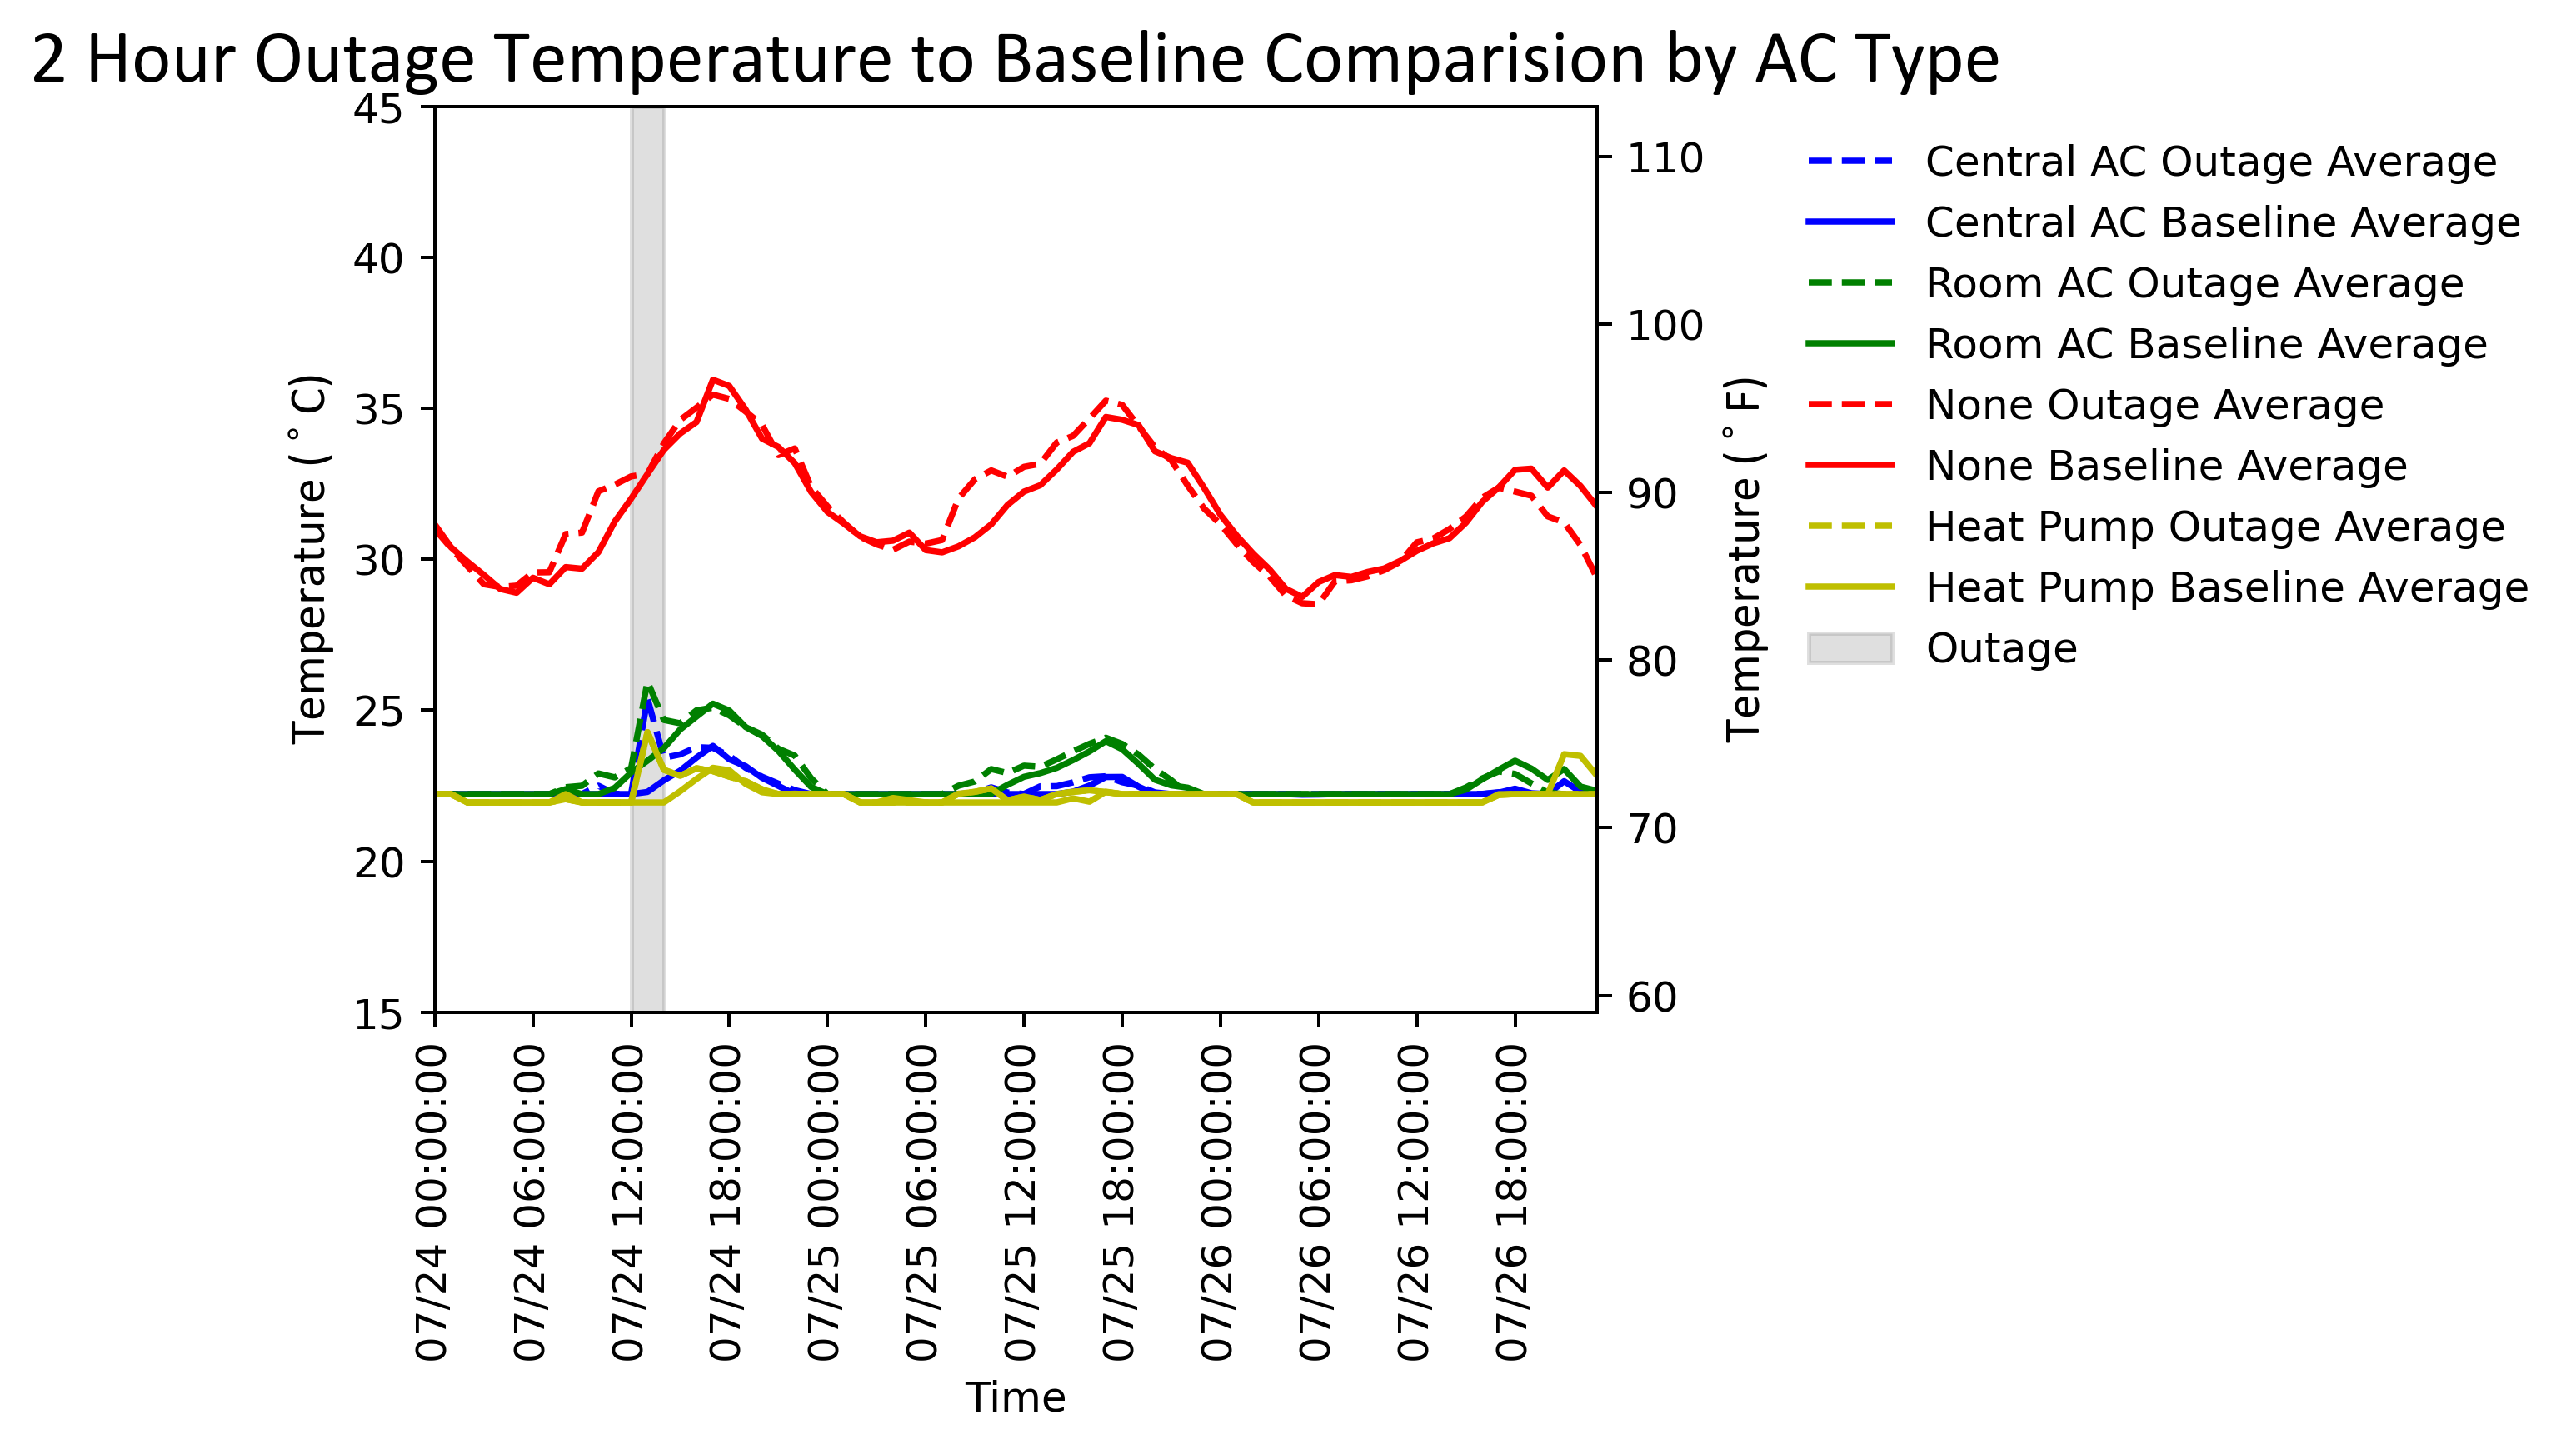

In [26]:
f8,ax8=plt.subplots(figsize=(5,4),dpi=360)
for hvac_type in pd.unique(metadata['in.hvac_cooling_type']):
    if hvac_type == 'Central AC':
        hvac_color = 'b'
    elif hvac_type == 'Room AC':
        hvac_color = 'g'
    elif hvac_type == 'None':
        hvac_color = 'r'
    else:
        hvac_color = 'y'
    ax8.plot(outage_summary['Date/Time'],outage_summary[hvac_type + ' - T - 50%'],color = hvac_color,linestyle='dashed',label= str(hvac_type + " Outage Average"))
    #plt.fill_between(outage_summary['Date/Time'], outage_summary[hvac_type + ' - T - 5%'], outage_summary[hvac_type + ' - T - 95%'],alpha=.25,color=hvac_color,label= str(hvac_type + " 5% - 95% Range"))
    ax8.plot(baseline_summary['Date/Time'],baseline_summary[hvac_type + ' - T - 50%'],color = hvac_color,label= str(hvac_type + " Baseline Average"))

x_ticks = pd.date_range(start =min(outage_summary['Date/Time']), end =max(outage_summary['Date/Time']),freq ='6H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M:%S')
ax8.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax8.set_xlim(min(outage_summary['Date/Time']),max(outage_summary['Date/Time']))
# y_min = 2*math.floor(outage_summary['Central AC - T - 50%'].min()/2)-2
# y_max = 2*math.ceil(baseline_summary['None - T - 50%'].max()/2)
ax8.fill_between([otg_start, otg_end],[y_max_t,y_max_t],alpha=.25,color='grey',label= "Outage")
ax8.set_ylim((y_min_t,y_max_t))
ax8.set_xlabel('Time')
ax8.set_ylabel('Temperature ($^\circ$C)',fontsize=labelsize,**labelfont)
ax8b = ax8.twinx()
ax8b.plot(outage_summary['Date/Time'],32+(9/5)*outage_summary[hvac_type + ' - T - 50%'],color = hvac_color,label= str(hvac_type + " Average"))
ax8b.set_ylim((32+(9/5)*y_min_t,32+(9/5)*y_max_t))
ax8b.set_ylabel('Temperature ($^\circ$F)',fontsize=labelsize,**labelfont)
ax8.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left',frameon=False)
ax8.set_title(otg + ' Hour Outage Temperature to Baseline Comparision by AC Type',fontsize=titlesize,**labelfont)
f8.savefig(data_file_path + "/figures/"+ otg + "HrComparisonByAcTypeSplit.svg",bbox_inches = "tight")


# ELECTRICITY

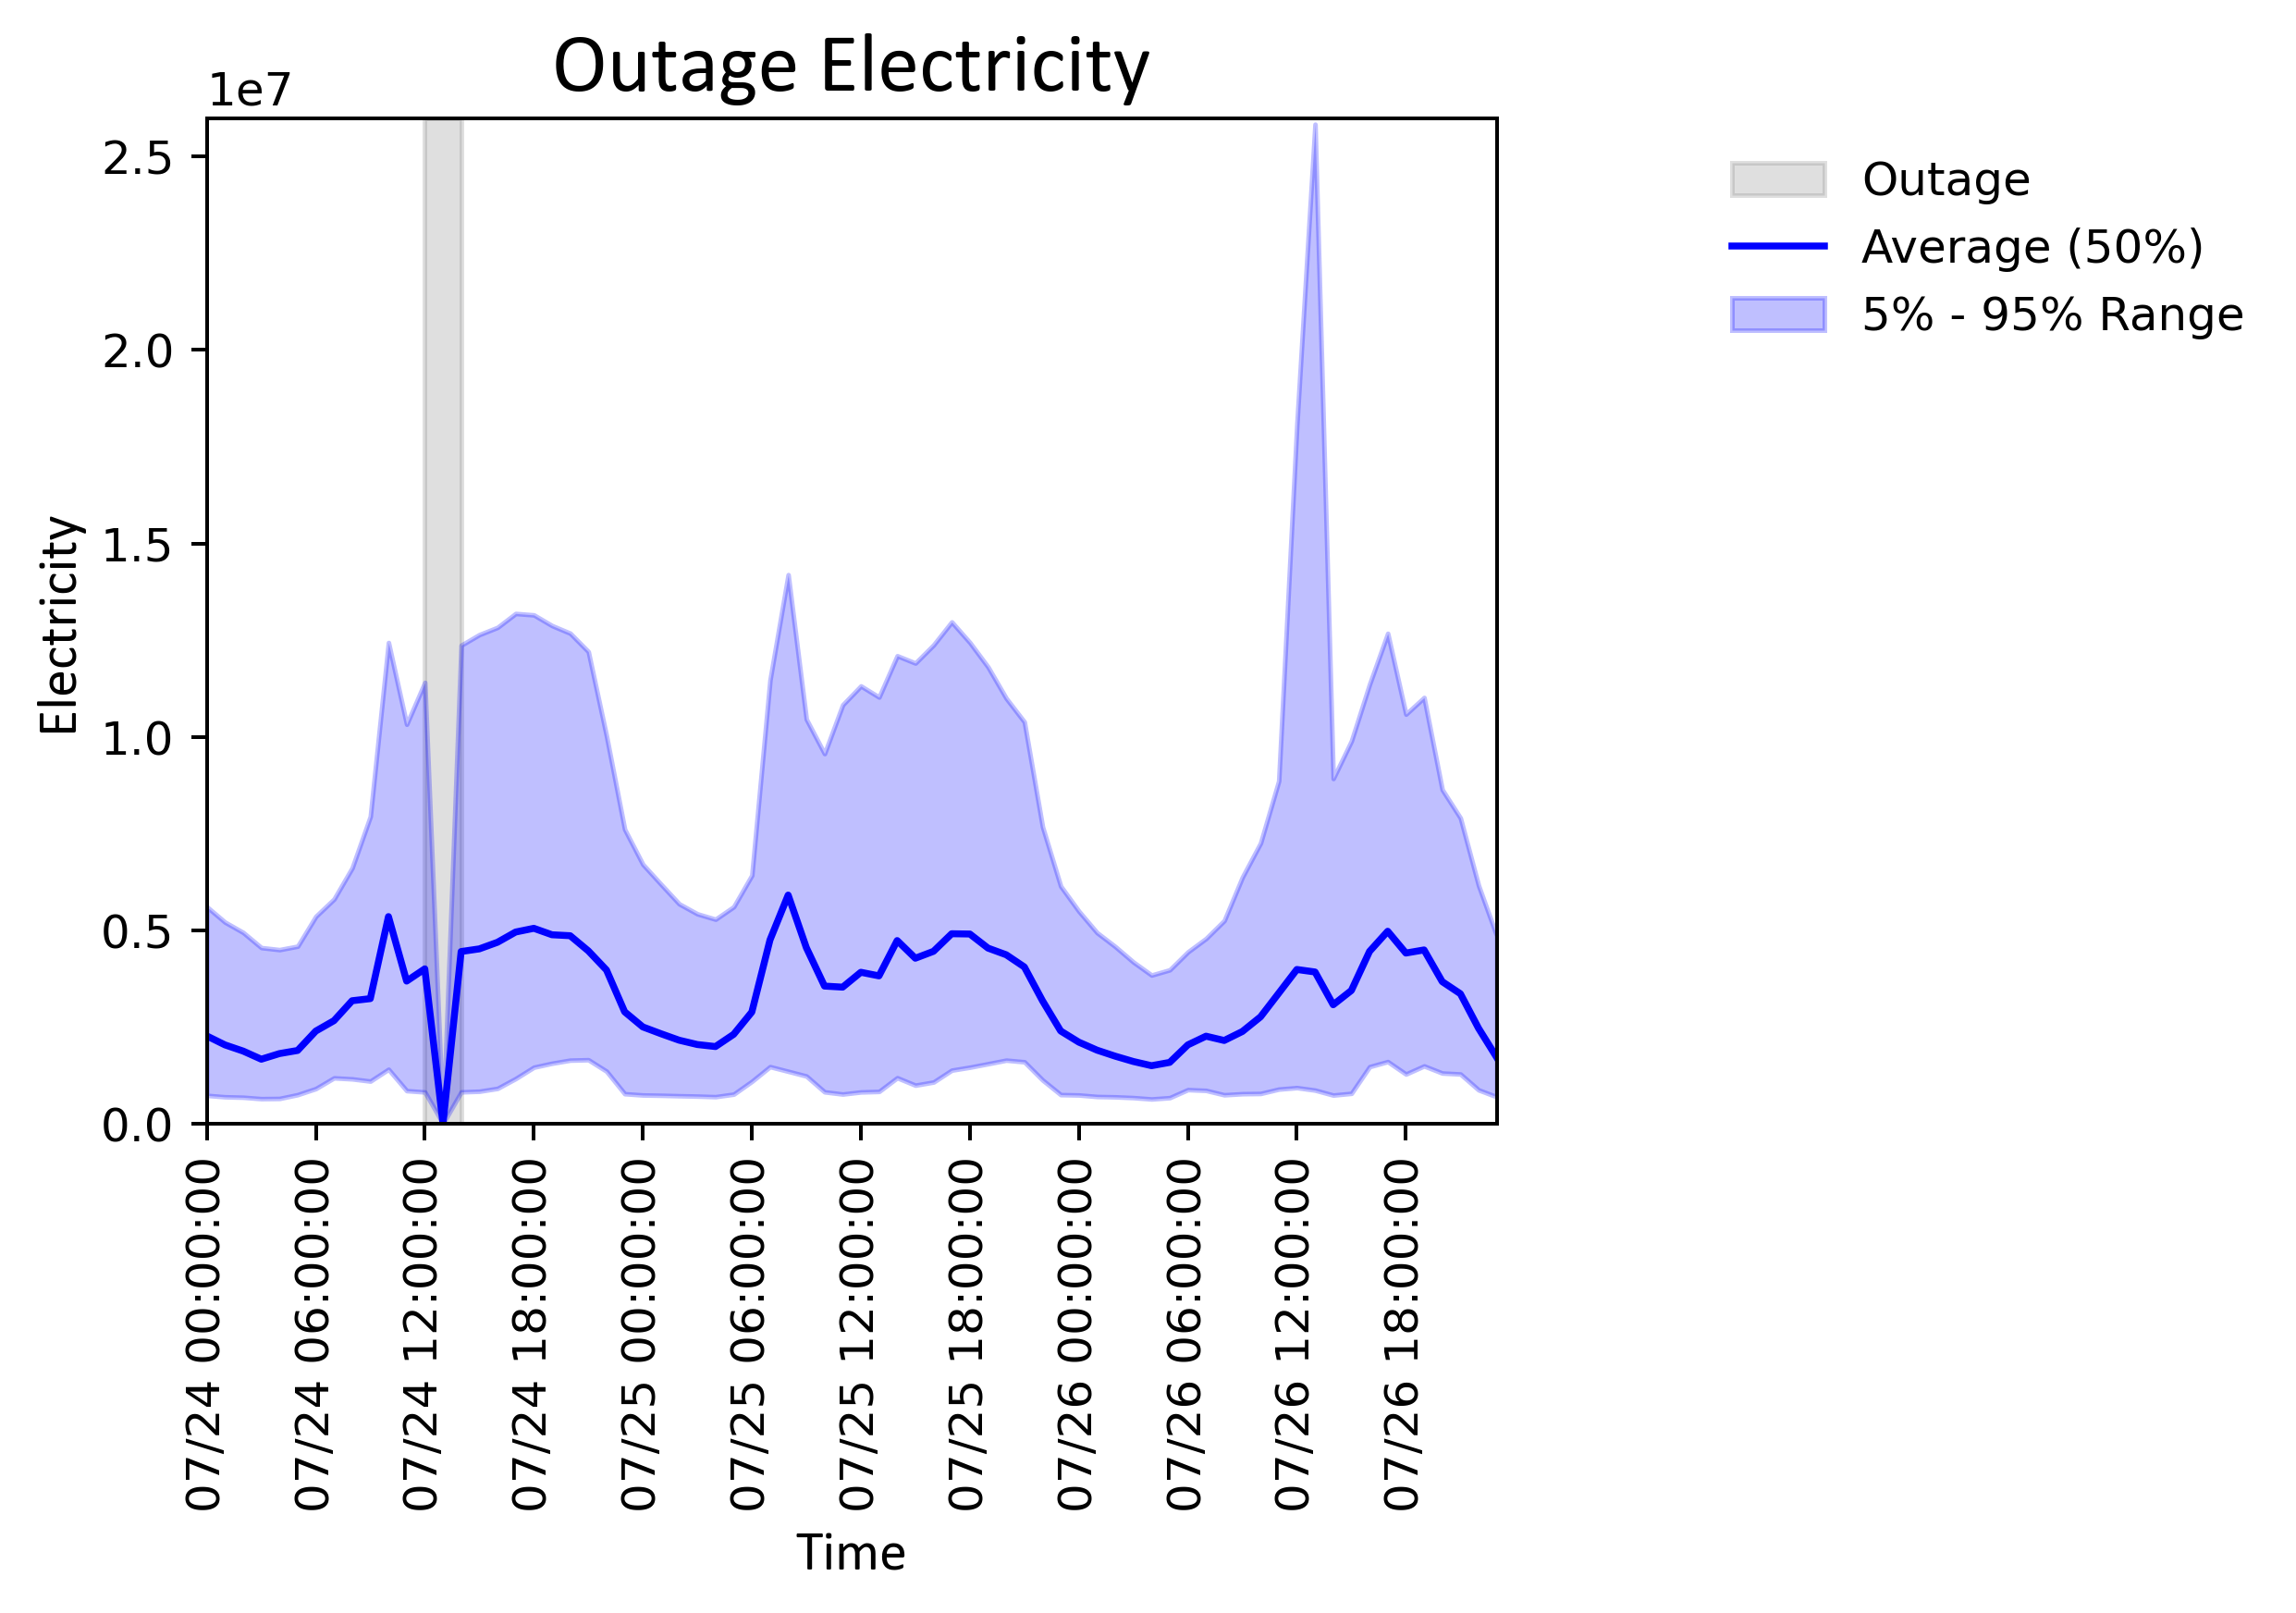

In [27]:
scale = 500000
f9, ax9 = plt.subplots(figsize=(5,4),dpi=360)
outage_summary['E - 5%'] = outage_electricity.quantile(q=.05,axis=1)
outage_summary['E - 50%'] = outage_electricity.quantile(q=.5,axis=1)
outage_summary['E - 95%'] = outage_electricity.quantile(q=.95,axis=1)
y_min_e = 0
y_max_e = scale*math.ceil(outage_summary['E - 95%'].max()/scale)

ax9.fill_between([otg_start, otg_end],[y_max_e,y_max_e],alpha=.25,color='grey',label= "Outage")
# ax9.plot(outage_summary['Date/Time'],outage_summary['E - 5%'],color='g',label="5th percentile")
ax9.plot(outage_summary['Date/Time'],outage_summary['E - 50%'],color = 'b',label="Average (50%)")
# ax9.plot(outage_summary['Date/Time'],outage_summary['E - 95%'],color='r',label="95th percentile")
ax9.fill_between(outage_summary['Date/Time'], outage_summary['E - 5%'], outage_summary['E - 95%'],alpha=.25,color='b',label="5% - 95% Range")
x_ticks = pd.date_range(start =min(baseline_temperature['Date/Time']), end =max(baseline_temperature['Date/Time']),freq ='6H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M:%S')
ax9.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax9.set_xlim(min(outage_summary['Date/Time']),max(outage_summary['Date/Time']))
ax9.set_ylim([y_min_e,y_max_e])

ax9.set_xlabel('Time',fontsize=labelsize,**labelfont)
ax9.set_ylabel('Electricity',fontsize=labelsize,**labelfont)
ax9.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left',frameon=False)
ax9.set_title('Outage Electricity',fontsize=titlesize,**labelfont)
f9.savefig(data_file_path + "/figures/"+ otg + "HrElectricity.svg",bbox_inches = "tight")


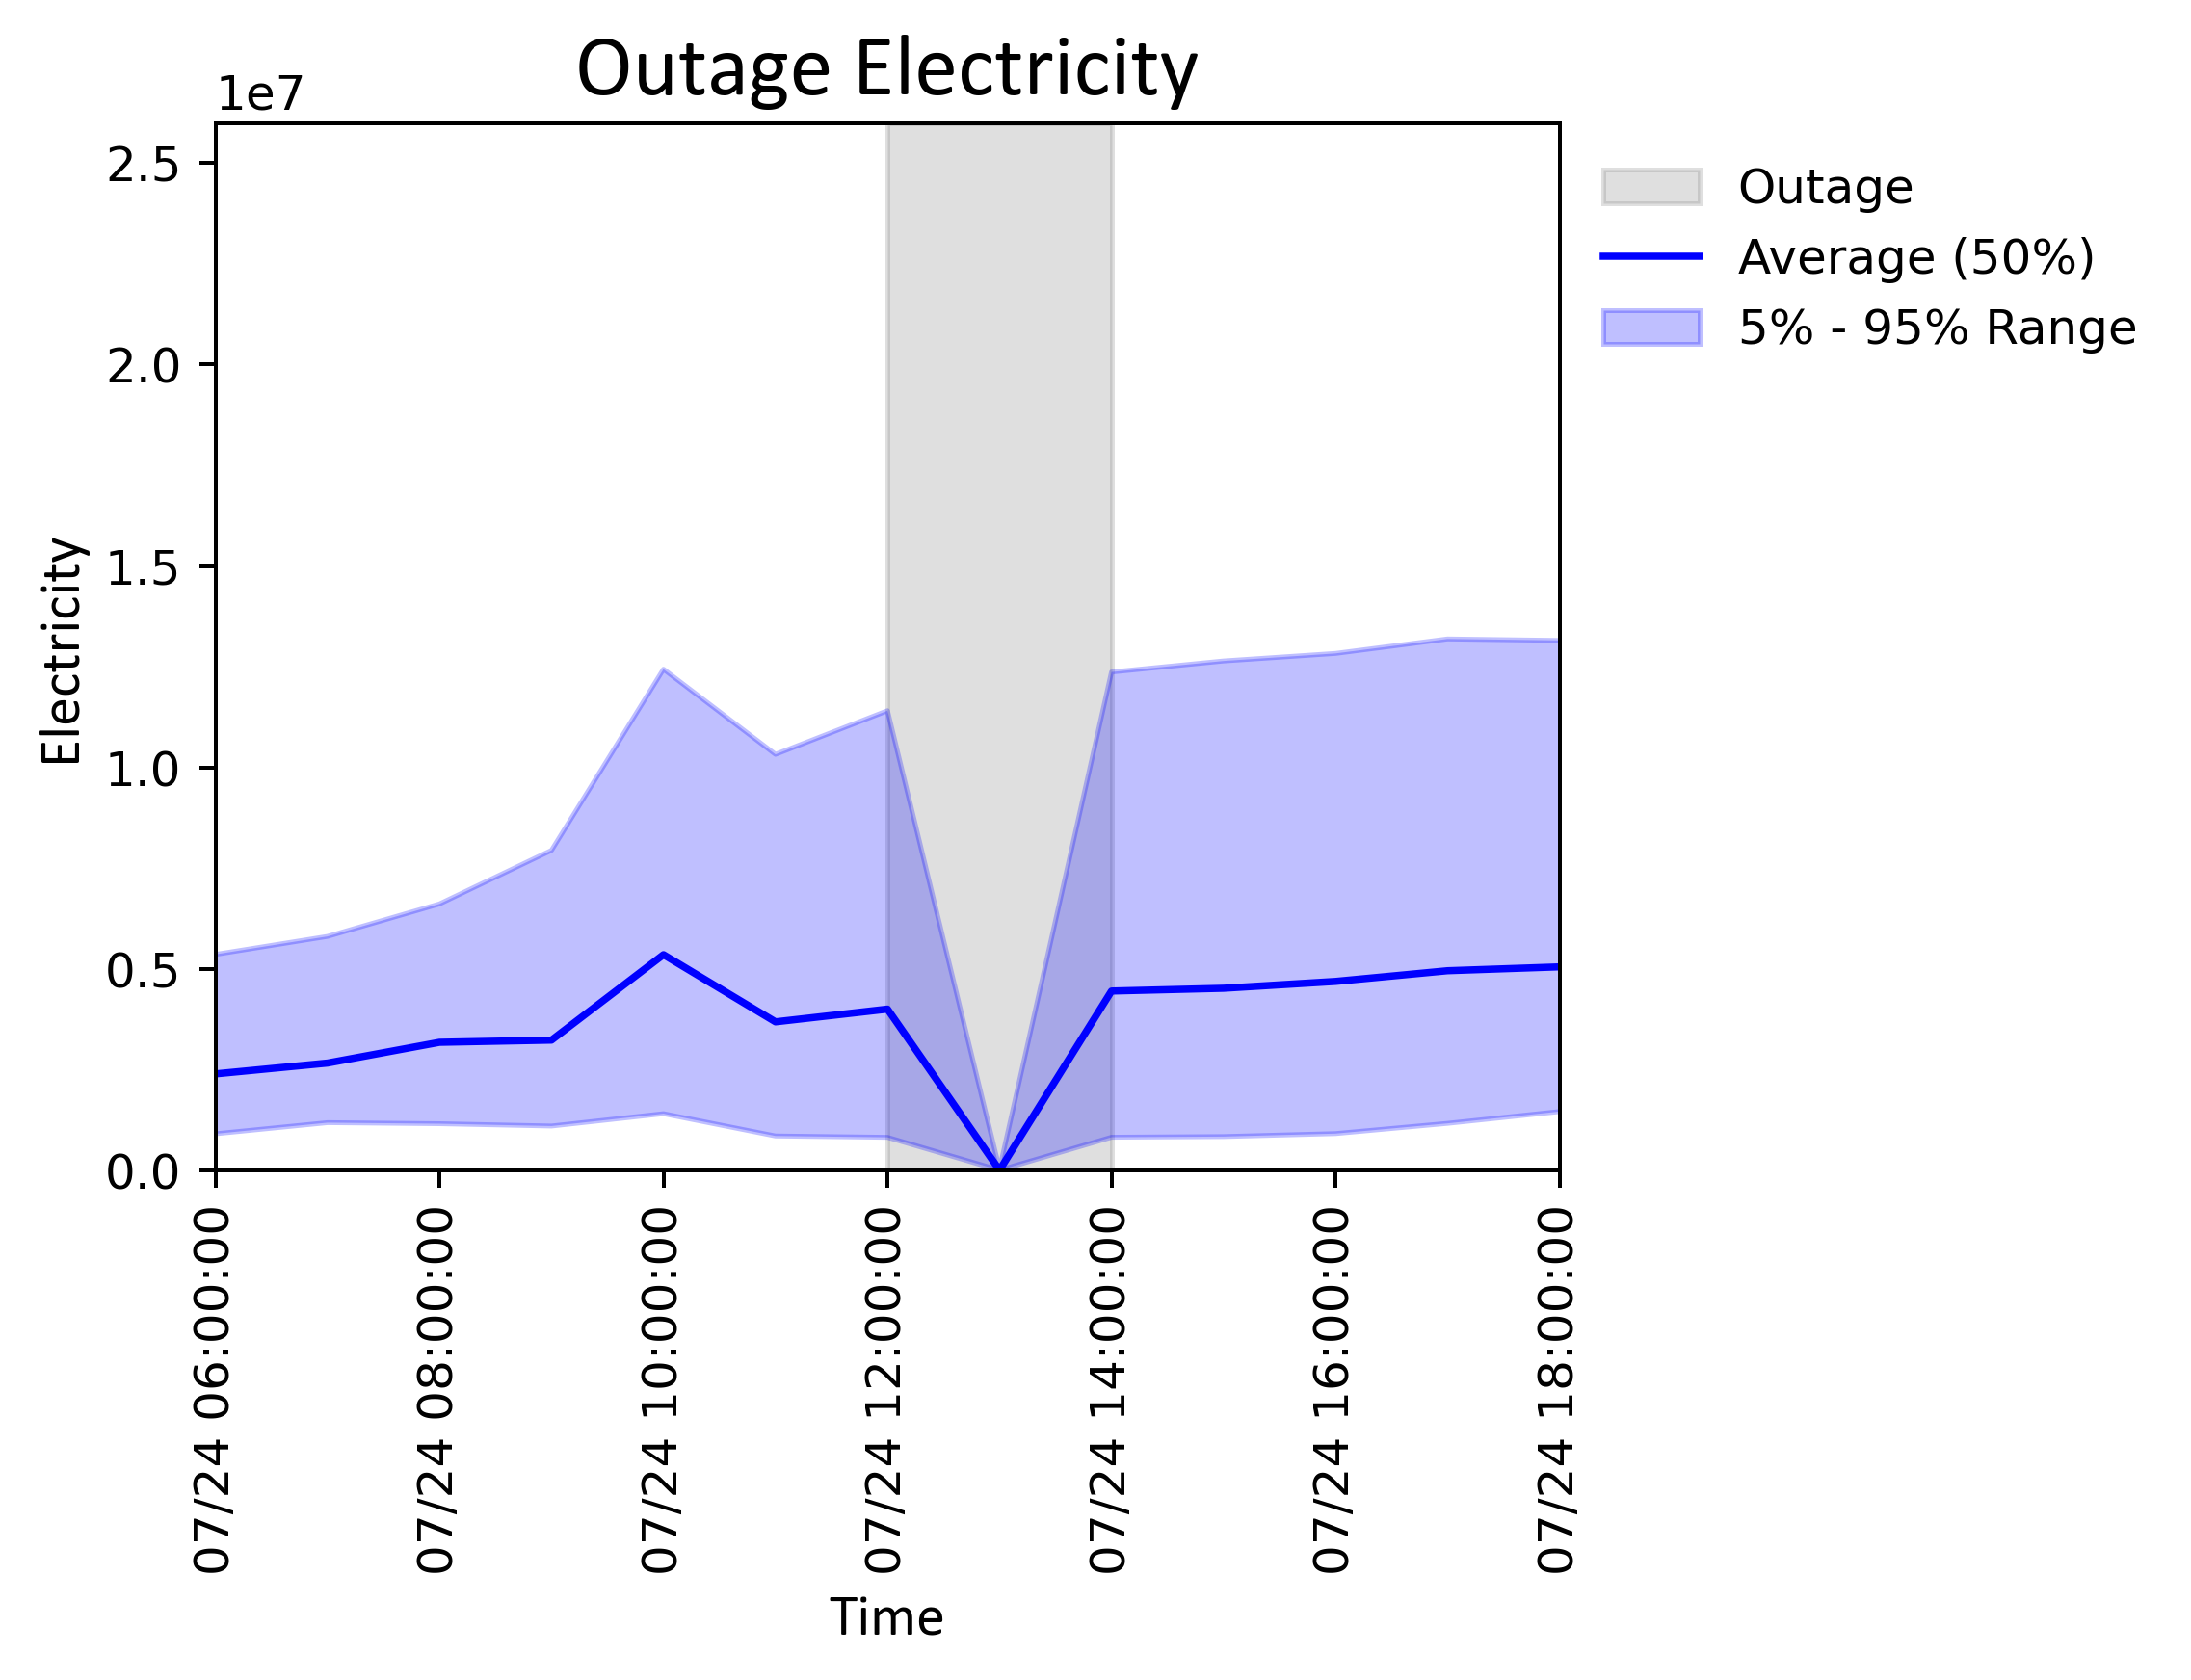

In [28]:
f9, ax9 = plt.subplots(figsize=(5,4),dpi=360)
ax9.fill_between([otg_start, otg_end],[y_max_e,y_max_e],alpha=.25,color='grey',label= "Outage")
# ax9.plot(outage_summary['Date/Time'],outage_summary['E - 5%'],color='g',label="5th percentile")
ax9.plot(outage_summary['Date/Time'],outage_summary['E - 50%'],color = 'b',label="Average (50%)")
# ax9.plot(outage_summary['Date/Time'],outage_summary['E - 95%'],color='r',label="95th percentile")
ax9.fill_between(outage_summary['Date/Time'], outage_summary['E - 5%'], outage_summary['E - 95%'],alpha=.25,color='b',label="5% - 95% Range")
x_ticks = pd.date_range(start =min(baseline_temperature['Date/Time']), end =max(baseline_temperature['Date/Time']),freq ='2H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M:%S')
ax9.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax9.set_xlim(window_start,window_end)
ax9.set_ylim([y_min_e,y_max_e])
ax9.set_xlabel('Time',fontsize=labelsize,**labelfont)
ax9.set_ylabel('Electricity',fontsize=labelsize,**labelfont)
ax9.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left',frameon=False)
ax9.set_title('Outage Electricity',fontsize=titlesize,**labelfont)
f9.savefig(data_file_path + "/figures/"+ otg + "HrElectricityZoom.svg",bbox_inches = "tight")


Text(0.5, 1.0, '2 Hr Outage Electricity by AC Type')

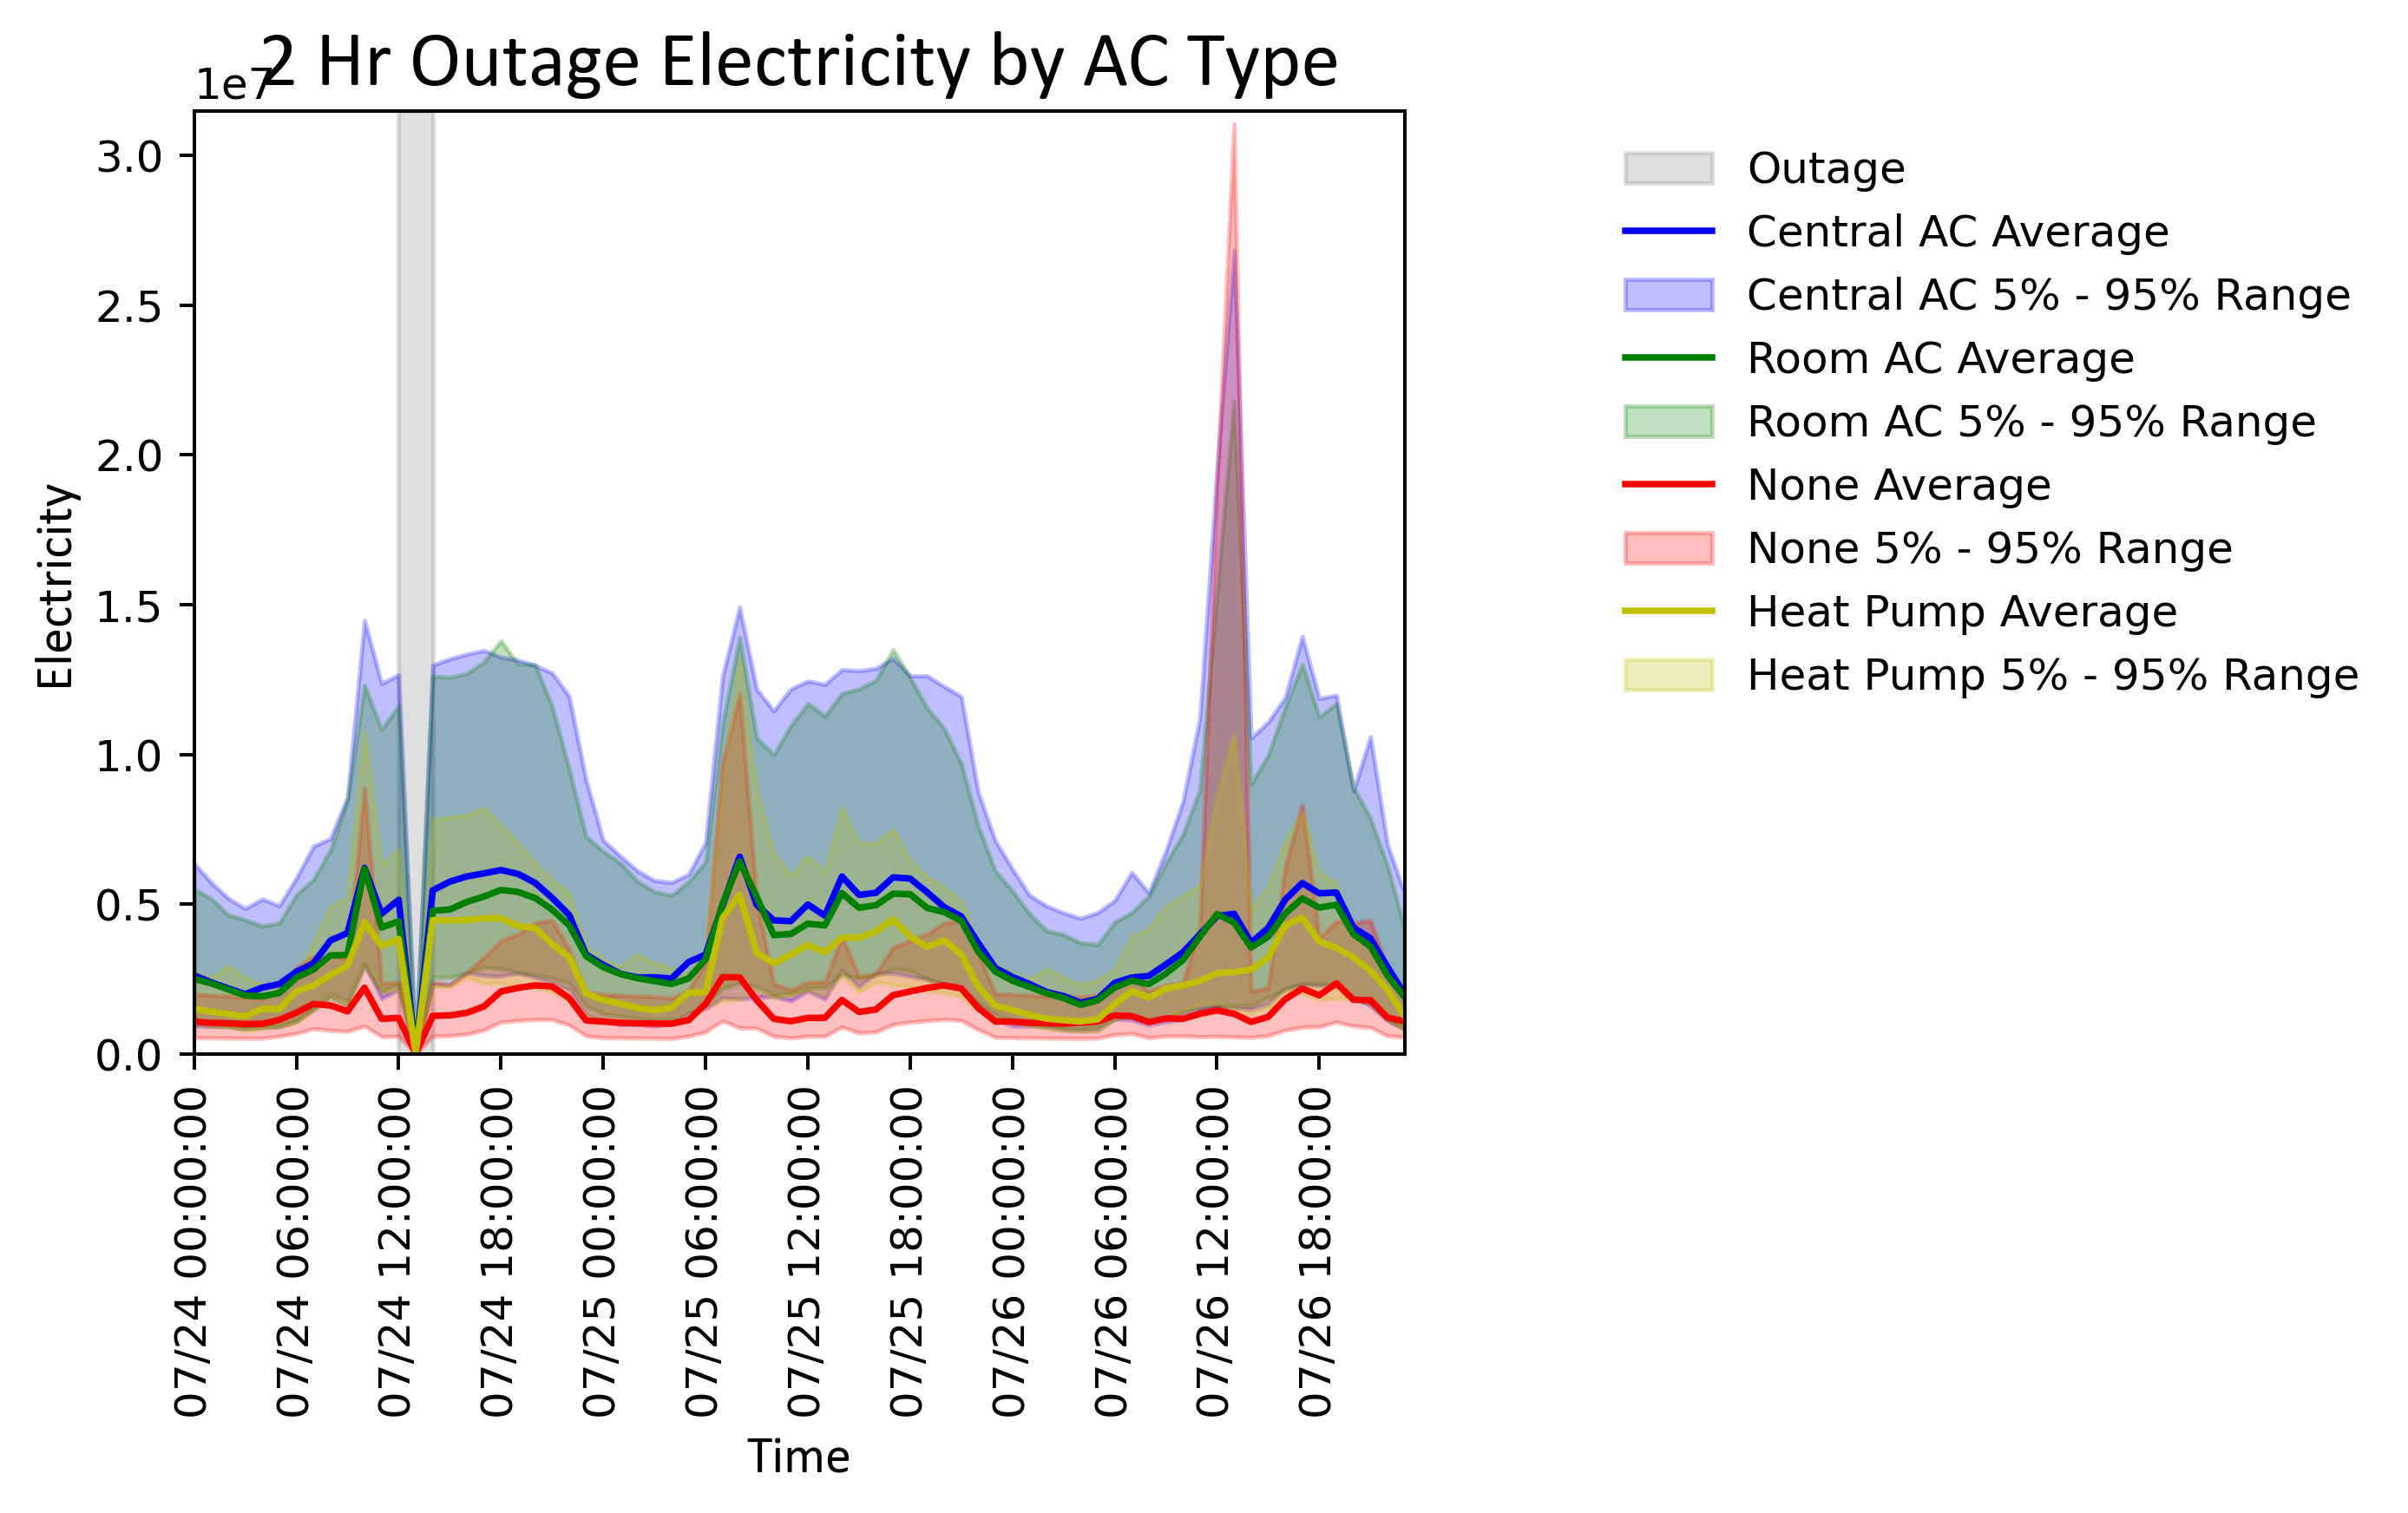

In [29]:
scale = 500000

f5,ax5=plt.subplots(figsize=(5,4),dpi=360)
for hvac_type in pd.unique(metadata['in.hvac_cooling_type']):
    cols = 'bldg' + metadata.loc[metadata['in.hvac_cooling_type']== hvac_type]['bldg_id'].astype(str)
    subset = pd.DataFrame(outage_electricity, columns=cols)
    outage_summary[hvac_type + ' - E - 5%'] = subset.quantile(q=.05,axis=1)
    outage_summary[hvac_type + ' - E - 50%'] =subset.quantile(q=.5,axis=1)
    outage_summary[hvac_type + ' - E - 95%'] = subset.quantile(q=.95,axis=1)

y_min_e2 = 0
y_max_e2 = scale*math.ceil(outage_summary['None - E - 95%'].max()/scale)
ax5.fill_between([otg_start, otg_end],[y_max_e2,y_max_e2],alpha=.25,color='grey',label= "Outage")

for hvac_type in pd.unique(metadata['in.hvac_cooling_type']):
    if hvac_type == 'Central AC':
        hvac_color = 'b'
    elif hvac_type == 'Room AC':
        hvac_color = 'g'
    elif hvac_type == 'None':
        hvac_color = 'r'
    else:
        hvac_color = 'y'
    ax5.plot(outage_summary['Date/Time'],outage_summary[hvac_type + ' - E - 50%'],color = hvac_color,label= str(hvac_type + " Average"))
    ax5.fill_between(outage_summary['Date/Time'], outage_summary[hvac_type + ' - E - 5%'], outage_summary[hvac_type + ' - E - 95%'],alpha=.25,color=hvac_color,label= str(hvac_type + " 5% - 95% Range"))

x_ticks = pd.date_range(start =min(outage_summary['Date/Time']), end =max(outage_summary['Date/Time']),freq ='6H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M:%S')
ax5.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax5.set_xlabel('Time',fontsize=labelsize,**labelfont)
ax5.set_ylabel('Electricity',fontsize=labelsize,**labelfont)
ax5.set_ylim([y_min_e2,y_max_e2])
ax5.set_xlim(min(outage_summary['Date/Time']),max(outage_summary['Date/Time']))
# ax5.fill_between([otg_start, otg_end],[y_max_e,y_max_e],alpha=.25,color='grey',label= "Outage")
ax5.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left',frameon=False)
ax5.set_title(otg +' Hr Outage Electricity by AC Type',fontsize=titlesize,**labelfont)
# f5.savefig(data_file_path + "/figures/"+ otg + "HrElectricityAcTypeSplit.svg",bbox_inches = "tight")


# Gas

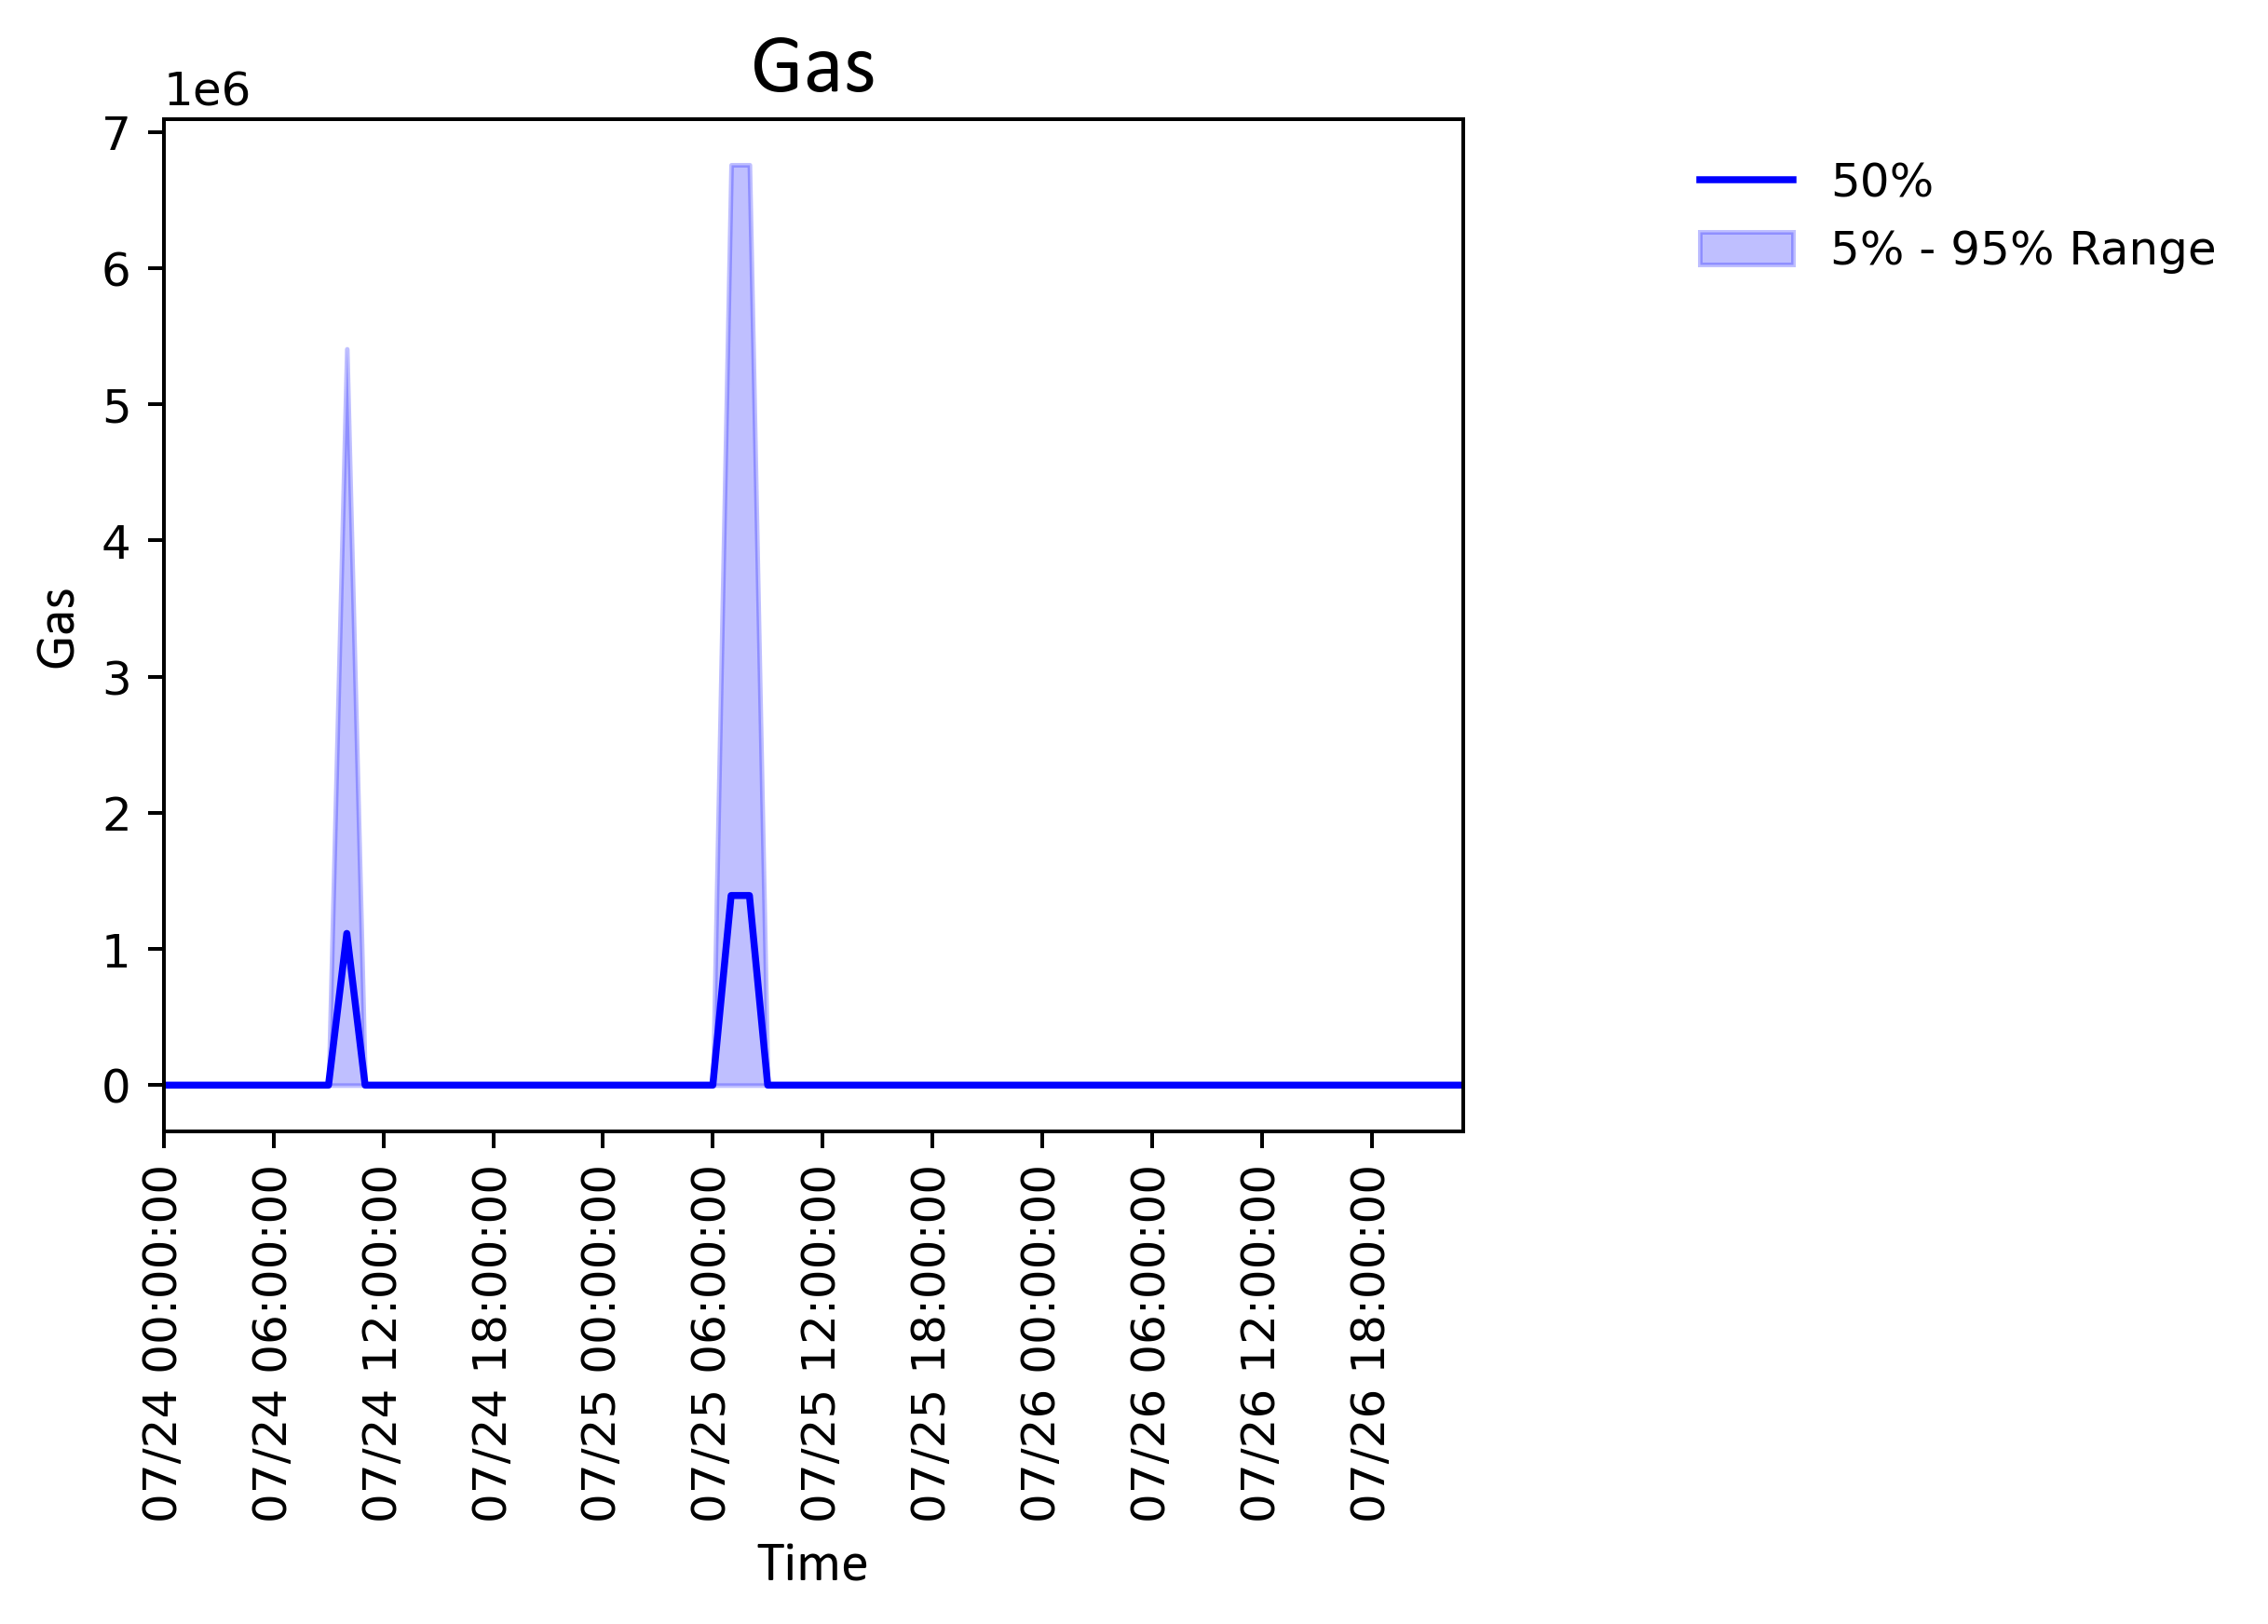

In [30]:
f9, ax9 = plt.subplots(figsize=(5,4),dpi=360)
subset = pd.DataFrame(outage_gas, columns=cols)
outage_summary['G - 5%'] = subset.quantile(q=.05,axis=1)
outage_summary['G - 50%'] =subset.quantile(q=.5,axis=1)
outage_summary['G - 95%'] = subset.quantile(q=.95,axis=1)
# ax9.plot(outage_summary['Date/Time'],outage_summary['G - 5%'],color='g',label="5th percentile")
ax9.plot(outage_summary['Date/Time'],outage_summary['G - 50%'],color = 'b',label="50%")
# ax9.plot(outage_summary['Date/Time'],outage_summary['G - 95%'],color='r',label="95th percentile")
ax9.fill_between(outage_summary['Date/Time'], outage_summary['G - 5%'], outage_summary['G - 95%'],alpha=.25,color='b',label="5% - 95% Range")
x_ticks = pd.date_range(start =min(baseline_temperature['Date/Time']), end =max(baseline_temperature['Date/Time']),freq ='6H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M:%S')
ax9.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax9.set_xlim(min(outage_summary['Date/Time']),max(outage_summary['Date/Time']))
ax9.set_xlabel('Time',fontsize=labelsize,**labelfont)
ax9.set_ylabel('Gas',fontsize=labelsize,**labelfont)
ax9.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left',frameon=False)
ax9.set_title('Gas',fontsize=titlesize,**labelfont)
f9.savefig(data_file_path + "/figures/"+ otg + "HrGas.svg",bbox_inches = "tight")


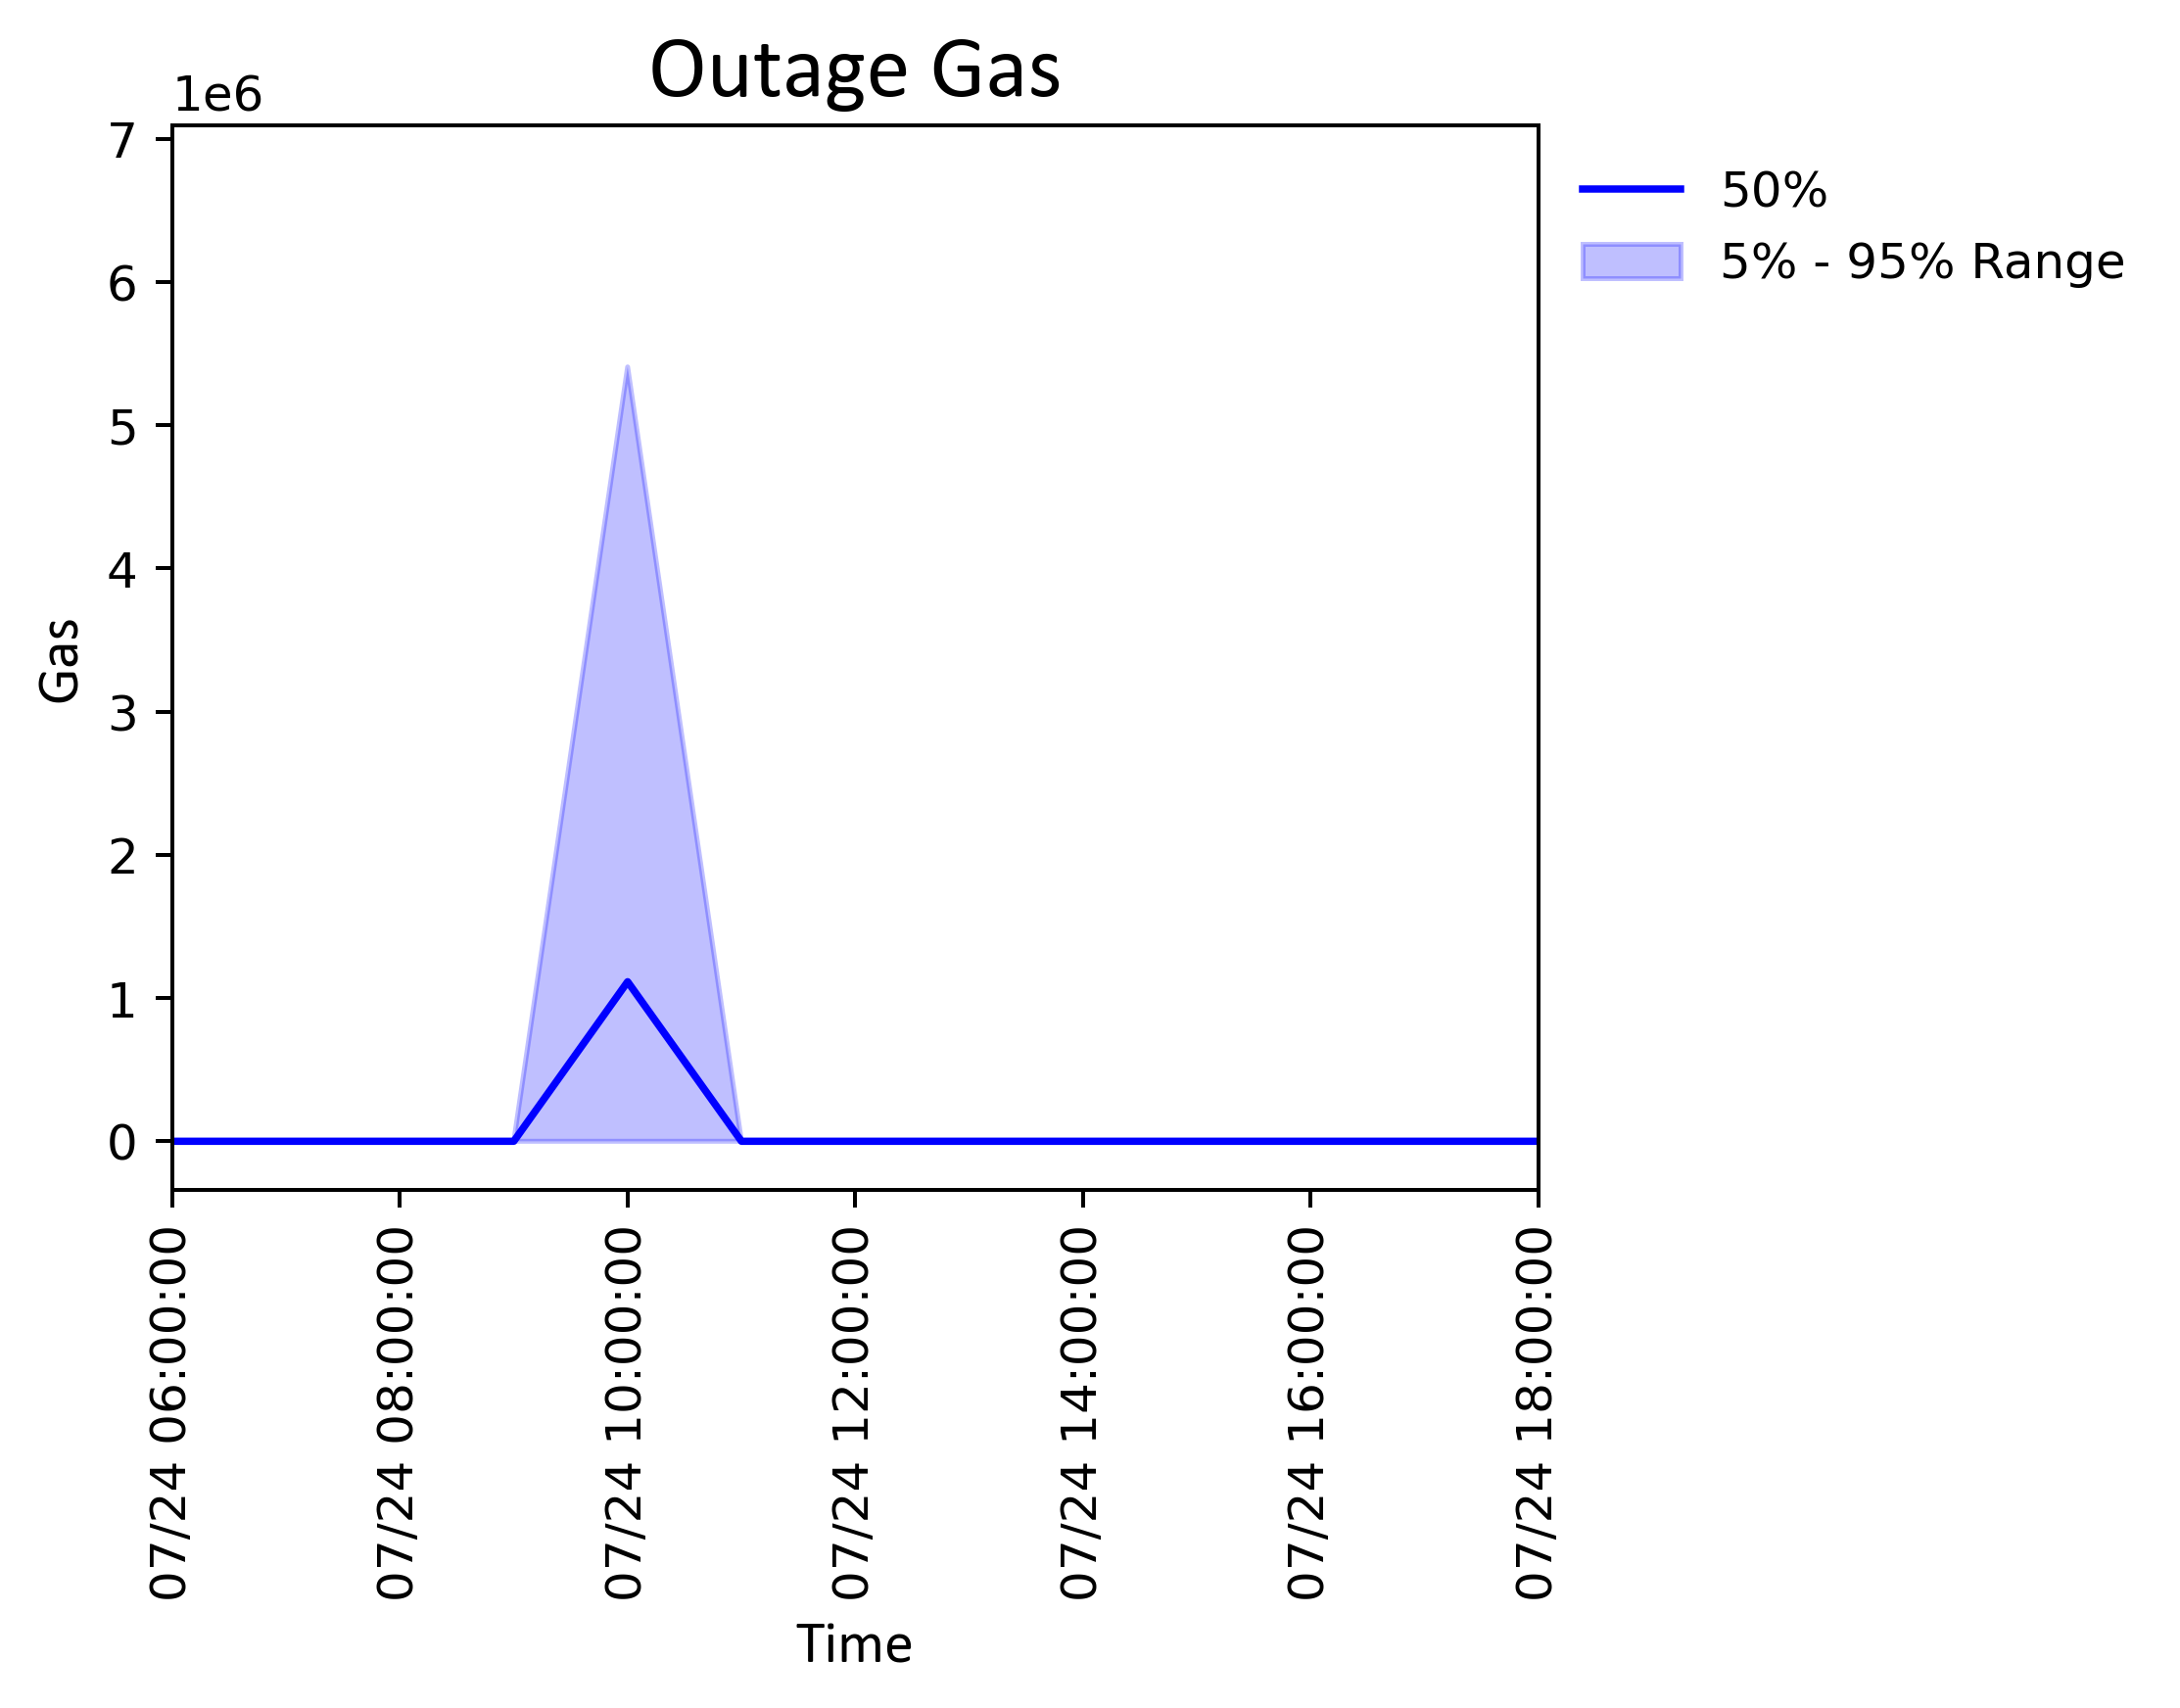

In [31]:
f9, ax9 = plt.subplots(figsize=(5,4),dpi=360)
# ax9.plot(outage_summary['Date/Time'],outage_summary['G - 5%'],color='g',label="5th percentile")
ax9.plot(outage_summary['Date/Time'],outage_summary['G - 50%'],color = 'b',label="50%")
# ax9.plot(outage_summary['Date/Time'],outage_summary['G - 95%'],color='r',label="95th percentile")
ax9.fill_between(outage_summary['Date/Time'], outage_summary['G - 5%'], outage_summary['G - 95%'],alpha=.25,color='b',label="5% - 95% Range")
x_ticks = pd.date_range(start =min(baseline_temperature['Date/Time']), end =max(baseline_temperature['Date/Time']),freq ='2H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M:%S')
ax9.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax9.set_xlim(window_start,window_end)
ax9.set_xlabel('Time',fontsize=labelsize,**labelfont)
ax9.set_ylabel('Gas',fontsize=labelsize,**labelfont)
ax9.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left',frameon=False)
ax9.set_title('Outage Gas',fontsize=titlesize,**labelfont)
f9.savefig(data_file_path + "/figures/"+ otg + "HrGasZoom.svg",bbox_inches = "tight")


In [32]:
# Outages 4